### Numpy

In [ ]:
!pip install xlsxwriter

In [ ]:
#Importamos las librerías que utilizaremos durante el código

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
sns.set()

from google.colab import auth
import gspread
from google.auth import default
import geopandas as gpd
import requests
import os
import matplotlib.patheffects as patheffects
import plotly.graph_objects as go
import re
import xlsxwriter

from google.colab import files
from tabulate import tabulate
import matplotlib.ticker as mticker

Crear una lista de números secuenciales con el valor mínimo de 10 y el máximo 39. Convierte esta lista en una lista o matriz de 2 dimensiones (3 filas por 10 columnas). Muestra por pantalla el valor del elemento de la esquina superior derecha de la matriz


In [ ]:
#Creamos una lista (array) de números secuenciales del 10 al 39 ya que np.arange(inicio, fin) genera valores desde 'inicio' hasta 'fin - 1'
numeros = np.arange(10, 40)
#Ahora con esto tendremos la lsta del 10 al 39, pues su fin llego hasta n-1

#Convertimos ese array en una matriz de 3 filas x 10 columnascomo nos pide el ejercicio utilizando reshape(filas, columnas) para reorganiza el array en la forma que queremos
matriz = numeros.reshape(3, 10)

#Imprimimos la matriz para verla en la pantalla
print("Matriz 3x10:\n", matriz)

#Para obtener el valor de la esquina superior derecha notamos lo siguiente;
#[[10 11 12 13 14 15 16 17 18 19]   ← fila 0
#[20 21 22 23 24 25 26 27 28 29]   ← fila 1
#[30 31 32 33 34 35 36 37 38 39]]  ← fila 2 ---- de esta forma organizamos las filas de nuestra matriz
#Hacemos lo mismo con las columnas enumerando del 0 al 9 respectvamente
#Asi, ordenamos obtener el numero de la fila 0 y utilizamos el -1 pues queremos dar con el resultado lo mas rapido posible
# Fila 0 (la primera), columna -1 (la última)
esquina_superior_derecha = matriz[0, -1]

#Imprimimos el resultado en la pantalla:
print("Elemento de la esquina superior derecha:", esquina_superior_derecha)

Matriz 3x10:
 [[10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]]
Elemento de la esquina superior derecha: 19


Crea un array de una dimensión con 9 valores enteros aleatorios entre 0 y 100. Convierte ese array en una matriz de 2 dimensiones (3 filas y 3 columnas). Muestra por pantalla el valor del elemento de la matriz de la esquina inferior derecha

In [ ]:
# Creamos un array de 1 dimension con 9 valores enteros aleatorios entre 0 y 100
Numero_aleatorio = np.random.randint(0, 101, size=9)
# randint es inclusivo en el limite inferior y exclusivo en el superior
# En este caso 101 es el limite superior y lo ponemos para incluir el 100

print("Array aleatorio de 9 elementos:")
print(Numero_aleatorio)

# Convertimos el array en una matriz de 2 dimensiones (3 filas y 3 columnas)
matriz_2d = Numero_aleatorio.reshape(3, 3)
# Usando reshape(filas, columnas) se cambia la forma del array a 3x3

print("\nMatriz 2D (3 filas x 3 columnas):")
print(matriz_2d)

# Pedimos que se muestre el valor del elemento que aparece en la esquina inferior derecha
esquina_inferior_derecha = matriz_2d[2, 2]
# En numpy los indices empiezan en 0, asi que:
# Fila inferior es la tercera (2)
# Columna derecha es la tercera (2)

print("\nElemento de la esquina inferior derecha:")
print(esquina_inferior_derecha)

Array aleatorio de 9 elementos:
[ 3  5 30 46 53 56 51 28 18]

Matriz 2D (3 filas x 3 columnas):
[[ 3  5 30]
 [46 53 56]
 [51 28 18]]

Elemento de la esquina inferior derecha:
18


**Conclusion (numpy):** En los dos ejercicios usamos "reshape" para cambiar un array a una matriz, pero la diferencia esta en los datos, en el primero siempre va a salir igual porque son numeros seguidos del 10 al 39, o sea un resultado fijo y ordenado, en cambio en el segundo ejercicio no, porque los numeros se generan aleatoriamente y cada vez que corramos el codigo va a salir un resultado distinto. Con esto practicamos como generar datos tanto secuenciales como aleatorios y tambien como acceder a elementos especificos usando los indices

In [ ]:
writer = pd.ExcelWriter('Equipo4_Tarea1.xlsx', engine='xlsxwriter')

In [ ]:
enunciado = "Crear una lista de números secuenciales con el valor mínimo de 10 y el máximo 39. Convierte esta lista en una lista o matriz de 2 dimensiones (3 filas por 10 columnas). Muestra por pantalla el valor del elemento de la esquina superior derecha de la matriz"
enunciado1 = "Crea un array de una dimensión con 9 valores enteros aleatorios entre 0 y 100. Convierte ese array en una matriz de 2 dimensiones (3 filas y 3 columnas). Muestra por pantalla el valor del elemento de la matriz de la esquina inferior derecha"
texto_conclusion = "Conclusion (numpy): En los dos ejercicios usamos \"reshape\" para cambiar un array a una matriz, pero la diferencia esta en los datos, en el primero siempre va a salir igual porque son numeros seguidos del 10 al 39, o sea un resultado fijo y ordenado, en cambio en el segundo ejercicio no, porque los numeros se generan aleatoriamente y cada vez que corramos el codigo va a salir un resultado distinto. Con esto practicamos como generar datos tanto secuenciales como aleatorios y tambien como acceder a elementos especificos usando los indices"
matriz_df = pd.DataFrame(matriz)
matriz_df1 = pd.DataFrame(matriz_2d)

matriz_df.to_excel(writer,
    sheet_name='Numpy',
    index=False,
    header=False,
    startrow=3  # Datos comienzan en A4
)
# 4. Acceder a la hoja y escribir enunciado en A1
worksheet = writer.sheets['Numpy']
worksheet.write('A1', enunciado)
worksheet.write('A10', "Elemento de la esquina superior derecha:")
worksheet.write('B10', esquina_superior_derecha)
worksheet.write('A12', enunciado1)
worksheet.write('A14', "Array aleatorio de 9 elementos:")
worksheet.write('A15', esquina_inferior_derecha)
worksheet.write('A17', "Matriz 2D (3 filas x 3 columnas):")

matriz_df1.to_excel(
    writer,
    sheet_name='Numpy',
    index=False,
    header=False,
    startrow=18  # Datos comienzan en A4
)
worksheet.write('A23', "Elemento de la esquina inferior derecha:")
worksheet.write('B23', esquina_inferior_derecha)

worksheet.write('A25', texto_conclusion)



0

### Pandas


Ejercicio 1

Crear una lista "asignaturas" con los textos "matematicas", "fisica", "historia". Crear una lista "notas" con los valores 9,9,8. Crea una serie con la lista "notas" como valores, y la lista "asignaturas" como indices. Crea la variable "nota_fisica" con la nota de la asignatua de "fisica". Mediante el metodo "print" muestra la frase "La nota de fisica es un ...." {sustituir ... por la nota de fisica}*texto en cursiva*

In [ ]:
#Creamos una lista con las asignaturas y notas correspondientes
Asignaturas = ["Matemáticas","Física","Historia"]
Notas =[9,9,8]
# Creamos una Serie de pandas (como una columna de datos con índice personalizado)
datos = pd.Series(data=Notas,index=Asignaturas) # data=Notas: Los valores [9, 9, 8], index=Asignaturas: Las etiquetas ["matematicas", "fisica", "historia"]
datos.name='Nota'
datos = datos.rename_axis('Asignatura')
df = datos.reset_index() # Convertimos la Serie en DataFrame de 2 columnas
# Resultado:
#   Asignatura   Nota
#  matematicas     9
#  fisica          9
#  historia        8

styled_df = (
    df.style
      .set_table_styles([
          # Estilo 1: Para la TABLA COMPLETA
          {'selector': 'table', 'props': [
              ('border-radius', '8px'),# Esquinas redondeadas
              ('overflow', 'hidden'), # Oculta contenido que sobresale de los bordes redondeados
              ('box-shadow', '0 4px 6px rgba(0,0,0,0.1)')# Sombra suave para efecto de profundidad
          ]},
           # Estilo 2: Para el ENCABEZADO y CELDAS DE DATOS
          {'selector': 'th, td', 'props': [
              ('padding', '15px'), # Espacio interno amplio
              ('text-align', 'center')# Texto centrado en todas las celdas
          ]},
           # Estilo 3: Específico para el ENCABEZADO (th = table header)
          {'selector': 'th', 'props': [
              ('background', 'linear-gradient(135deg, #d3d3d3 0%, #a9a9a9 100%)'),# Fondo con degradado gris
              ('color', 'black'),# Texto de el encabezado en negro para buen contraste
              ('font-size', '16px')# Tamaño de fuente más grande para el encabezado
          ]},
           # Estilo 4: Para CELDAS DE DATOS (td = table data)
          {'selector': 'td', 'props': [
              ('background-color', 'rgba(255, 255, 255, 0.9)'),# Fondo blanco semi-transparente
              ('border-bottom', '1px solid #e0e0e0') # Línea divisoria gris clara entre filas
          ]},
           # Estilo 5: Para la ÚLTIMA FILA de la tabla
          {'selector': 'tr:last-child td', 'props': [
              ('border-bottom', 'none')  # Elimina la línea inferior de la última fila
          ]}
      ])
      .hide(axis='index')# Elimina la columna numérica automática que pandas añade a la izquierda
      .set_properties(**{
          'font-family': 'Segoe UI, Tahoma, Geneva, Verdana, sans-serif', # Fuentes modernas y legibles
          'font-size': '15px',  # Tamaño de texto estándar
          'color': '#333'# Color de texto gris oscuro
      })
)
styled_df


In [ ]:
nota_fisica=datos['Física']
print(f"\033[3mLa nota de física es de un {nota_fisica}\033[0m") # Imprime el texto con formato especial en cursiva

La nota de física es de un 9


Ejercicio 2

El objetivo sera, crear un dataframe con las ventas de nuestras 3 oficinas para los meses de enero, febrero y marzo. Pasos a seguir: Crea una variable "ventas_enero" que contenga una lista de 3 numeros enteros aleatorios entre 100 y 500 Crea una variable "ventas_febrero" que contenga una lista de 3 numeros enteros aleatorios entre 100 y 500 Crea una variable "ventas_marzo" que contenga una lista de 3 numeros enteros aleatorios entre 100 y 500 Crea una variable "filas" que contenga esta lista de palabras ["ventas_enero","ventas_febrero","ventas_marzo"] Crea una variable "columnas" que contenga esta lista de palabras : "oficina1","oficina2","oficina3" Crea una variable "ventas" que contenga una lista con los valores de ventas de enero, febrero y ventas_marzo Crea una variable "dataframe" que contenga las ventas, filas y columnas Mediante "print" muestra el valor de "Las ventas de enero para la oficina 1 son de"




In [ ]:
# DataFrame para ventas de enero: 3 números aleatorios entre 100 y 500
ventas_enero = pd.DataFrame({
    'ventas_enero': np.random.randint(100, 501, size=3)})
# DataFrame para ventas de febrero: 3 números aleatorios entre 100 y 500
ventas_febrero = pd.DataFrame({
    'ventas_febrero': np.random.randint(100, 501, size=3)})
# DataFrame para ventas de marzo: 3 números aleatorios entre 100 y 500
ventas_marzo = pd.DataFrame({
    'ventas_marzo': np.random.randint(100, 501, size=3)})

filas = ["ventas_enero","ventas_febrero","ventas_marzo"] # Nombres para las filas del DataFrame (cada mes será una fila)
columnas = ["oficina1","oficina2","oficina3"] # Nombres para las columnas del DataFrame (cada oficina será una columna)

# Convertimos cada columna de ventas a lista y las combinamos en una lista de listas
ventas = [
    ventas_enero['ventas_enero'].tolist(),
    ventas_febrero['ventas_febrero'].tolist(),
    ventas_marzo['ventas_marzo'].tolist()
] # Convierte la columna enero, febrero, marzo en una lista

# Creamos el DataFrame usando:
# - ventas: los datos (lista de listas)
# - index=filas: nombres de las filas (meses)
# - columns=columnas: nombres de las columnas (oficinas)
dataframe = pd.DataFrame(ventas, index=filas, columns=columnas)


styled_df = (
    dataframe.style
      .set_table_styles([
          # Estilo 1: PARA LA TABLA COMPLETA
          {'selector': 'table', 'props': [
              ('border-radius', '8px'), # Esquinas redondeadas
              ('overflow', 'hidden'),  # Oculta contenido que sobresale de los bordes redondeados
              ('box-shadow', '0 4px 6px rgba(0,0,0,0.1)') # Sombra suave para efecto de profundidad
          ]},
          # Estilo 2: PARA ENCABEZADOS (th) Y CELDAS DE DATOS (td)
          {'selector': 'th, td', 'props': [
              ('padding', '15px'), # Espacio interno amplio
              ('text-align', 'center') # Centra el texto en todas las celdas
          ]},
           # Estilo 3: ESPECÍFICO PARA ENCABEZADOS DE TABLA
          {'selector': 'th', 'props': [
              ('background', 'linear-gradient(135deg, #d3d3d3 0%, #a9a9a9 100%)'), # Degradado gris para encabezados
              ('color', 'black'), # Texto negro
              ('font-size', '16px') # Tamaño de fuente más grande para encabezados
          ]},
          # Estilo 4: PARA CELDAS DE DATOS NORMALES
          {'selector': 'td', 'props': [
              ('background-color', 'rgba(255, 255, 255, 0.9)'), # Fondo blanco semi-transparente
              ('border-bottom', '1px solid #e0e0e0') # Línea divisoria gris entre filas
          ]},
          # Estilo 5: PARA LA ÚLTIMA FILA DE LA TABLA
          {'selector': 'tr:last-child td', 'props': [
              ('border-bottom', 'none') # Elimina la línea inferior de la última fila
          ]}
      ])
      # PROPIEDADES DE TEXTO GENERALES PARA TODA LA TABLA
      .set_properties(**{
          'font-family': 'Segoe UI, Tahoma, Geneva, Verdana, sans-serif', # Fuentes modernas y legibles
          'font-size': '15px', # Tamaño de texto estándar
          'color': '#333' # Color de texto gris oscuro
      })
)
styled_df


In [ ]:
print(f"\033[4mLas ventas de enero de la oficina 1 son de:\033[0m") # Imprime el texto en formato especial subrayandolo
print(dataframe.loc['ventas_enero', 'oficina1']) # Imprime el resultado del valor que se encuentra en la oficina1 de ventas de enero

Las ventas de enero de la oficina 1 son de:
199


**Conclusión pandas** Con los programas anteriores, podemos visualizar las estructuras de tabulacion mas recurrentes en la librería pandas las cuales son dataframes y pdseries, asimismo se muestra una forma de visualizar las tablas mas limpia y formal. Se encuentra tambien la forma para obtener un numero aleatorio y extraer datos del rango de un dataframe, cada instruccion con su debida exlicacion.

In [ ]:
enunciado = (
        "Ejercicio 2\n\n"
        "Crear un dataframe con las ventas de 3 oficinas para enero, febrero y marzo. Pasos:\n"
        "- ventas_enero: lista de 3 números aleatorios entre 100 y 500\n"
        "- ventas_febrero: lista de 3 números aleatorios entre 100 y 500\n"
        "- ventas_marzo: lista de 3 números aleatorios entre 100 y 500\n"
        "- filas: ['ventas_enero', 'ventas_febrero', 'ventas_marzo']\n"
        "- columnas: ['oficina1', 'oficina2', 'oficina3']\n"
        "- Mostrar: 'Las ventas de enero para la oficina 1 son de...'"
    )
enunciado1 = (
        "Ejercicio 2\n\n"
        "El objetivo será crear un dataframe con las ventas de 3 oficinas para enero, febrero y marzo.\n"
        "Pasos a seguir:\n"
        "- ventas_enero: lista de 3 números aleatorios entre 100 y 500\n"
        "- ventas_febrero: lista de 3 números aleatorios entre 100 y 500\n"
        "- ventas_marzo: lista de 3 números aleatorios entre 100 y 500\n"
        "- filas: ['ventas_enero', 'ventas_febrero', 'ventas_marzo']\n"
        "- columnas: ['oficina1', 'oficina2', 'oficina3']\n"
        "- Mostrar: 'Las ventas de enero para la oficina 1 son de...'"
    )
texto_conclusion = "conclusion pandas** Con los programas anteriores, podemos visualizar las estructuras de tabulacion mas recurrentes en la librería pandas las cuales son dataframes y pdseries, asimismo se uestra una forma de visualizar las tablas mas limpia y formal. Se encuentra tambien la forma para obtener un numero aleagorio y extraer datos del rango de un dataframe, cada instruccion con su debida exlicacion."

texto = f"La nota de física es de un {nota_fisica}"

texto1 = "Las ventas de enero de la oficina 1 son de:"
worksheet = writer.book.add_worksheet('Pandas')
worksheet = writer.sheets['Pandas']  # Acceder a la hoja existente

formato = writer.book.add_format({
    'italic': True,
    'num_format': '$#,##0.00'
})
formato_subrayado = writer.book.add_format({'underline': True})
formato_dinero = writer.book.add_format({'num_format': '$#,##0.00'})

worksheet.write('A1', enunciado)

df.to_excel(writer, sheet_name='Pandas', startrow=2, startcol= 0, index=False)

worksheet.write('A10', texto, formato)

worksheet.write('A12', enunciado1)

dataframe.to_excel(
    writer,
    sheet_name='Pandas',
    startrow=13,  # Comienza en A11
    startcol=0,
    header=True,
    index=True
)

worksheet.write('A19', texto1)

worksheet.write('B19', dataframe.loc['ventas_enero', 'oficina1'], formato_dinero)

# 3. Escribir conclusión
worksheet.write('A21', texto_conclusion)


0

### Bivariate analysis - Partial Dependence Plots

In [ ]:
#A partir de nuestro archivo csv previamente subido a github, definimos su url y lo leemos con la función de pandas pd.read_csv

url = "https://raw.githubusercontent.com/fliupa/Datos_de_Computo/main/datos/ds_0702.csv"
df_features = pd.read_csv(url)

In [ ]:
#Imprimimos un resumen de nuestro dataframe
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21300 entries, 0 to 21299
Data columns (total 45 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   user_id                                            21300 non-null  object 
 1   gender                                             21300 non-null  object 
 2   state_group                                        21300 non-null  object 
 3   age                                                21300 non-null  int64  
 4   output                                             21300 non-null  int64  
 5   COUNT(transactions1to30days_purchase)              21300 non-null  int64  
 6   SUM(transactions1to30days_purchase.amount)         21300 non-null  float64
 7   MEAN(transactions1to30days_purchase.amount)        21300 non-null  float64
 8   COUNT(transactions31to60days_purchase)             21300 non-null  int64  
 9   SUM(tr

In [ ]:
#Mostramos las primeras 5 filas de nuestro dataframe para verifficar que se haya importado correctamente
df_features.head()

user_id  gender     state_group  age  output  \
0  60993735-a91b-4a32-9c9e-e63efd319421    MALE    north_mexico   26       1   
1  930ab4c6-fc2a-4bf4-99ea-053f2517f6bc  FEMALE  central_mexico   29       1   
2  e0d56538-7f6d-4dcb-88a5-a2b8e45132f8    MALE    north_mexico   21       0   
3  f944f4a5-e490-4667-b42c-1bc03920ac3d    MALE           bajio   25       0   
4  d72b8bf4-f93a-4233-ac26-53a8e317402d  FEMALE    south_mexico   35       1   

   COUNT(transactions1to30days_purchase)  \
0                                      3   
1                                      1   
2                                      0   
3                                      3   
4                                      5   

   SUM(transactions1to30days_purchase.amount)  \
0                                       82.00   
1                                      839.00   
2                                        0.00   
3                                      466.00   
4                                      852.28   

   MEAN(transactions1to30days_purchase.amount)  \
0                                    27.333333   
1                                   839.000000   
2                                     0.000000   
3                                   155.333333   
4                                   170.456000   

   COUNT(transactions31to60days_purchase)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   SUM(transactions31to60days_purchase.amount)  ...  \
0                                          0.0  ...   
1                                          0.0  ...   
2                                          0.0  ...   
3                                          0.0  ...   
4                                          0.0  ...   

   MEAN(transactionsDaily1to30days_purchase.amount)  \
0                                            33.000   
1                                           839.000   
2                                             0.000   
3                                           155.330   
4                                           170.456   

   MEAN(transactionsDaily31to60days_purchase.amount)  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   MEAN(transactionsDaily1to30days_clabeOut.amount)  \
0                                             69.63   
1                                            350.00   
2                                              0.00   
3                                            354.00   
4                                            122.37   

   MEAN(transactionsDaily31to60days_clabeOut.amount)  \
0                                                0.0   
1                                              703.6   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   MEAN(transactionsDaily1to30days_clabeInc.amount)  \
0                                         71.505000   
1                                        373.166667   
2                                          0.000000   
3                                        256.250000   
4                                        119.681111   

   MEAN(transactionsDaily31to60days_clabeInc.amount)  \
0                                                0.0   
1                                              476.3   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   MEAN(transactionsDaily1to30days_atm.amount)  \
0                                 

In [ ]:
df_features.to_excel(writer, sheet_name='df_features', index=False)

In [ ]:
#Mostramos todas los encabezados de las columnas del dataframe
df_features.columns

Index(['user_id', 'gender', 'state_group', 'age', 'output',
       'COUNT(transactions1to30days_purchase)',
       'SUM(transactions1to30days_purchase.amount)',
       'MEAN(transactions1to30days_purchase.amount)',
       'COUNT(transactions31to60days_purchase)',
       'SUM(transactions31to60days_purchase.amount)',
       'MEAN(transactions31to60days_purchase.amount)',
       'COUNT(transactions1to30days_clabeInc)',
       'SUM(transactions1to30days_clabeInc.amount)',
       'MEAN(transactions1to30days_clabeInc.amount)',
       'COUNT(transactions31to60days_clabeInc)',
       'SUM(transactions31to60days_clabeInc.amount)',
       'MEAN(transactions31to60days_clabeInc.amount)',
       'COUNT(transactions1to30days_clabeOut)',
       'SUM(transactions1to30days_clabeOut.amount)',
       'MEAN(transactions1to30days_clabeOut.amount)',
       'COUNT(transactions31to60days_clabeOut)',
       'SUM(transactions31to60days_clabeOut.amount)',
       'MEAN(transactions31to60days_clabeOut.amount)',
 

In [ ]:
#Mostramos la estructura de nuestro dataframe, es decir, el número de columnas y filas del mismo
df_features.shape

(21300, 45)

In [ ]:
#Cambiamos los datos de la columna disbursement_date para que sean tipo datetime
df_features['disbursement_date']=pd.to_datetime(df_features['disbursement_date'])

In [ ]:
#Comprobamos en el resumen de nuestro dataframe que efectivamente se cambió el tipo de dato en la columna anteriormente modififcada
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21300 entries, 0 to 21299
Data columns (total 45 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   user_id                                            21300 non-null  object        
 1   gender                                             21300 non-null  object        
 2   state_group                                        21300 non-null  object        
 3   age                                                21300 non-null  int64         
 4   output                                             21300 non-null  int64         
 5   COUNT(transactions1to30days_purchase)              21300 non-null  int64         
 6   SUM(transactions1to30days_purchase.amount)         21300 non-null  float64       
 7   MEAN(transactions1to30days_purchase.amount)        21300 non-null  float64       
 8   COUNT(transactio

In [ ]:
#Agrupamos nuestros datos por género y posteriormente los contamos a partir del user_id
df_features.groupby(['gender']).count()['user_id']

gender
FEMALE     4524
MALE      16776
Name: user_id, dtype: int64

In [ ]:
#Agrupamos los datos por género, los contamos a partir del user_id y el dataframe resultado lo asignamos a la variable df_gender
df_gender=df_features.groupby(['gender']).count()['user_id']

In [ ]:
df_gender.to_excel(writer, sheet_name='df_gender', index=False)

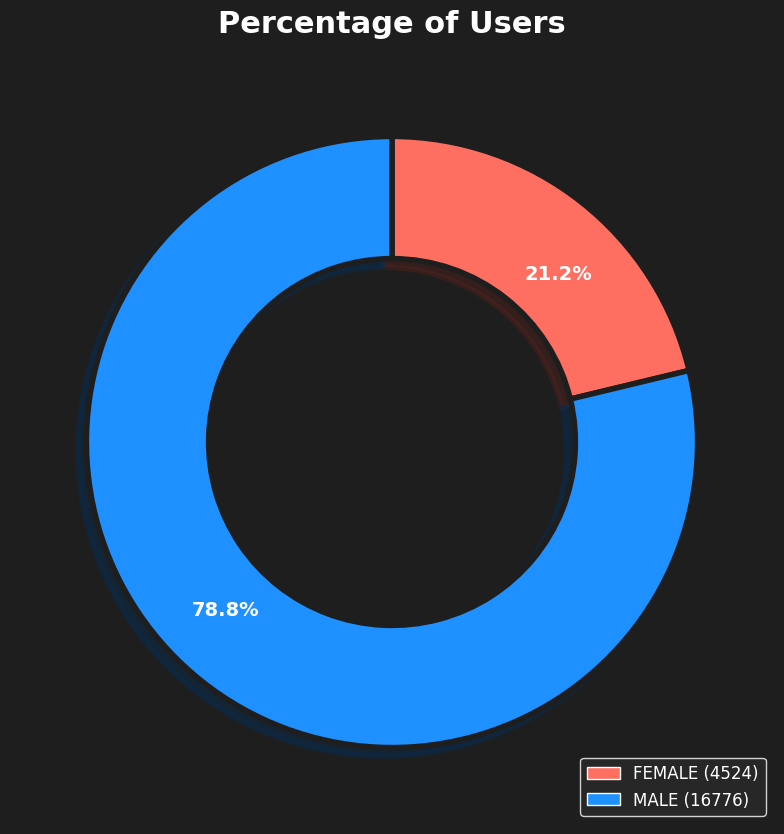

0

In [ ]:
# Datos
valores = df_gender.values
etiquetas = df_gender.index
total = valores.sum()
etiquetas_porcentaje = [f'{v/total*100:.1f}%' for v in valores]

# Colores vivos/neón
colores = ['#FF6F61', '#1E90FF']  # Coral y azul neón

# Crear figura
fig, ax = plt.subplots(figsize=(8, 10))
fig.set_facecolor('#1E1E1E')  # Fondo oscuro

# Gráfico de pastel
wedges, texts = ax.pie(
    valores,
    labels=etiquetas_porcentaje,
    labeldistance=0.7,
    colors=colores,
    startangle=90,
    counterclock=False,
    wedgeprops={'width': 0.4, 'edgecolor': '#1E1E1E', 'linewidth': 4, 'linestyle':'solid'},
    textprops={'color': 'white', 'weight': 'bold', 'fontsize': 14},
    shadow=True
)

# Título
ax.set_title('Percentage of Users', fontsize=22, weight='bold', color='white', pad=20)

# Leyenda
leyenda_elementos = [
    Patch(facecolor=colores[0], label=f'{etiquetas[0]} ({valores[0]})'),
    Patch(facecolor=colores[1], label=f'{etiquetas[1]} ({valores[1]})')
]
ax.legend(handles=leyenda_elementos, loc=4, fontsize=12, facecolor='#2A2A2A', edgecolor='white', labelcolor='white')

plt.tight_layout()
plt.show()

# Guardar figura
nombre_grafico = 'g1.png'
fig.savefig(nombre_grafico, facecolor=fig.get_facecolor())
plt.close(fig)

# Insertar en Excel
pd.DataFrame().to_excel(writer, sheet_name='g1')
worksheet = writer.sheets['g1']
worksheet.insert_image('B2', nombre_grafico)

In [ ]:
#Agrupamos nuestros datos primero por género y a su vez, después los agrupamos por grupo de estado contándolos con el user_id y guardando el dataframe resultado en la variable df_gender_state_group
df_gender_state_group=df_features.groupby(['gender','state_group'])['user_id'].count()

In [ ]:
#Mostramos el resultado del paso anterior
df_gender_state_group

gender  state_group   
FEMALE  bajio              216
        caribbean          305
        central_mexico    2026
        golfo              464
        north_mexico       768
        not_present         10
        pacific            467
        south_mexico       268
MALE    bajio              948
        caribbean         1033
        central_mexico    7685
        golfo             1399
        north_mexico      2803
        not_present         46
        pacific           1897
        south_mexico       965
Name: user_id, dtype: int64

In [ ]:

geojson_url = "https://gist.githubusercontent.com/Tlaloc-Es/5c82834e5e4a9019a91123cb11f598c0/raw/mexico.geojson"#archivo con los datos de mexico

# Descargar el archivo si no existe localmente
if not os.path.exists("admin1.geojson"):#usar una vez nada mas se asegura que no exista el admin1.geojson para descargar el archivo
    print("Descargando admin1.geojson desde GitHub...")
    response = requests.get(geojson_url)
    with open("admin1.geojson", "wb") as f:#abre de forma binaria para comfirmar el archivo
        f.write(response.content)
    print("Archivo descargado exitosamente!")

# Cargar el archivo GeoJSON
gdf = gpd.read_file("admin1.geojson") #se define el gdf como el archivo admin1.geojson

print("Estados disponibles en el geojson:")


Estados disponibles en el geojson:


In [ ]:
gdf.info() #informacion del gdf

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        382 non-null    float64 
 1   PERIMETER   382 non-null    float64 
 2   COV_        382 non-null    int32   
 3   COV_ID      382 non-null    int32   
 4   ENTIDAD     382 non-null    object  
 5   CAPITAL     43 non-null     object  
 6   RASGO_GEOG  339 non-null    object  
 7   CVE_EDO     382 non-null    object  
 8   geometry    382 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(4)
memory usage: 24.0+ KB


In [ ]:
gdf.head(3) #primeras filas del gdf

AREA  PERIMETER  COV_  COV_ID          ENTIDAD     CAPITAL RASGO_GEOG  \
0   6.717922  18.921158     2       1  BAJA CALIFORNIA    Mexicali       None   
1  16.695245  30.600973     3       5           SONORA  Hermosillo       None   
2   0.000047   0.031877     4       2  BAJA CALIFORNIA        None       ISLA   

  CVE_EDO                                           geometry  
0      02  POLYGON ((-114.7575 32.71629, -114.73881 32.71...  
1      26  POLYGON ((-114.7889 32.48717, -114.70258 32.46...  
2      02  POLYGON ((-117.29388 32.43422, -117.29441 32.4...

In [ ]:
print(gdf['ENTIDAD'].unique()) #nuestra las Entidades del gdf

['BAJA CALIFORNIA' 'SONORA' 'CHIHUAHUA' 'COAHUILA DE ZARAGOZA'
 'BAJA CALIFORNIA SUR' 'NUEVO LEON' 'TAMAULIPAS' 'SINALOA' 'DURANGO'
 'ZACATECAS' 'SAN LUIS POTOSI' 'NAYARIT' 'JALISCO' 'YUCATAN'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'AGUASCALIENTES' 'GUANAJUATO'
 'QUERETARO DE ARTEAGA' 'QUINTANA ROO' 'HIDALGO' 'CAMPECHE' 'PUEBLA'
 'MICHOACAN DE OCAMPO' 'MEXICO' 'TLAXCALA' 'DISTRITO FEDERAL' 'COLIMA'
 'MORELOS' 'GUERRERO' 'OAXACA' 'TABASCO' 'CHIAPAS']


In [ ]:
mapping = { #crea un diccionario para cada estado asignarle un state_gruop
    "AGUASCALIENTES": "bajio",
    "GUANAJUATO": "bajio",
    "QUERETARO DE ARTEAGA": "bajio",
    "SAN LUIS POTOSI": "bajio",
    "ZACATECAS": "bajio",
    "CHIAPAS": "south_mexico",
    "GUERRERO": "south_mexico",
    "OAXACA": "south_mexico",
    "CAMPECHE": "caribbean",
    "QUINTANA ROO": "caribbean",
    "YUCATAN": "caribbean",
    "TABASCO": "golfo",
    "VERACRUZ DE IGNACIO DE LA LLAVE": "golfo",
    "COLIMA": "pacific",
    "JALISCO": "pacific",
    "MICHOACAN DE OCAMPO": "pacific",
    "NAYARIT": "pacific",
    "SINALOA": "pacific",
    "BAJA CALIFORNIA": "north_mexico",
    "BAJA CALIFORNIA SUR": "north_mexico",
    "CHIHUAHUA": "north_mexico",
    "COAHUILA DE ZARAGOZA": "north_mexico",
    "DURANGO": "north_mexico",
    "NUEVO LEON": "north_mexico",
    "SONORA": "north_mexico",
    "TAMAULIPAS": "north_mexico",
    "DISTRITO FEDERAL": "central_mexico",
    "MEXICO": "central_mexico",
    "HIDALGO": "central_mexico",
    "MORELOS": "central_mexico",
    "PUEBLA": "central_mexico",
    "TLAXCALA": "central_mexico"
}

In [ ]:
gdf["state_group"] = gdf["ENTIDAD"].map(mapping)#crea una columna nueva en gdf con cada entidad que cuadre con el state_group

In [ ]:
df_flat = df_gender_state_group.reset_index() #un df del anterior con state_group y user_id pero cin indices nuevos

In [ ]:
df_flat

gender     state_group  user_id
0   FEMALE           bajio      216
1   FEMALE       caribbean      305
2   FEMALE  central_mexico     2026
3   FEMALE           golfo      464
4   FEMALE    north_mexico      768
5   FEMALE     not_present       10
6   FEMALE         pacific      467
7   FEMALE    south_mexico      268
8     MALE           bajio      948
9     MALE       caribbean     1033
10    MALE  central_mexico     7685
11    MALE           golfo     1399
12    MALE    north_mexico     2803
13    MALE     not_present       46
14    MALE         pacific     1897
15    MALE    south_mexico      965

In [ ]:
df_flat = df_flat.rename(columns={'user_id': 'Count'}) #df renombrar user_id como Count

In [ ]:
df_flat.to_excel(writer, sheet_name='df_flat', index=False)

In [ ]:
df_flat

gender     state_group  Count
0   FEMALE           bajio    216
1   FEMALE       caribbean    305
2   FEMALE  central_mexico   2026
3   FEMALE           golfo    464
4   FEMALE    north_mexico    768
5   FEMALE     not_present     10
6   FEMALE         pacific    467
7   FEMALE    south_mexico    268
8     MALE           bajio    948
9     MALE       caribbean   1033
10    MALE  central_mexico   7685
11    MALE           golfo   1399
12    MALE    north_mexico   2803
13    MALE     not_present     46
14    MALE         pacific   1897
15    MALE    south_mexico    965

In [ ]:
df_total = df_flat.groupby('state_group')['Count'].sum().reset_index()#un df con state_group y la suma de cada Count

In [ ]:
df_total

state_group  Count
0           bajio   1164
1       caribbean   1338
2  central_mexico   9711
3           golfo   1863
4    north_mexico   3571
5     not_present     56
6         pacific   2364
7    south_mexico   1233

In [ ]:
df_total.columns = ['state_group', 'total_count']#renombrar las columnas

In [ ]:
df_total.to_excel(writer, sheet_name='df_total', index=False)

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state_group  8 non-null      object
 1   total_count  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes


In [ ]:
df_female = df_flat[df_flat['gender'] == 'FEMALE'][['state_group', 'Count']].copy()#crea un df para mujeres con los datos de state_group y Count
df_female.columns = ['state_group', 'female_count']#renombrar a female_count

In [ ]:
df_female

state_group  female_count
0           bajio           216
1       caribbean           305
2  central_mexico          2026
3           golfo           464
4    north_mexico           768
5     not_present            10
6         pacific           467
7    south_mexico           268

In [ ]:
df_female.to_excel(writer, sheet_name='df_female', index=False)

In [ ]:
df_male = df_flat[df_flat['gender'] == 'MALE'][['state_group', 'Count']].copy()
df_male.columns = ['state_group', 'male_count']
df_male
#lo mismo pero para hombres

state_group  male_count
8            bajio         948
9        caribbean        1033
10  central_mexico        7685
11           golfo        1399
12    north_mexico        2803
13     not_present          46
14         pacific        1897
15    south_mexico         965

In [ ]:
df_male.to_excel(writer, sheet_name='df_male', index=False)

In [ ]:
df_combined = df_total.merge(df_female, on='state_group', how='left')
df_combined = df_combined.merge(df_male, on='state_group', how='left')#un df con los datos de los hombre y mujeres

In [ ]:
df_combined

state_group  total_count  female_count  male_count
0           bajio         1164           216         948
1       caribbean         1338           305        1033
2  central_mexico         9711          2026        7685
3           golfo         1863           464        1399
4    north_mexico         3571           768        2803
5     not_present           56            10          46
6         pacific         2364           467        1897
7    south_mexico         1233           268         965

In [ ]:
df_combined['female_pct'] = (df_combined['female_count'] / df_combined['total_count']) * 100
df_combined['male_pct'] = (df_combined['male_count'] / df_combined['total_count']) * 100#el mismo df anterior pero añadiendo columna de porcentajes

In [ ]:
df_combined.to_excel(writer, sheet_name='df_combined', index=False)

In [ ]:
df_combined

state_group  total_count  female_count  male_count  female_pct  \
0           bajio         1164           216         948   18.556701   
1       caribbean         1338           305        1033   22.795217   
2  central_mexico         9711          2026        7685   20.862939   
3           golfo         1863           464        1399   24.906065   
4    north_mexico         3571           768        2803   21.506581   
5     not_present           56            10          46   17.857143   
6         pacific         2364           467        1897   19.754653   
7    south_mexico         1233           268         965   21.735604   

    male_pct  
0  81.443299  
1  77.204783  
2  79.137061  
3  75.093935  
4  78.493419  
5  82.142857  
6  80.245347  
7  78.264396

In [ ]:
gdf = gdf.merge(df_combined, on="state_group", how="left") #el gdf lo combina con df_combined con la columna de state_group guardando la estructura
gdf_zonas = gdf.dissolve(by='state_group', aggfunc='first').reset_index()#gdf con las geometrias agrupadas con indice nuevo
gdf_zonas = gdf_zonas.to_crs('EPSG:4326')  #cambia el crs del archivo a EPSG:4326 como para gps en el codigo estandar WGS84
gdf = gdf.to_crs('EPSG:4326') #lo mismo que lo anterior pero con el gdf original

In [ ]:
gdf.to_excel(writer, sheet_name='gdf', index=False)

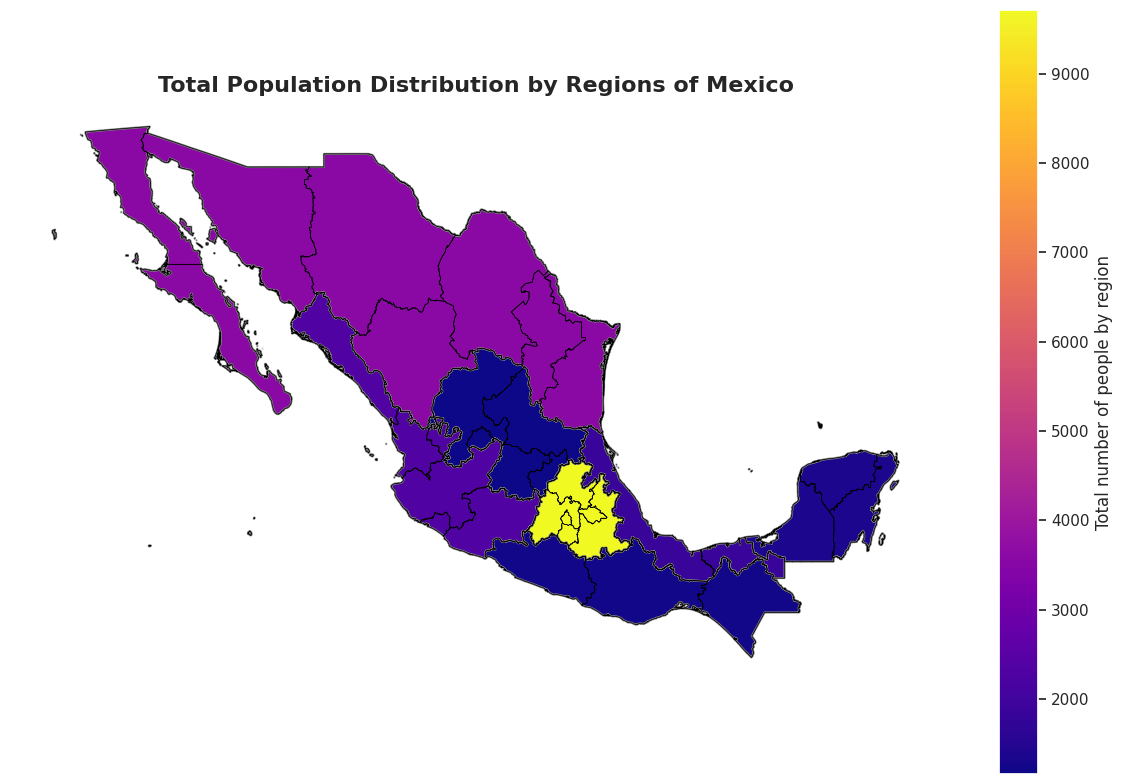

0

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))  # tamaño del plot

# Mapa de coropletas con colormap diferente
gdf_zonas.plot(column="total_count",  # valores para intensidad de colores
               cmap="plasma",        # nuevo colormap moderno y vibrante
               legend=True,
               ax=ax,
               edgecolor='grey',     # color de los bordes
               linewidth=1.5,
               legend_kwds={"label": "Total number of people by region",
                            "orientation": "vertical"})

# Bordes de estados
gdf.plot(ax=ax,
         facecolor='none',
         edgecolor='black',
         linewidth=0.5,
         alpha=1)

# Título
ax.set_title("Total Population Distribution by Regions of Mexico",
             fontsize=16, fontweight='bold')

ax.axis("off")  # sin ejes
plt.tight_layout()
plt.show()

# Guardar figura
nombre_grafico = 'g2.png'
fig.savefig(nombre_grafico)
plt.close(fig)

# Insertar en Excel
pd.DataFrame().to_excel(writer, sheet_name='g2')
worksheet = writer.sheets['g2']
worksheet.insert_image('B2', nombre_grafico)

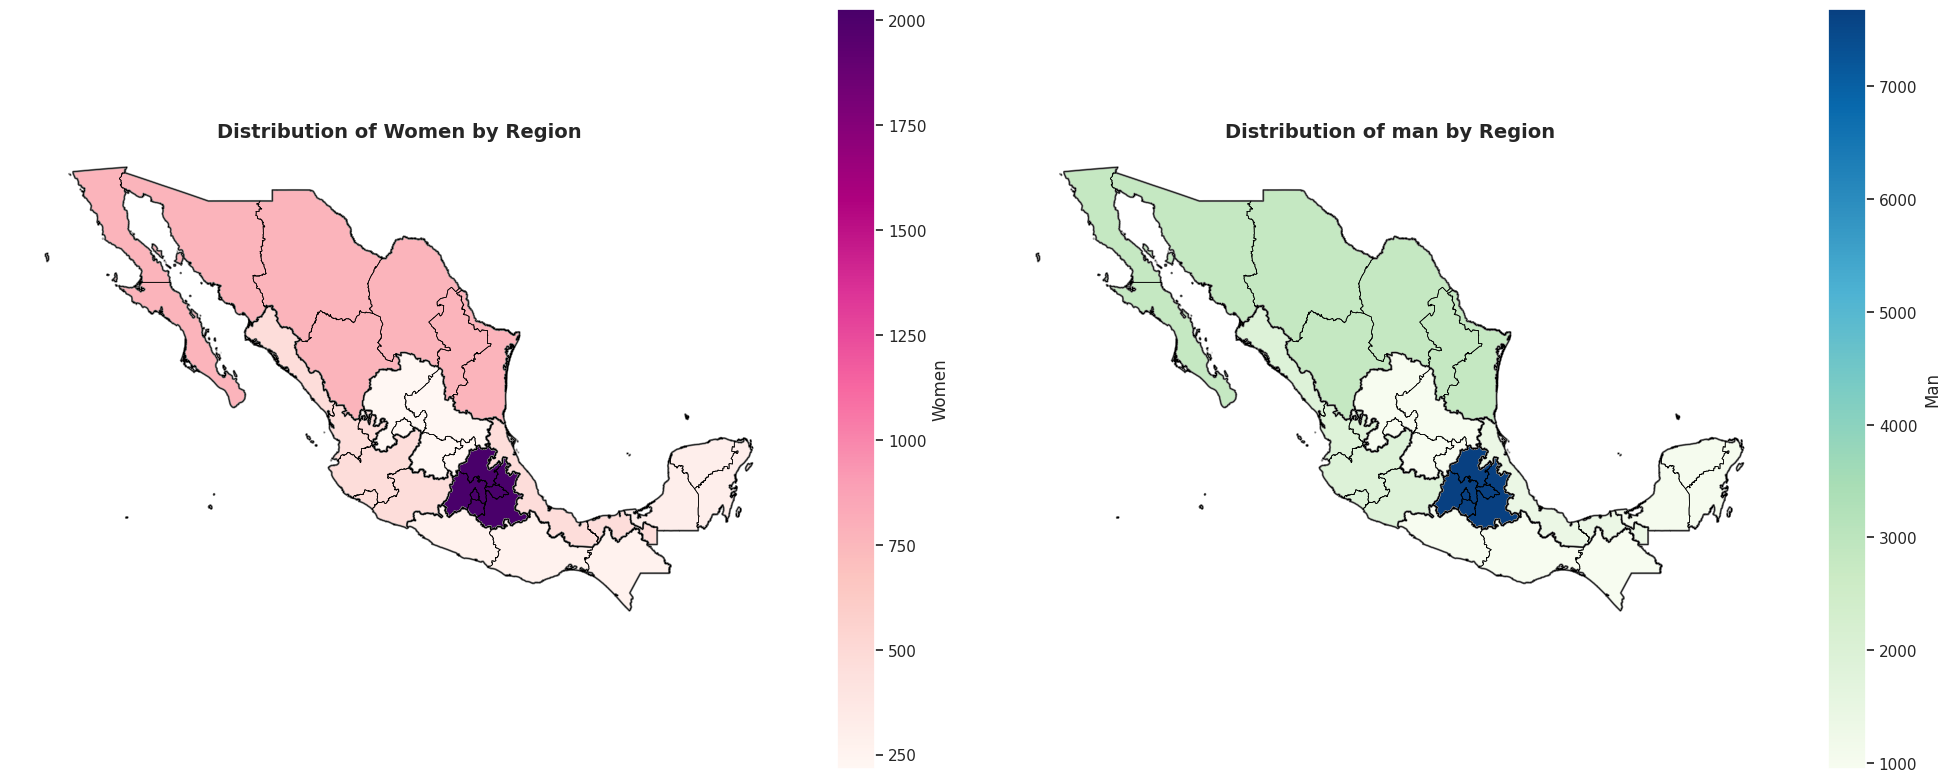

0

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Mapa de mujeres
gdf_zonas.plot(column="female_count",
               cmap="RdPu",
               legend=True,
               ax=ax1,
               edgecolor='grey',
               linewidth=1.5,
               legend_kwds={"label": "Women", "orientation": "vertical"})

gdf.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=0.5, alpha=1)
ax1.set_title("Distribution of Women by Region", fontsize=14, fontweight='bold')
ax1.axis("off")

# Mapa de hombres
gdf_zonas.plot(column="male_count",
               cmap="GnBu",
               legend=True,
               ax=ax2,
               edgecolor='grey',
               linewidth=1.5,
               legend_kwds={"label": "Man", "orientation": "vertical"})

gdf.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.5, alpha=1)
ax2.set_title("Distribution of man by Region", fontsize=14, fontweight='bold')
ax2.axis("off")
plt.tight_layout()
plt.show()
#lo mismo que lo anterior pero con subplot y diferentes colores
# 1. Guardar la figura actual como un archivo de imagen
nombre_grafico = 'g3.png'
fig.savefig(nombre_grafico)
plt.close(fig) # Cierra la figura para liberar memoria

# 2. Crear una nueva hoja en Excel para el gráfico
# (Podemos usar un DF vacío solo para crear la hoja)
pd.DataFrame().to_excel(writer, sheet_name='g3')

# 3. Acceder a la hoja de cálculo recién creada
worksheet = writer.sheets['g3']

# 4. Insertar la imagen en la hoja
# 'B2' es la celda donde quieres que empiece la imagen
worksheet.insert_image('B2', nombre_grafico)

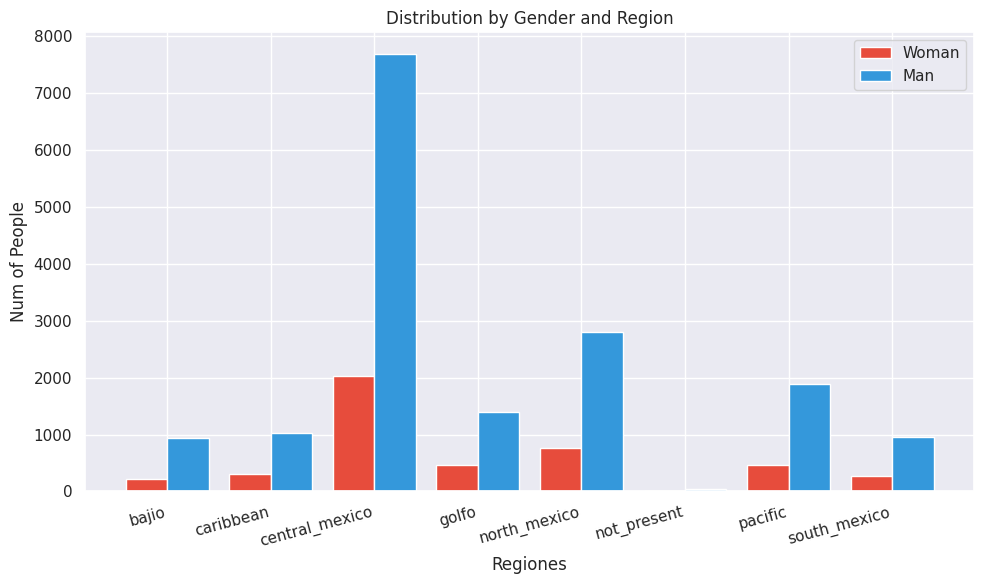

0

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))#tamaño del plot
regions = df_combined['state_group']#datos de los ejes x
x_pos = np.arange(len(regions))#me da un arange para posicionarme mejor del tamaño de tamaño de regiions
ax.bar(x_pos - 0.2, df_combined['female_count'], 0.4, label='Woman', color='#e74c3c', alpha=1)#barra de las mujeres
ax.bar(x_pos + 0.2, df_combined['male_count'], 0.4, label='Man', color='#3498db', alpha=1)#barra de hombres
ax.set_xlabel('Regiones')#eje de los x
ax.set_ylabel('Num of People')#eje de los y
ax.set_title('Distribution by Gender and Region')#titulo
ax.set_xticks(x_pos)#para posicionarse mejor las barras
ax.set_xticklabels(regions, rotation=15, ha='right')#para mostrar los regions mejor con el texto girado a 15 grados
ax.legend()#mostrar las leyendas
plt.tight_layout()#mejor la vista
plt.show()
# 1. Guardar la figura actual como un archivo de imagen
nombre_grafico = 'g4.png'
fig.savefig(nombre_grafico)
plt.close(fig) # Cierra la figura para liberar memoria

# 2. Crear una nueva hoja en Excel para el gráfico
# (Podemos usar un DF vacío solo para crear la hoja)
pd.DataFrame().to_excel(writer, sheet_name='g4')

# 3. Acceder a la hoja de cálculo recién creada
worksheet = writer.sheets['g4']

# 4. Insertar la imagen en la hoja
# 'B2' es la celda donde quieres que empiece la imagen
worksheet.insert_image('B2', nombre_grafico)

In [ ]:
df_features.groupby(['month','state_group'])['user_id'].count()#df de mes, state_fropu u contando por usuario

month   state_group   
202012  bajio              117
        caribbean          135
        central_mexico    1031
        golfo              181
        north_mexico       344
        not_present          4
        pacific            237
        south_mexico       114
202101  bajio              103
        caribbean           99
        central_mexico     917
        golfo              162
        north_mexico       340
        not_present          6
        pacific            197
        south_mexico       113
202102  bajio              241
        caribbean          295
        central_mexico    2018
        golfo              362
        north_mexico       737
        not_present         11
        pacific            486
        south_mexico       239
202103  bajio              439
        caribbean          446
        central_mexico    3418
        golfo              643
        north_mexico      1229
        not_present         23
        pacific            871
        south_mexico       425
202104  bajio              264
        caribbean          363
        central_mexico    2327
        golfo              515
        north_mexico       921
        not_present         12
        pacific            573
        south_mexico       342
Name: user_id, dtype: int64

In [ ]:
df_month_state=df_features.groupby(['month','state_group'])['user_id'].count().reset_index() #lo mismo que lo anterior pero con nuevos indices

In [ ]:
df_month_state.to_excel(writer, sheet_name='df_month_state', index=False)

In [ ]:
df_month_state

month     state_group  user_id
0   202012           bajio      117
1   202012       caribbean      135
2   202012  central_mexico     1031
3   202012           golfo      181
4   202012    north_mexico      344
5   202012     not_present        4
6   202012         pacific      237
7   202012    south_mexico      114
8   202101           bajio      103
9   202101       caribbean       99
10  202101  central_mexico      917
11  202101           golfo      162
12  202101    north_mexico      340
13  202101     not_present        6
14  202101         pacific      197
15  202101    south_mexico      113
16  202102           bajio      241
17  202102       caribbean      295
18  202102  central_mexico     2018
19  202102           golfo      362
20  202102    north_mexico      737
21  202102     not_present       11
22  202102         pacific      486
23  202102    south_mexico      239
24  202103           bajio      439
25  202103       caribbean      446
26  202103  central_mexico     3418
27  202103           golfo      643
28  202103    north_mexico     1229
29  202103     not_present       23
30  202103         pacific      871
31  202103    south_mexico      425
32  202104           bajio      264
33  202104       caribbean      363
34  202104  central_mexico     2327
35  202104           golfo      515
36  202104    north_mexico      921
37  202104     not_present       12
38  202104         pacific      573
39  202104    south_mexico      342

In [ ]:
regions = df_month_state['state_group'].unique()
regions #df que muestra los datos unicos de state_group

array(['bajio', 'caribbean', 'central_mexico', 'golfo', 'north_mexico',
       'not_present', 'pacific', 'south_mexico'], dtype=object)

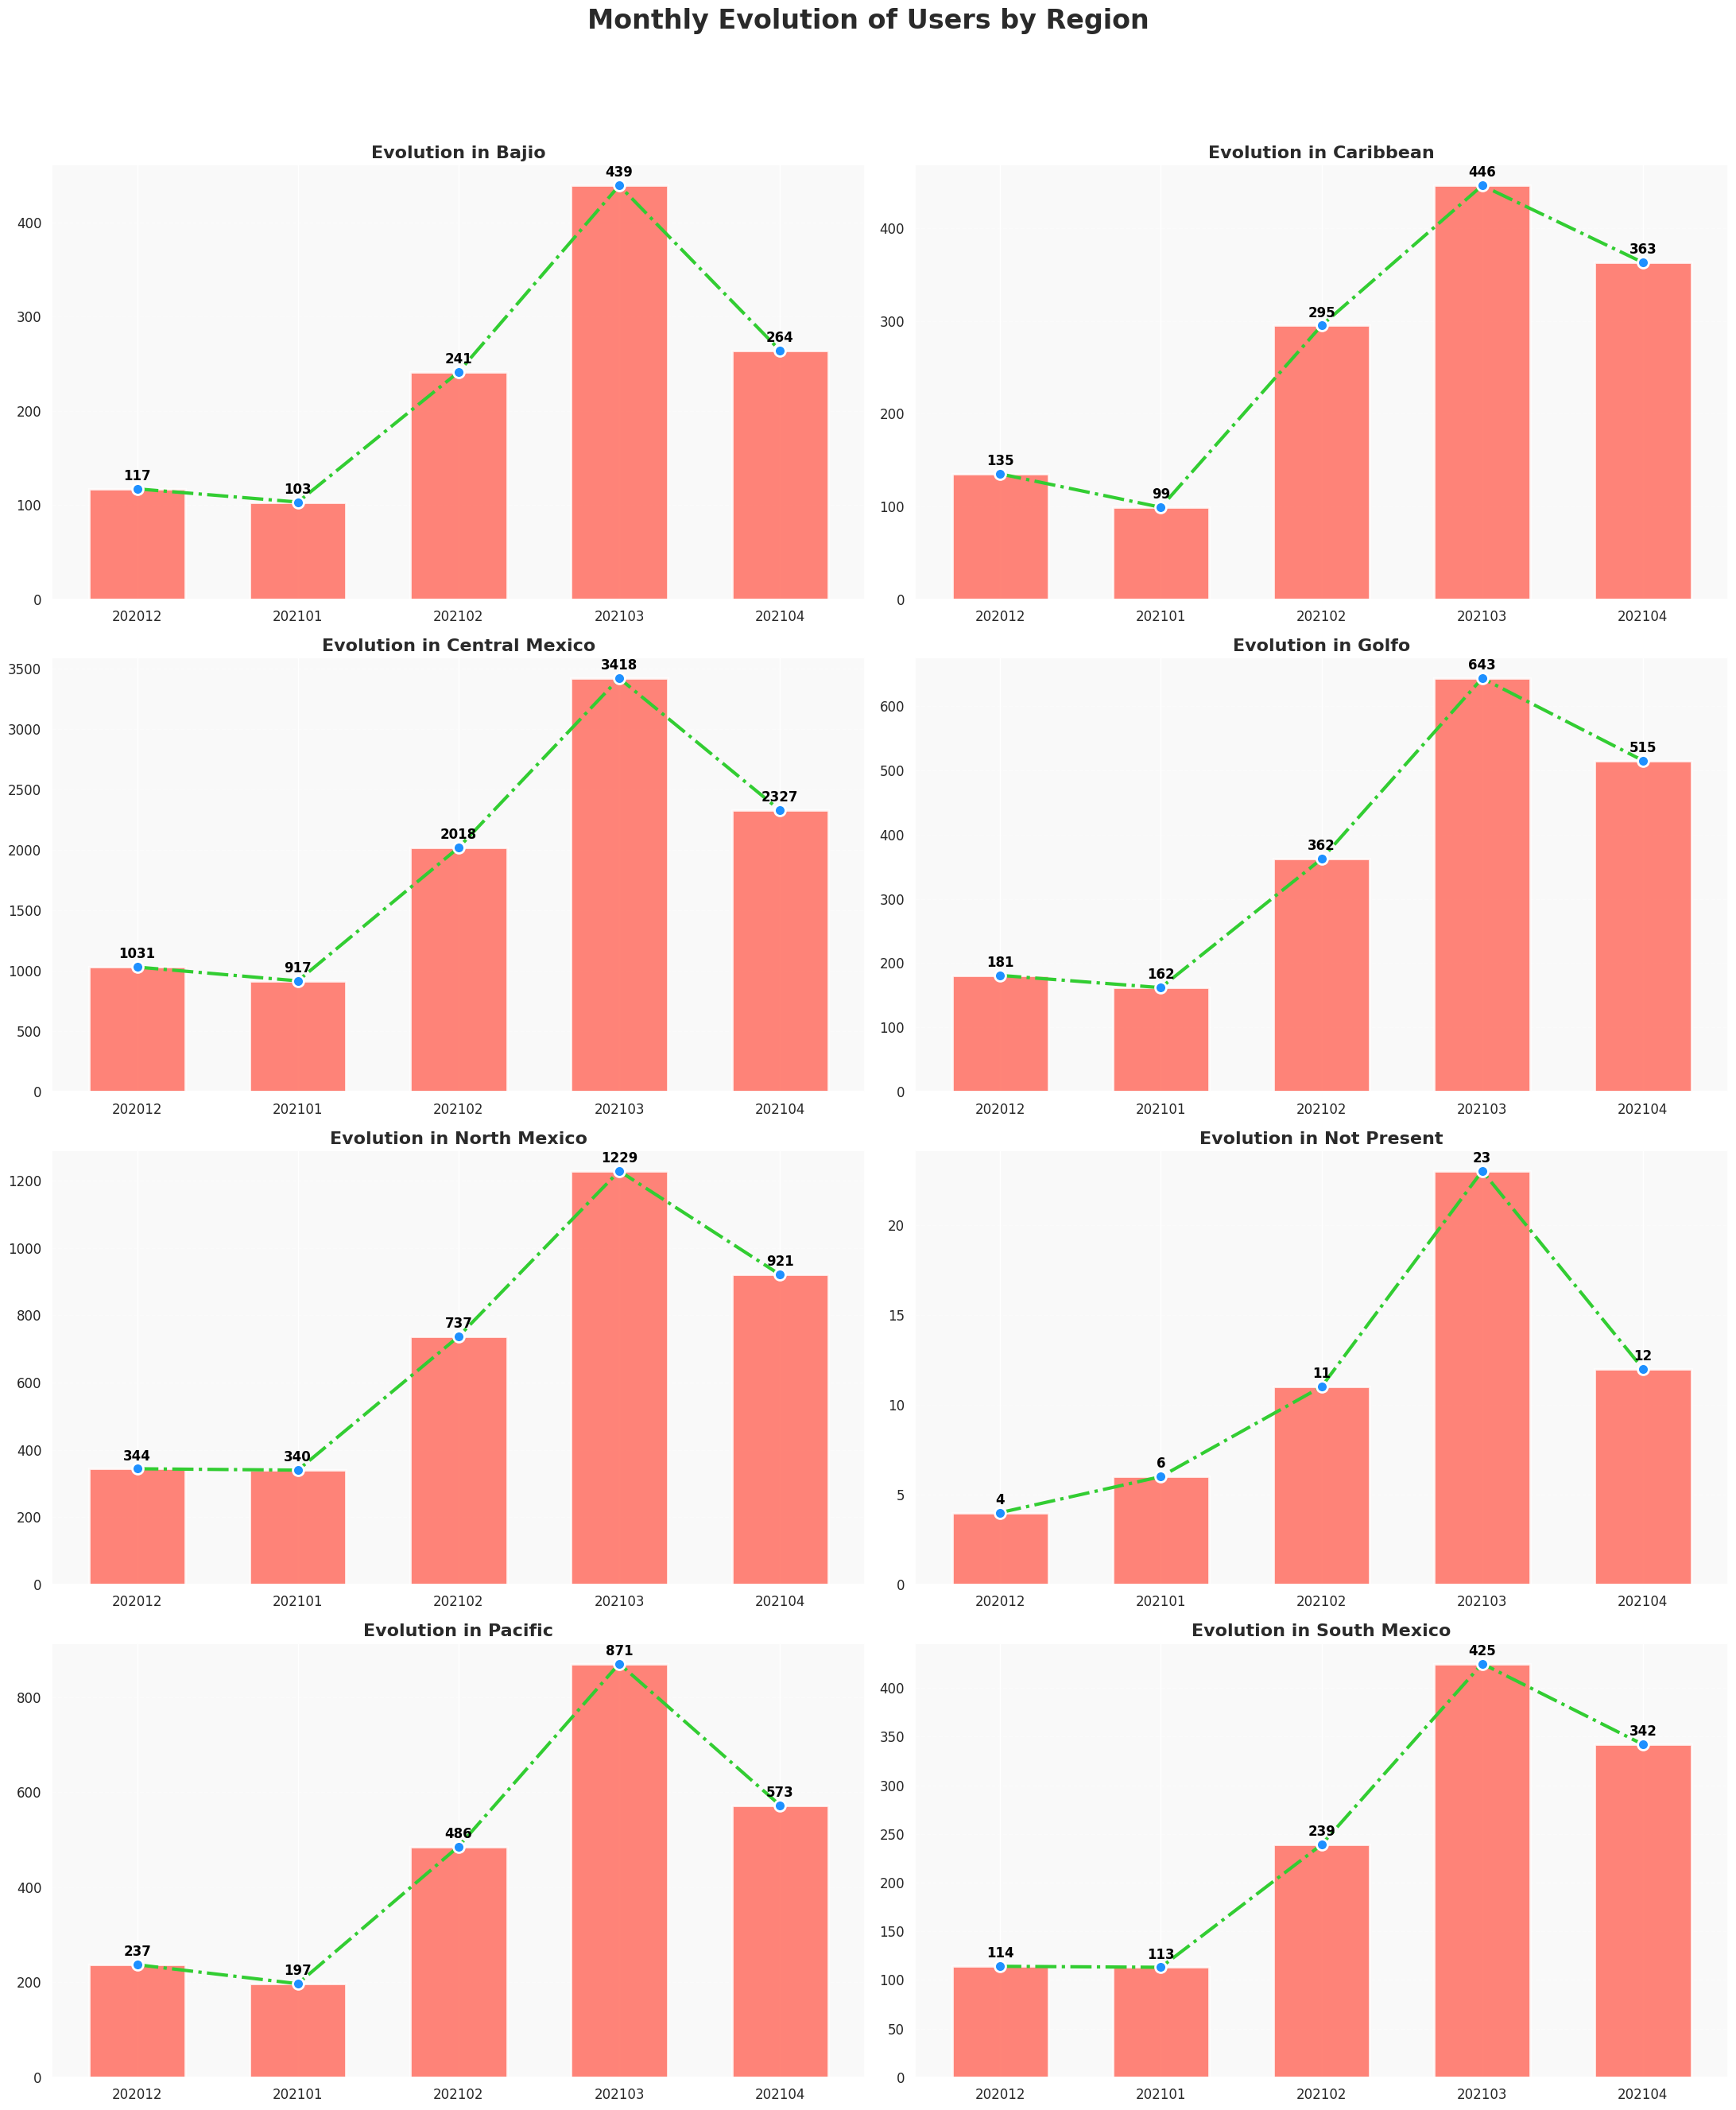

0

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(22, 26))
axs = axs.flatten()

# Paleta de colores más vibrante
bar_color = '#FF6F61'       # Rojo neón
line_color = '#32CD32'      # Verde lima
marker_color = '#1E90FF'    # Azul neón

for i, region in enumerate(regions):
    ax = axs[i]
    region_data = df_month_state[df_month_state['state_group'] == region].reset_index(drop=True)
    x_pos = np.arange(len(region_data['month']))

    # Barras con transparencia y borde
    bars = ax.bar(x_pos, region_data['user_id'], width=0.6,
                  color=bar_color, alpha=0.85, edgecolor='white', linewidth=2)

    # Línea sobre barras con marcadores grandes
    ax.plot(x_pos, region_data['user_id'], marker='o', linestyle='-.',
            color=line_color, markersize=10, markerfacecolor=marker_color,
            markeredgecolor='white', markeredgewidth=2, linewidth=3)

    # Etiquetas sobre barras
    ax.bar_label(bars, padding=5, fontsize=12, weight='bold', color='black')

    # Configuración de ejes
    ax.set_title(f'Evolution in {region.replace("_", " ").title()}', fontsize=16, weight='bold', color='#2A2A2A')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(region_data['month'], fontsize=12, rotation=0)
    ax.tick_params(axis='y', labelsize=12)

    # Grid sutil horizontal
    ax.grid(True, linestyle='--', alpha=0.4, axis='y')

    # Fondo
    ax.set_facecolor('#F9F9F9')

# Apagar ejes de subplots vacíos
for i in range(len(regions), len(axs)):
    axs[i].axis('off')

# Título general
fig.suptitle('Monthly Evolution of Users by Region', fontsize=24, weight='bold', color='#2A2A2A', y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Guardar figura
nombre_grafico = 'g5.png'
fig.savefig(nombre_grafico, facecolor=fig.get_facecolor())
plt.close(fig)

# Insertar en Excel
pd.DataFrame().to_excel(writer, sheet_name='g5')
worksheet = writer.sheets['g5']
worksheet.insert_image('B2', nombre_grafico)

In [ ]:
df_features.groupby(['state_group'])['output'].mean()#un df para la media por state_group

state_group
bajio             0.313574
caribbean         0.256353
central_mexico    0.295953
golfo             0.291465
north_mexico      0.320078
not_present       0.571429
pacific           0.327834
south_mexico      0.274939
Name: output, dtype: float64

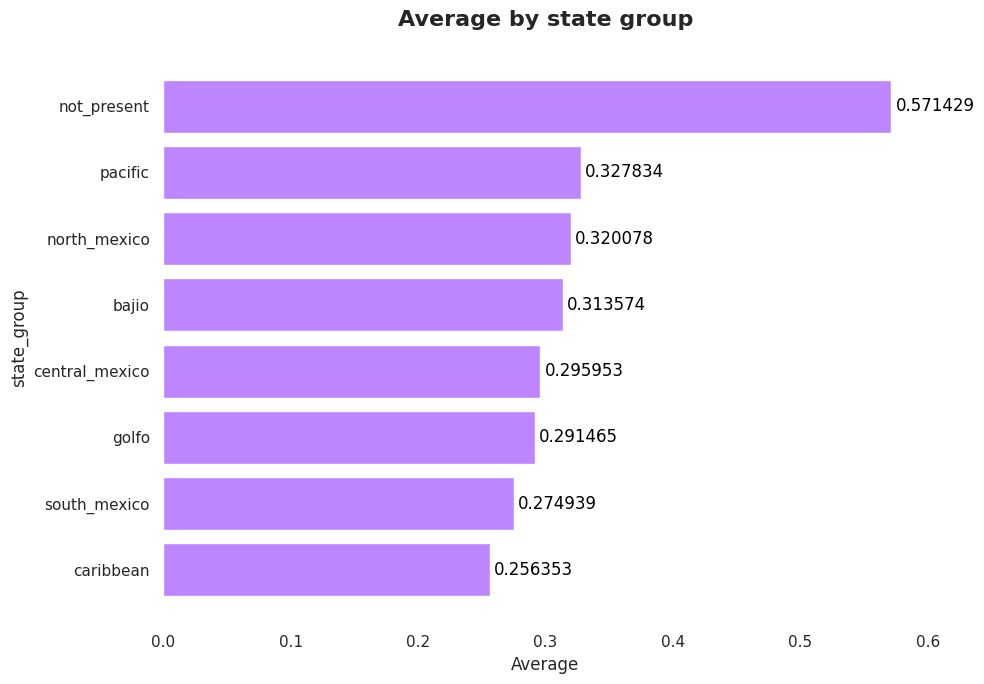

0

In [ ]:
df_promedio_estado = df_features.groupby(['state_group'])['output'].mean() #df para la grafica


df_sorted = df_promedio_estado.sort_values(ascending=True)#valores de forma desendinte

#datos para la grafica
estados = df_sorted.index
promedios = df_sorted.values


fig, ax = plt.subplots(figsize=(10, 7)) #tamaño de plot


fig.set_facecolor('White')
ax.set_facecolor('White')#fondo blanco
barhs = ax.barh(estados, promedios, color='#BD85FF')#barras laterales
ax.barh(estados, promedios, color='#BD85FF')#texto de equitetas

ax.set_title('Average by state group', fontsize=16, weight='bold', pad=20)#título

ax.bar_label(barhs, padding=3, color ='black')#texto de equitetas

ax.set_xlabel('Average', fontsize=12)
ax.set_ylabel('state_group',fontsize=12) #ejes


ax.tick_params(axis='x')
ax.tick_params(axis='y')#parámetros de cada eje

ax.grid(False)
#estetica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()
# 1. Guardar la figura actual como un archivo de imagen
nombre_grafico = 'g6.png'
fig.savefig(nombre_grafico)
plt.close(fig) # Cierra la figura para liberar memoria

# 2. Crear una nueva hoja en Excel para el gráfico
# (Podemos usar un DF vacío solo para crear la hoja)
pd.DataFrame().to_excel(writer, sheet_name='g6')

# 3. Acceder a la hoja de cálculo recién creada
worksheet = writer.sheets['g6']

# 4. Insertar la imagen en la hoja
# 'B2' es la celda donde quieres que empiece la imagen
worksheet.insert_image('B2', nombre_grafico)

In [ ]:
df_features.groupby(['output'])['user_id'].count()# un df que cuenta los estados de output por usuario

output
0    14886
1     6414
Name: user_id, dtype: int64

In [ ]:
df_output_count=df_features.groupby(['output'])['user_id'].count()

In [ ]:
df_features['output'].mean()#el procentaje de estado 1 en output respecto al total

np.float64(0.3011267605633803)

In [ ]:
6414/21300

0.3011267605633803

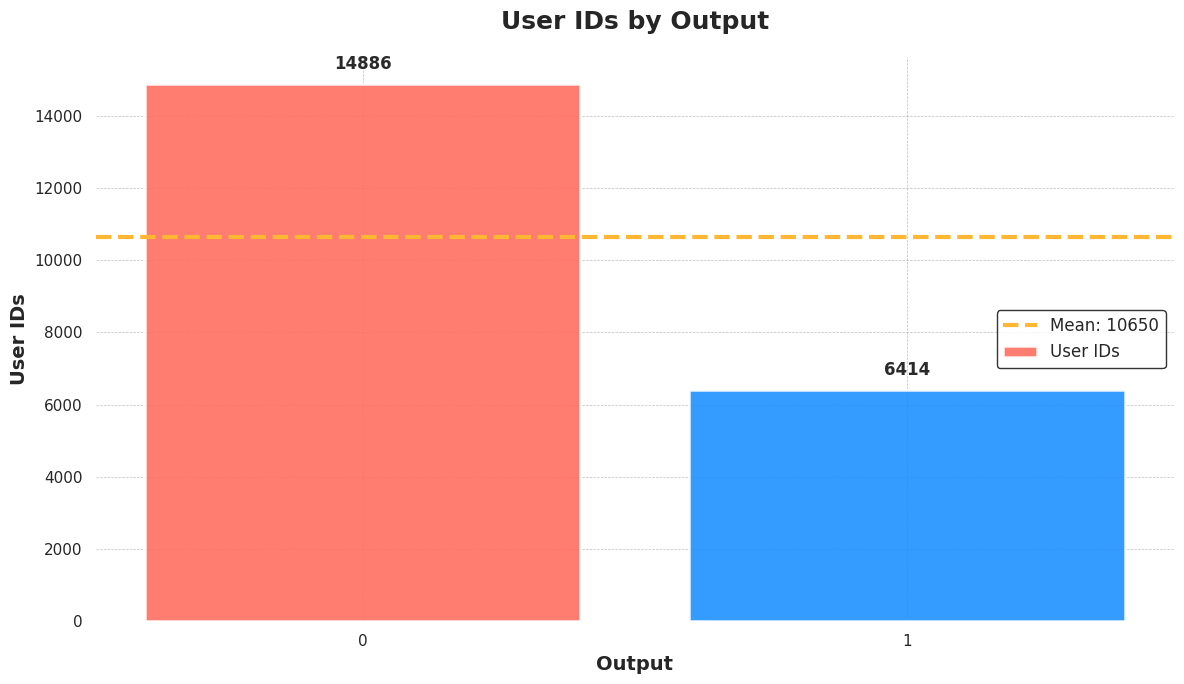

0

In [ ]:
outputs = df_output_count.index.astype(str)
user_ids = df_output_count.values
mean_user_id = user_ids.mean()

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))

# Colores de barras
bar_colors = ["#FF6F61", "#1E90FF", "#32CD32", "#FFD700", "#FF69B4"]  # Se pueden repetir si hay más barras

# Barras
bars = ax.bar(outputs, user_ids, color=[bar_colors[i % len(bar_colors)] for i in range(len(outputs))],
              edgecolor="white", linewidth=1.8, alpha=0.9, label='User IDs')

# Línea de mean
ax.axhline(y=mean_user_id, color="#FFB733", linestyle="--", linewidth=3,
           label=f"Mean: {mean_user_id:.0f}")

# Valores encima de barras
for bar, val in zip(bars, user_ids):
    ax.text(bar.get_x() + bar.get_width()/2, val + max(user_ids)*0.02, f"{val}",
            ha="center", va="bottom", fontsize=12, weight="bold", color="#2A2A2A")

# Estética
ax.set_ylabel("User IDs", fontsize=14, weight="bold")
ax.set_xlabel("Output", fontsize=14, weight="bold")
ax.set_title("User IDs by Output", fontsize=18, weight="bold", pad=20)
ax.legend(frameon=True, loc = 7, facecolor='white', edgecolor='black', fontsize=12)

# Grid más moderno
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='gray')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# Guardar figura
nombre_grafico = 'g7.png'
fig.savefig(nombre_grafico, facecolor=fig.get_facecolor())
plt.close(fig)

# Insertar en Excel
pd.DataFrame().to_excel(writer, sheet_name='g7')
worksheet = writer.sheets['g7']
worksheet.insert_image('B2', nombre_grafico)

In [ ]:
state_group_count=df_features.groupby(['state_group'])['user_id'].count()
state_group_out=df_features.groupby(['state_group'])['output'].mean()

In [ ]:
salida=pd.concat([state_group_count,state_group_out],axis=1)
salida.rename(columns={'user_id':'count','output':'avg_output'},inplace=True)
salida

count  avg_output
state_group                      
bajio            1164    0.313574
caribbean        1338    0.256353
central_mexico   9711    0.295953
golfo            1863    0.291465
north_mexico     3571    0.320078
not_present        56    0.571429
pacific          2364    0.327834
south_mexico     1233    0.274939

In [ ]:
salida.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, bajio to south_mexico
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   count       8 non-null      int64  
 1   avg_output  8 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 192.0+ bytes


In [ ]:
gdf = gdf.merge(salida, on="state_group", how="left") #el gdf lo combina con salida con la columna de state_group guardando la estructura
gdf_zonas = gdf.dissolve(by='state_group', aggfunc='first').reset_index()#gdf con las geometrias agrupadas con indice nuevo
gdf_zonas = gdf_zonas.to_crs('EPSG:4326')  #cambia el crs del archivo a EPSG:4326 como para gps en el codigo estandar WGS84
gdf = gdf.to_crs('EPSG:4326') #lo mismo que lo anterior pero con el gdf original

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   AREA          382 non-null    float64 
 1   PERIMETER     382 non-null    float64 
 2   COV_          382 non-null    int32   
 3   COV_ID        382 non-null    int32   
 4   ENTIDAD       382 non-null    object  
 5   CAPITAL       43 non-null     object  
 6   RASGO_GEOG    339 non-null    object  
 7   CVE_EDO       382 non-null    object  
 8   geometry      382 non-null    geometry
 9   state_group   382 non-null    object  
 10  total_count   382 non-null    int64   
 11  female_count  382 non-null    int64   
 12  male_count    382 non-null    int64   
 13  female_pct    382 non-null    float64 
 14  male_pct      382 non-null    float64 
 15  count         382 non-null    int64   
 16  avg_output    382 non-null    float64 
dtypes: float64(5), geometry(1), int32(2), int64(4)

In [ ]:
gdf_zonas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   state_group   7 non-null      object  
 1   geometry      7 non-null      geometry
 2   AREA          7 non-null      float64 
 3   PERIMETER     7 non-null      float64 
 4   COV_          7 non-null      int32   
 5   COV_ID        7 non-null      int32   
 6   ENTIDAD       7 non-null      object  
 7   CAPITAL       7 non-null      object  
 8   RASGO_GEOG    5 non-null      object  
 9   CVE_EDO       7 non-null      object  
 10  total_count   7 non-null      int64   
 11  female_count  7 non-null      int64   
 12  male_count    7 non-null      int64   
 13  female_pct    7 non-null      float64 
 14  male_pct      7 non-null      float64 
 15  count         7 non-null      int64   
 16  avg_output    7 non-null      float64 
dtypes: float64(5), geometry(1), int32(2), int64(4), ob

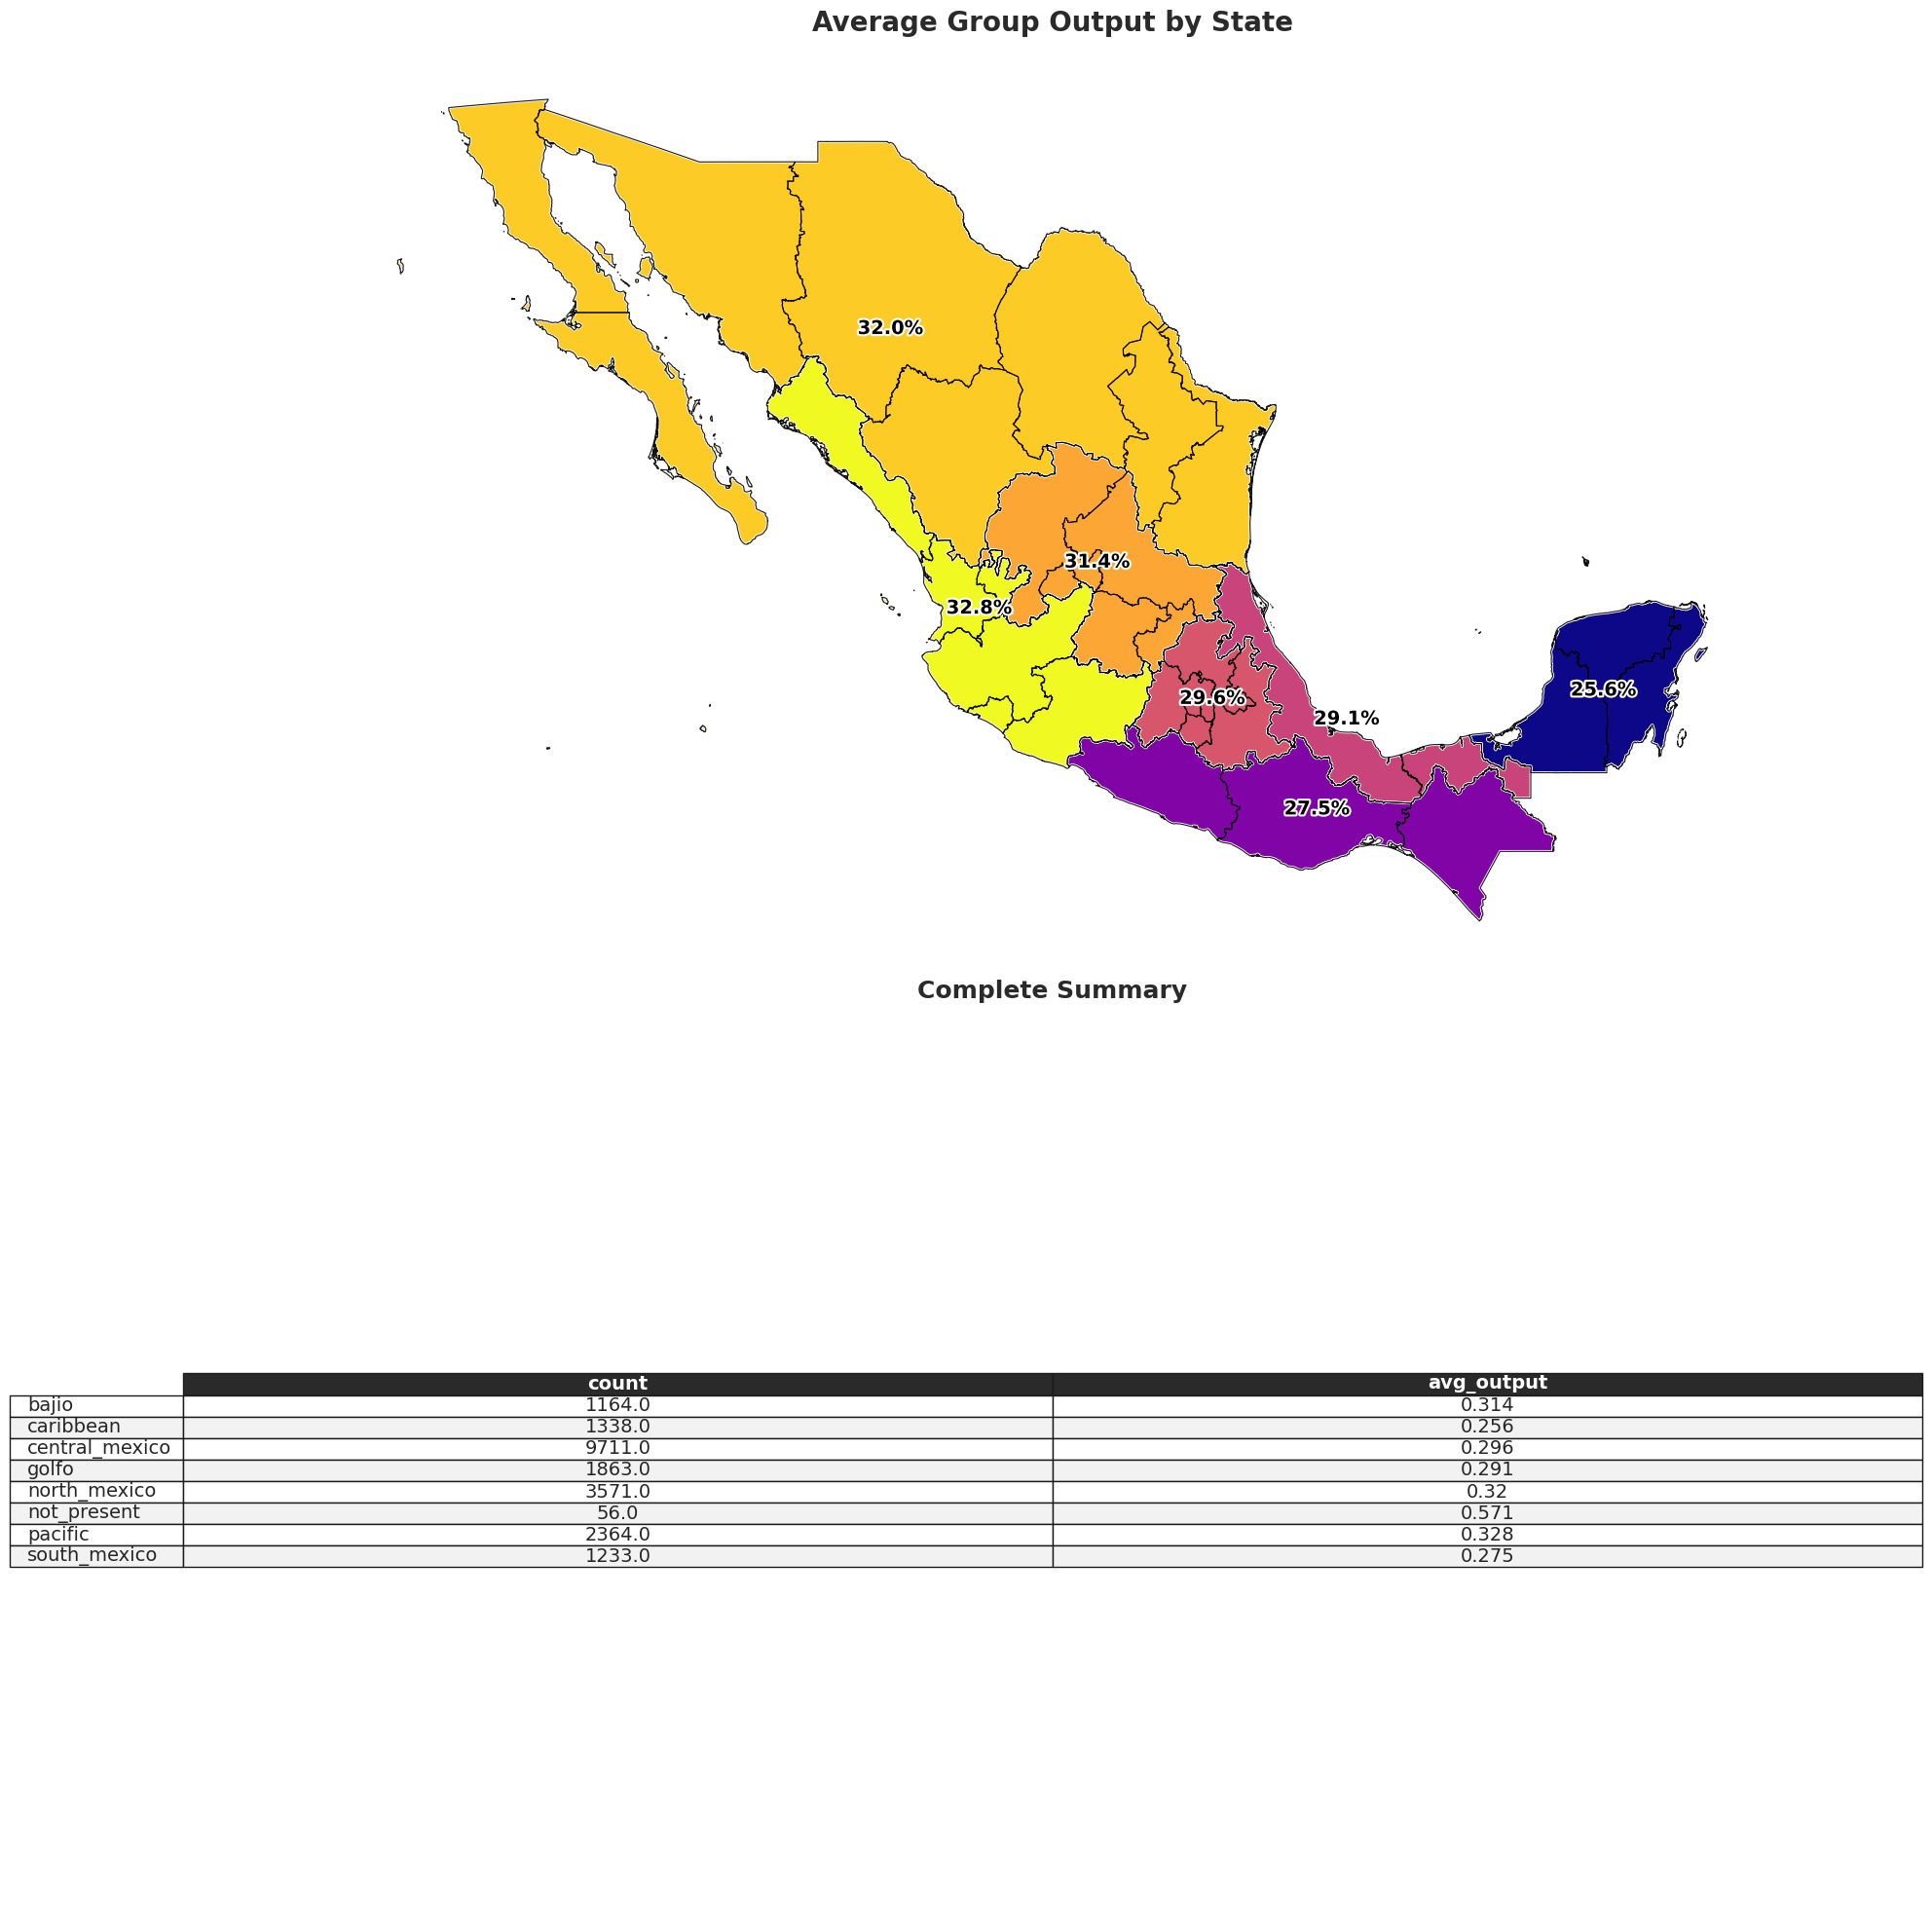

0

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
import pandas as pd

# ---------- 2. crear figura y ejes ----------
fig = plt.figure(figsize=(20, 20))          # lienzo grande
ax_map  = plt.subplot(2, 1, 1)              # mapa arriba
ax_table = plt.subplot(2, 1, 2)             # tabla abajo
ax_table.axis('off')                        # quitar marco al subplot

# ---------- 3. mapa de coropletas ----------
gdf_zonas.plot(column='avg_output',
               cmap='plasma',              # colormap más moderno y llamativo
               ax=ax_map,
               edgecolor='white',          # bordes claros
               linewidth=2)

# Anotar porcentajes en el centro de cada polígono
for _, row in gdf_zonas.iterrows():
    ax_map.text(row.geometry.centroid.x,
                row.geometry.centroid.y,
                f"{(row.avg_output * 100):.1f}%",
                ha='center', va='center',
                fontsize=14, color='black', weight='bold',
                path_effects=[patheffects.withStroke(linewidth=3, foreground='white')])

# Límites de estados (opcional)
gdf.boundary.plot(ax=ax_map, color='black', linewidth=.8, alpha=.9)

ax_map.set_title('Average Group Output by State', fontsize=20, fontweight='bold', color='#2A2A2A', pad=20)
ax_map.set_axis_off()

# ---------- 4. tabla resumen ----------
# Estilo de tabla con colores alternados
tabla_datos = salida.round({'avg_output': 3})
table = pd.plotting.table(ax_table,
                          tabla_datos,
                          loc='center',
                          cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(14)

# Colorear filas alternadas
for i, key in enumerate(table.get_celld()):
    cell = table.get_celld()[key]
    if key[0] == 0:
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#2A2A2A')
    elif key[0] % 2 == 0:
        cell.set_facecolor('#F2F2F2')
    else:
        cell.set_facecolor('#FFFFFF')

ax_table.set_title('Complete Summary', fontsize=18, fontweight='bold', pad=15, color='#2A2A2A')

plt.tight_layout()
plt.show()

# Guardar la figura
nombre_grafico = 'g8.png'
fig.savefig(nombre_grafico, facecolor=fig.get_facecolor())
plt.close(fig)

# Insertar en Excel
pd.DataFrame().to_excel(writer, sheet_name='g8')
worksheet = writer.sheets['g8']
worksheet.insert_image('B2', nombre_grafico)

####Discret Variables

In [ ]:
df_scores=df_features['output'] #Guardamos los variables de la columna output en un df
print(df_scores)

0        1
1        1
2        0
3        0
4        1
        ..
21295    1
21296    0
21297    0
21298    1
21299    1
Name: output, Length: 21300, dtype: int64


In [ ]:
df_month=df_features['month'] #Guardamos los variables de la columna month en un df
print(df_month)

0        202104
1        202103
2        202103
3        202103
4        202103
          ...  
21295    202103
21296    202102
21297    202103
21298    202102
21299    202103
Name: month, Length: 21300, dtype: int64


In [ ]:
pd.concat([df_month,df_scores], axis=1) #Concatenamos los df anteriores en uno solo

month  output
0      202104       1
1      202103       1
2      202103       0
3      202103       0
4      202103       1
...       ...     ...
21295  202103       1
21296  202102       0
21297  202103       0
21298  202102       1
21299  202103       1

[21300 rows x 2 columns]

In [ ]:
#df_scores=df_features['output']
#Creamos una función para analizar la relación entre una variable categórica y una variable objetivo binaria
def woe_discrete(df, discrete_variable_name, good_bad_variable_df): #Componentes de la función
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1) #Crea un df concatenando los df de las dos variables
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()],
                axis = 1) #Crea un df concatenando: un df creado a partir de agrupar la primer columna del df y contando a partir de la segunda columna, y de un df creado a partir de agrupar a partir de la primer columna y sacar el promedio de la segunda
    df = df.iloc[:, [0, 1, 3]] #Del df anterior guardamos solo la primer columna y las dos del conteo y promedio
    df.columns = [df.columns.values[0], 'n_obs', 'avg_BR'] #Renombramos las columnas
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum() #Calculamos la proporción de las observaciones
    df = df.sort_values(['prop_n_obs']) #Se ordena el df en base a la proporción
    df = df.reset_index(drop = True) #Resetea el índice para que empiece en 0
    return df

In [ ]:
df=pd.concat([df_features['state_group'], df_scores], axis = 1) #Creamos un df concatenando las columnas de state y scores
print(df)

          state_group  output
0        north_mexico       1
1      central_mexico       1
2        north_mexico       0
3               bajio       0
4        south_mexico       1
...               ...     ...
21295  central_mexico       1
21296  central_mexico       0
21297  central_mexico       0
21298    south_mexico       1
21299         pacific       1

[21300 rows x 2 columns]


In [ ]:
df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count() #Agrupamos el df a partir de la primer columna y contamos a partir de la segunda columna
#df_features.groupby(['gender','state_group'])['user_id'].count()

state_group  output
0           bajio    1164
1       caribbean    1338
2  central_mexico    9711
3           golfo    1863
4    north_mexico    3571
5     not_present      56
6         pacific    2364
7    south_mexico    1233

In [ ]:
df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean() #Agrupamos el df a partir de la primer columna y después sacamos la media a partir de la segunda columna

state_group    output
0           bajio  0.313574
1       caribbean  0.256353
2  central_mexico  0.295953
3           golfo  0.291465
4    north_mexico  0.320078
5     not_present  0.571429
6         pacific  0.327834
7    south_mexico  0.274939

In [ ]:
#Lo mismo del paso anterior pero los imprimimos juntos separados mediante un espacio
print(df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count())
print("")
print(df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean())

      state_group  output
0           bajio    1164
1       caribbean    1338
2  central_mexico    9711
3           golfo    1863
4    north_mexico    3571
5     not_present      56
6         pacific    2364
7    south_mexico    1233

      state_group    output
0           bajio  0.313574
1       caribbean  0.256353
2  central_mexico  0.295953
3           golfo  0.291465
4    north_mexico  0.320078
5     not_present  0.571429
6         pacific  0.327834
7    south_mexico  0.274939


In [ ]:
df=pd.concat(\
          [df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),\
           df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()],\
          axis=1) #Concatenamos los df de los pasos anteriores
print(df)

      state_group  output     state_group    output
0           bajio    1164           bajio  0.313574
1       caribbean    1338       caribbean  0.256353
2  central_mexico    9711  central_mexico  0.295953
3           golfo    1863           golfo  0.291465
4    north_mexico    3571    north_mexico  0.320078
5     not_present      56     not_present  0.571429
6         pacific    2364         pacific  0.327834
7    south_mexico    1233    south_mexico  0.274939


In [ ]:
df = df.iloc[:, [0, 1, 3]]
print(df) #Del df traemos únicamente la primer, segunda y última columna, desestimamos la columna repetida

      state_group  output    output
0           bajio    1164  0.313574
1       caribbean    1338  0.256353
2  central_mexico    9711  0.295953
3           golfo    1863  0.291465
4    north_mexico    3571  0.320078
5     not_present      56  0.571429
6         pacific    2364  0.327834
7    south_mexico    1233  0.274939


In [ ]:
df.columns #Mostramos las columnas del df

Index(['state_group', 'output', 'output'], dtype='object')

In [ ]:
df.columns = [df.columns.values[0], 'n_obs', 'avg_BR'] #Renombramos la segunda y tercer columnas
print(df)

      state_group  n_obs    avg_BR
0           bajio   1164  0.313574
1       caribbean   1338  0.256353
2  central_mexico   9711  0.295953
3           golfo   1863  0.291465
4    north_mexico   3571  0.320078
5     not_present     56  0.571429
6         pacific   2364  0.327834
7    south_mexico   1233  0.274939


In [ ]:
df['n_obs'].sum() #Sumamos la columna de observaciones

np.int64(21300)

In [ ]:
df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum() #Calculamos la proporción
print(df)

      state_group  n_obs    avg_BR  prop_n_obs
0           bajio   1164  0.313574    0.054648
1       caribbean   1338  0.256353    0.062817
2  central_mexico   9711  0.295953    0.455915
3           golfo   1863  0.291465    0.087465
4    north_mexico   3571  0.320078    0.167653
5     not_present     56  0.571429    0.002629
6         pacific   2364  0.327834    0.110986
7    south_mexico   1233  0.274939    0.057887


In [ ]:
df = df.sort_values(['prop_n_obs']) #Ordenamos mediante la proporción
print(df)

      state_group  n_obs    avg_BR  prop_n_obs
5     not_present     56  0.571429    0.002629
0           bajio   1164  0.313574    0.054648
7    south_mexico   1233  0.274939    0.057887
1       caribbean   1338  0.256353    0.062817
3           golfo   1863  0.291465    0.087465
6         pacific   2364  0.327834    0.110986
4    north_mexico   3571  0.320078    0.167653
2  central_mexico   9711  0.295953    0.455915


In [ ]:
df = df.reset_index(drop = True) #Reseteamos el índice para que inicie nuevamente en 0
print(df)

      state_group  n_obs    avg_BR  prop_n_obs
0     not_present     56  0.571429    0.002629
1           bajio   1164  0.313574    0.054648
2    south_mexico   1233  0.274939    0.057887
3       caribbean   1338  0.256353    0.062817
4           golfo   1863  0.291465    0.087465
5         pacific   2364  0.327834    0.110986
6    north_mexico   3571  0.320078    0.167653
7  central_mexico   9711  0.295953    0.455915


In [ ]:
df_temp = woe_discrete(df_features, 'state_group', df_scores) #Aplicamos nuestra función a nuestro df con los parámetros de state y scores
print(df_temp)

      state_group  n_obs    avg_BR  prop_n_obs
0     not_present     56  0.571429    0.002629
1           bajio   1164  0.313574    0.054648
2    south_mexico   1233  0.274939    0.057887
3       caribbean   1338  0.256353    0.062817
4           golfo   1863  0.291465    0.087465
5         pacific   2364  0.327834    0.110986
6    north_mexico   3571  0.320078    0.167653
7  central_mexico   9711  0.295953    0.455915


In [ ]:
df_temp1 = df_temp.iloc[:, [0, 3]]
print(df_temp1)

      state_group  prop_n_obs
0     not_present    0.002629
1           bajio    0.054648
2    south_mexico    0.057887
3       caribbean    0.062817
4           golfo    0.087465
5         pacific    0.110986
6    north_mexico    0.167653
7  central_mexico    0.455915


In [ ]:
def plot_by_woe(df_woe: pd.DataFrame, rotation_of_x_axis_labels: int = 0):
    sns.set_theme(style="whitegrid")  # estilos con sns
    fig, ax1 = plt.subplots(figsize=(14, 7))  # definición de tamaño del plot
    feature_name = df_woe.columns[0]  # tener el nombre de los state_group

    sns.barplot(
        x=df_woe.iloc[:, 0].astype(str),
        y='prop_n_obs',
        data=df_woe,
        ax=ax1,
        color='#2ecc71',  # verde
        alpha=0.8,
    )  # barras

    # Configurar etiquetas y colores para el primer eje
    ax1.set_xlabel(f'{feature_name}', fontsize=12, weight='bold')
    ax1.set_ylabel('prop_n_obs', fontsize=12, color='#2ecc71', weight='bold')
    ax1.tick_params(axis='y', labelcolor='#2ecc71')
    ax1.tick_params(axis='x', rotation=rotation_of_x_axis_labels)

    # Segundo plot para los avg_BR
    ax2 = ax1.twinx()
    sns.lineplot(
        x=df_woe.iloc[:, 0].astype(str),
        y='avg_BR',
        data=df_woe,
        ax=ax2,
        color='#9b59b6',  # morado
        marker='D',  # rombos
        linestyle='-.',  # línea punto-guion
        linewidth=2.5,
    )

    # Configurar etiquetas y colores para el segundo eje
    ax2.set_ylabel('avg_BR', fontsize=12, color='#9b59b6', weight='bold')
    ax2.tick_params(axis='y', labelcolor='#9b59b6')

    # título final
    plt.title(f'Average BR by {feature_name}', fontsize=16, weight='bold', pad=20)
    fig.tight_layout()

    # sin ejes extra
    ax2.grid(False)
    plt.show()

    if writer is not None:
        safe_name = re.sub(r'[\\/*?:\[\]]', '', feature_name)[:31]  # Excel limita a 31 chars
        nombre_grafico = f'{safe_name}.png'

        # Guardar figura
        fig.savefig(nombre_grafico, bbox_inches='tight', dpi=300)
        plt.close(fig)

        # Crear hoja y pegar imagen
        df_woe.to_excel(writer, sheet_name=safe_name, index=False)
        worksheet = writer.sheets[safe_name]
        worksheet.insert_image('B2', nombre_grafico)

|    | state_group    |   n_obs |   avg_BR |   prop_n_obs |
|---:|:---------------|--------:|---------:|-------------:|
|  0 | not_present    |      56 | 0.571429 |   0.00262911 |
|  1 | bajio          |    1164 | 0.313574 |   0.0546479  |
|  2 | south_mexico   |    1233 | 0.274939 |   0.0578873  |
|  3 | caribbean      |    1338 | 0.256353 |   0.0628169  |
|  4 | golfo          |    1863 | 0.291465 |   0.0874648  |
|  5 | pacific        |    2364 | 0.327834 |   0.110986   |
|  6 | north_mexico   |    3571 | 0.320078 |   0.167653   |
|  7 | central_mexico |    9711 | 0.295953 |   0.455915   |


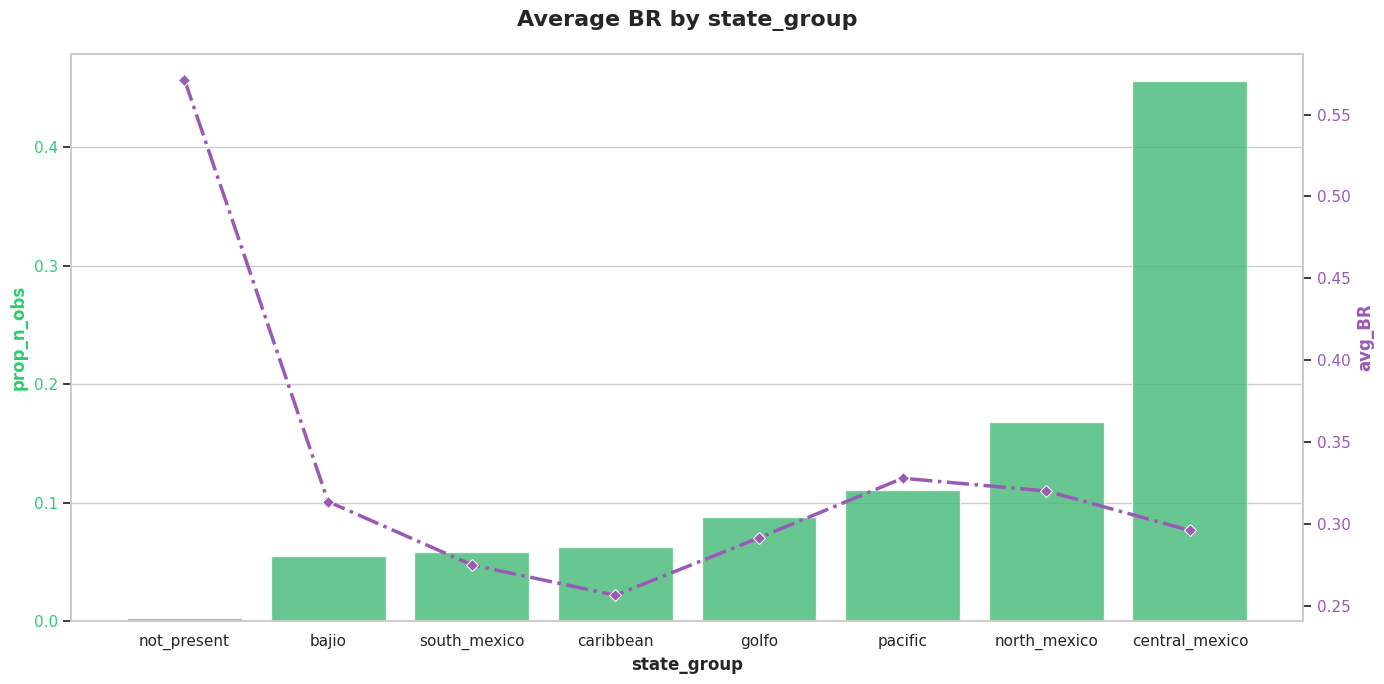

In [ ]:
df_temp = woe_discrete(df_features, 'state_group', df_scores)
print(df_temp.to_markdown())
plot_by_woe(df_temp)

|    | gender   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:---------|--------:|---------:|-------------:|
|  0 | FEMALE   |    4524 | 0.282714 |     0.212394 |
|  1 | MALE     |   16776 | 0.306092 |     0.787606 |


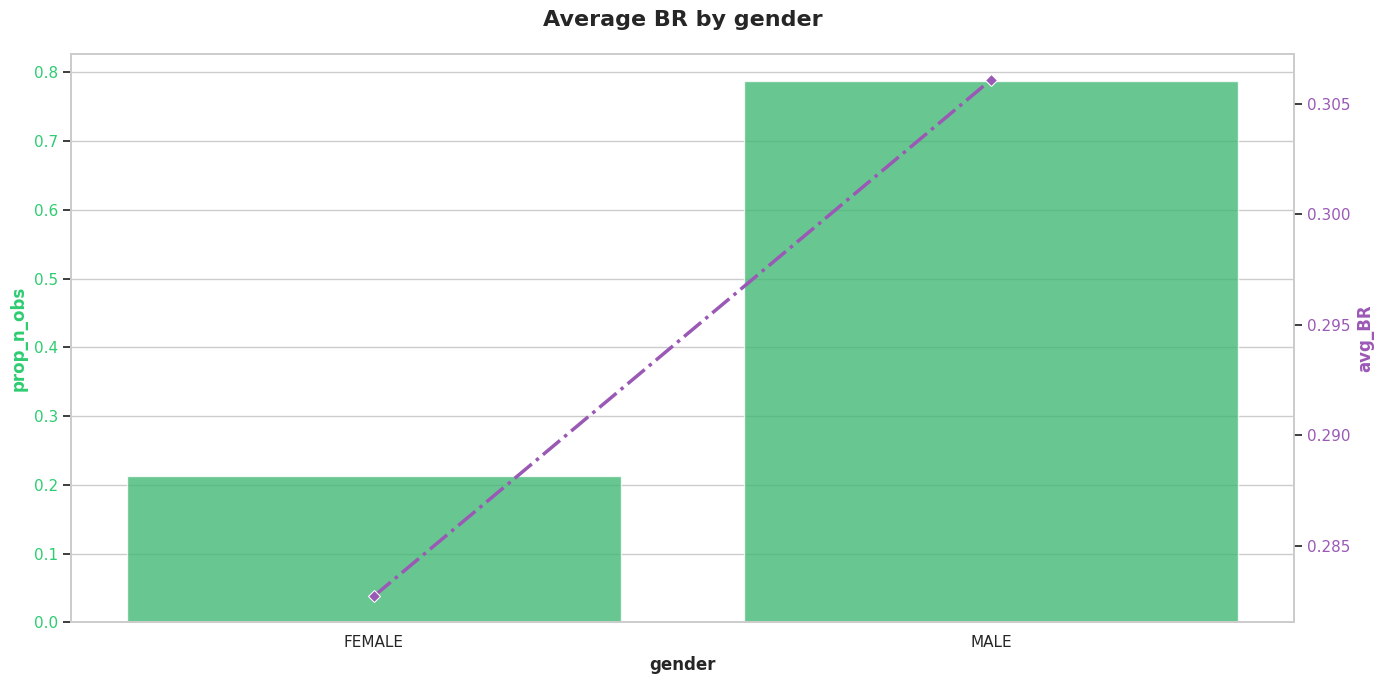

In [ ]:
df_temp = woe_discrete(df_features, 'gender', df_scores)
print(df_temp.to_markdown())
plot_by_woe(df_temp)

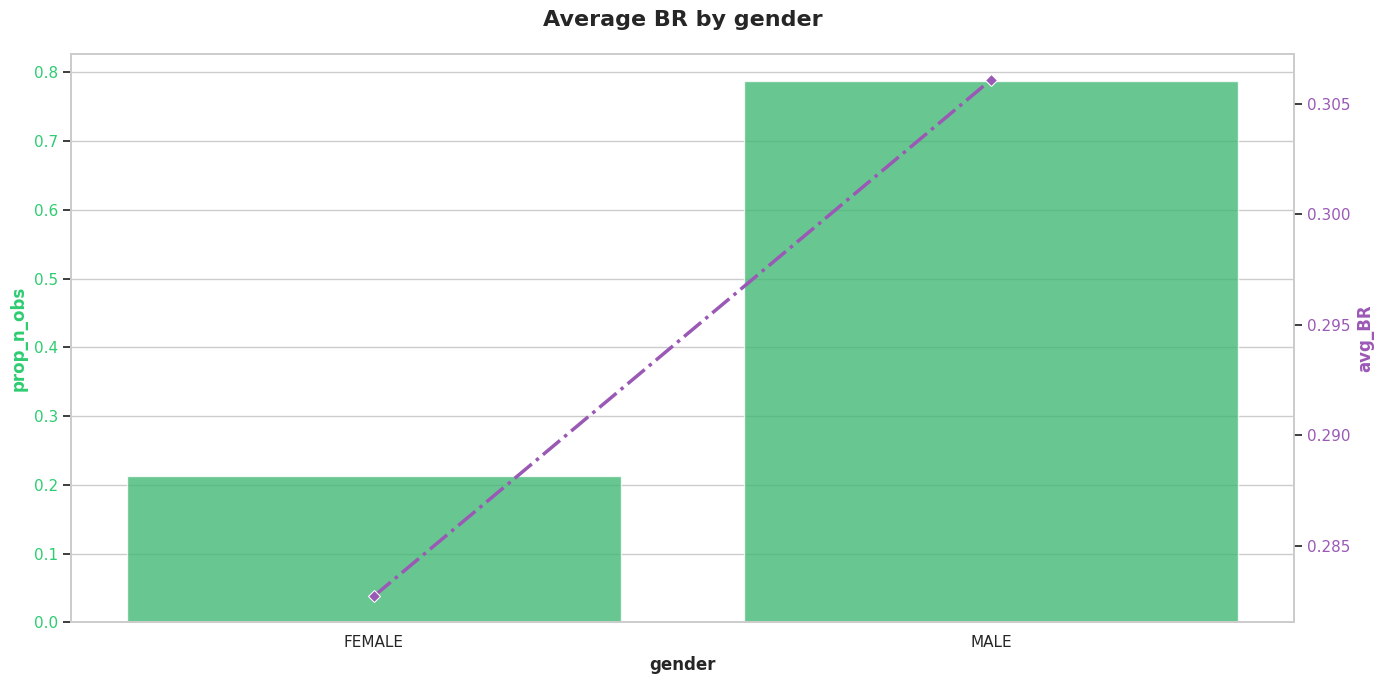

In [ ]:
plot_by_woe(df_temp)

## Numerical variables

In [ ]:
#Está es una función similar a woe_discrete, pero ahora la función es para analizar la relación entre una variable numérica y una variable objetivo binaria
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'avg_BR']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    return df

    age  n_obs    avg_BR  prop_n_obs
0    18     82  0.268293    0.003850
1    19    609  0.343186    0.028592
2    20    579  0.369603    0.027183
3    21    736  0.361413    0.034554
4    22    762  0.416010    0.035775
..  ...    ...       ...         ...
63   81      1  1.000000    0.000047
64   82      1  0.000000    0.000047
65   83      2  0.500000    0.000094
66   84      1  0.000000    0.000047
67   90      2  1.000000    0.000094

[68 rows x 4 columns]


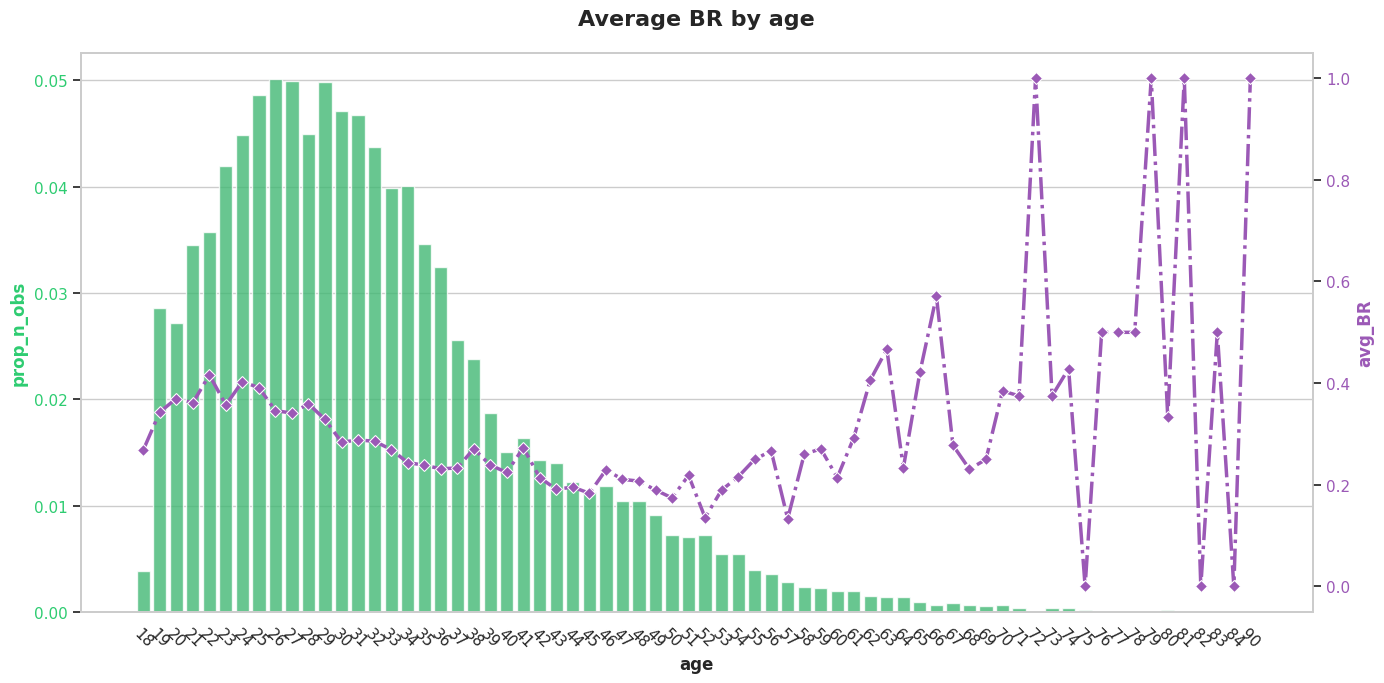

In [ ]:
#Creamos una tabla (df) que contenga de la variable age, el número de observaciones, porcentaje de clientes malos y proporción de observaciones
df_temp_A = woe_ordered_continuous(df_features, 'age', df_scores)
print(df_temp_A)
#con esta función representamos graficamente, e indicamos una rotación de -45° a las etiquetas
plot_by_woe(df_temp_A, rotation_of_x_axis_labels=-45)

In [ ]:
df_temp_A.to_excel(writer, sheet_name='df_temp_A', index=False)

In [ ]:
#SUM(transactions31to60days_clabeInc.amount)
#Los resultados anteriores no nos permiten desarrollar un análisis relevante, por ello, usaremos herramientas que nos permitan un mejor enfoque
#Creamos la columna age_factor en el df en la que aplicamos la función qcut en la columna age para generar 10 cuantiles (deciles),
#eliminamos los duplicados para tener intervalos sin límites inferior y superior iguales, con presición a 3 decimales en los límites de los bins
df_features['age_factor'] = pd.qcut(df_features['age'], q=10, duplicates='drop', precision=3)
df_features.loc[:,['age','age_factor']] #Mostramos las columnas age y age_factor

age      age_factor
0       26    (24.0, 26.0]
1       29    (28.0, 30.0]
2       21  (17.999, 22.0]
3       25    (24.0, 26.0]
4       35    (33.0, 35.0]
...    ...             ...
21295   28    (26.0, 28.0]
21296   44    (39.0, 46.0]
21297   20  (17.999, 22.0]
21298   28    (26.0, 28.0]
21299   35    (33.0, 35.0]

[21300 rows x 2 columns]

In [ ]:
df_features['age_factor'].to_excel(writer, sheet_name='age_factor', index=True)

In [ ]:
#Ahora agrupamos y se realiza el conteo, notamos que los datos tienden a estar distribuidos de manera uniforme entre los cuantiles
df_features.groupby(['age_factor'])['age'].count()

/tmp/ipython-input-1327536318.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_features.groupby(['age_factor'])['age'].count()


age_factor
(17.999, 22.0]    2768
(22.0, 24.0]      1848
(24.0, 26.0]      2103
(26.0, 28.0]      2022
(28.0, 30.0]      2066
(30.0, 33.0]      2777
(33.0, 35.0]      1591
(35.0, 39.0]      2140
(39.0, 46.0]      2025
(46.0, 90.0]      1960
Name: age, dtype: int64

In [ ]:
df_age_factor=df_features.groupby(['age_factor'])['age'].count()

/tmp/ipython-input-3911561952.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_factor=df_features.groupby(['age_factor'])['age'].count()


In [ ]:
df_age_factor.to_excel(writer, sheet_name='df_age_factor', index=True)

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


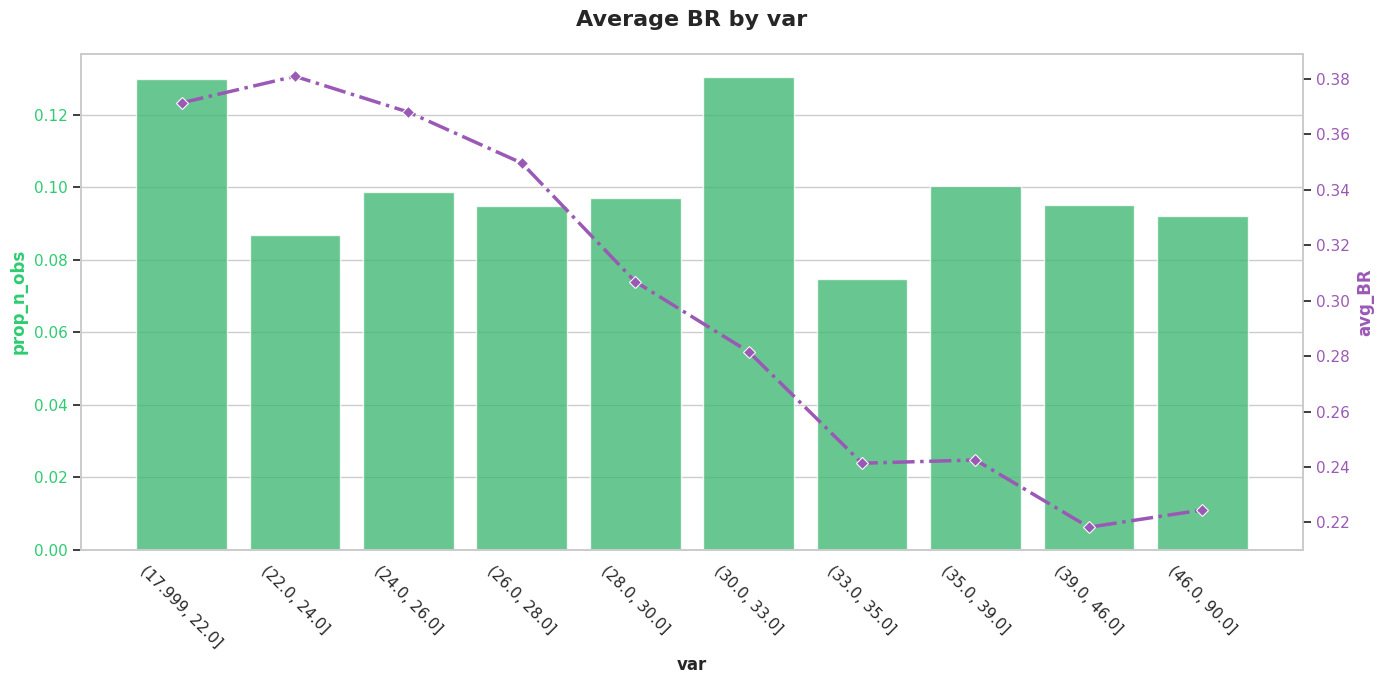

In [ ]:
df_tempn = woe_ordered_continuous(df_features, 'age_factor', df_scores) #aplicamos la función woe_ordered_continuous para la columna age_factor
df_tempn.columns = ['var', 'n_obs', 'avg_BR','prop_n_obs'] #renombramos las columnas resultantes
df_tempn
plot_by_woe(df_tempn, rotation_of_x_axis_labels=-45) #representamos graficamente

In [ ]:
df_tempn

var  n_obs    avg_BR  prop_n_obs
0  (17.999, 22.0]   2768  0.371387    0.129953
1    (22.0, 24.0]   1848  0.380952    0.086761
2    (24.0, 26.0]   2103  0.368046    0.098732
3    (26.0, 28.0]   2022  0.349654    0.094930
4    (28.0, 30.0]   2066  0.306873    0.096995
5    (30.0, 33.0]   2777  0.281599    0.130376
6    (33.0, 35.0]   1591  0.241358    0.074695
7    (35.0, 39.0]   2140  0.242523    0.100469
8    (39.0, 46.0]   2025  0.218272    0.095070
9    (46.0, 90.0]   1960  0.224490    0.092019

In [ ]:
df_features.columns

Index(['user_id', 'gender', 'state_group', 'age', 'output',
       'COUNT(transactions1to30days_purchase)',
       'SUM(transactions1to30days_purchase.amount)',
       'MEAN(transactions1to30days_purchase.amount)',
       'COUNT(transactions31to60days_purchase)',
       'SUM(transactions31to60days_purchase.amount)',
       'MEAN(transactions31to60days_purchase.amount)',
       'COUNT(transactions1to30days_clabeInc)',
       'SUM(transactions1to30days_clabeInc.amount)',
       'MEAN(transactions1to30days_clabeInc.amount)',
       'COUNT(transactions31to60days_clabeInc)',
       'SUM(transactions31to60days_clabeInc.amount)',
       'MEAN(transactions31to60days_clabeInc.amount)',
       'COUNT(transactions1to30days_clabeOut)',
       'SUM(transactions1to30days_clabeOut.amount)',
       'MEAN(transactions1to30days_clabeOut.amount)',
       'COUNT(transactions31to60days_clabeOut)',
       'SUM(transactions31to60days_clabeOut.amount)',
       'MEAN(transactions31to60days_clabeOut.amount)',
 

In [ ]:
#creamos un DF con todas las filas de las variables numéricas especificadas
df_features_num=df_features.loc[:,['age',
                                   'SUM(transactions31to60days_clabeInc.amount)',
                                   'MEAN(balance31to60days.current_balance)',
                                   'MEAN(transactions1to30days_clabeInc.amount)',
                                   'COUNT(transactions1to30days_atm)',
                                   'MEAN(transactions1to30days_atm.amount)',
                                   'COUNT(transactions31to60days_atm)',
                                   'SUM(transactions1to30days_purchase.amount)',
                                   'MEAN(transactions31to60days_purchase.amount)',
                                   'MEAN(transactions1to30days_purchase.amount)',
                                   'COUNT(transactions31to60days_purchase)',
                                   'COUNT(transactions1to30days_clabeOut)',
                                   'COUNT(transactions31to60days_clabeOut)',
                                   'MEAN(transactions31to60days_clabeOut.amount)',
                                   'ratioBalanceClabeIn_1to30days',
                                   'ratioCableInOut_1to30days',
                                   'ratioBalanceClabeIn_31to60days']]
num_vars=df_features_num.columns #creamos una lista de las columnas del DF
print(num_vars)

Index(['age', 'SUM(transactions31to60days_clabeInc.amount)',
       'MEAN(balance31to60days.current_balance)',
       'MEAN(transactions1to30days_clabeInc.amount)',
       'COUNT(transactions1to30days_atm)',
       'MEAN(transactions1to30days_atm.amount)',
       'COUNT(transactions31to60days_atm)',
       'SUM(transactions1to30days_purchase.amount)',
       'MEAN(transactions31to60days_purchase.amount)',
       'MEAN(transactions1to30days_purchase.amount)',
       'COUNT(transactions31to60days_purchase)',
       'COUNT(transactions1to30days_clabeOut)',
       'COUNT(transactions31to60days_clabeOut)',
       'MEAN(transactions31to60days_clabeOut.amount)',
       'ratioBalanceClabeIn_1to30days', 'ratioCableInOut_1to30days',
       'ratioBalanceClabeIn_31to60days'],
      dtype='object')


In [ ]:
df_features_num.head()

age  SUM(transactions31to60days_clabeInc.amount)  \
0   26                                          0.0   
1   29                                       3743.0   
2   21                                          0.0   
3   25                                          0.0   
4   35                                          0.0   

   MEAN(balance31to60days.current_balance)  \
0                                     0.00   
1                                     6.25   
2                                     0.00   
3                                     0.67   
4                                     0.00   

   MEAN(transactions1to30days_clabeInc.amount)  \
0                                    67.253333   
1                                   384.750000   
2                                     0.000000   
3                                   256.250000   
4                                   117.445714   

   COUNT(transactions1to30days_atm)  MEAN(transactions1to30days_atm.amount)  \
0                                 0                                     0.0   
1                                 0                                     0.0   
2                                 0                                     0.0   
3                                 0                                     0.0   
4                                 0                                     0.0   

   COUNT(transactions31to60days_atm)  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   SUM(transactions1to30days_purchase.amount)  \
0                                       82.00   
1                                      839.00   
2                                        0.00   
3                                      466.00   
4                                      852.28   

   MEAN(transactions31to60days_purchase.amount)  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   MEAN(transactions1to30days_purchase.amount)  \
0                                    27.333333   
1                                   839.000000   
2                                     0.000000   
3                                   155.333333   
4                                   170.456000   

   COUNT(transactions31to60days_purchase)  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   COUNT(transactions1to30days_clabeOut)  \
0                                      5   
1                                      2   
2                                      0   
3                                      2   
4                                      7   

   COUNT(transactions31to60days_clabeOut)  \
0                                       0   
1                                       6   
2                                       0   
3                                       0   
4                                       0   

   MEAN(transactions31to60days_clabeOut.amount)  \
0                                           0.0   
1                                         628.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   ratioBalanceClabeIn_1to30days  ratioCableInOut_1to30days  \
0                       0.047840                   0.833333   
1                       0.038940                   0.500000   
2                       0.000000                   0.000000   
3                       0.033302                   0.500000   
4                       0.042039              

In [ ]:
#Mediante un for aplicamos la función qcut a 10 cuantiles para todas las variables de num_vars y se almacenarán las salidas en un nuevo DF llamado df_features_num_factors
df_features_num_factors=pd.DataFrame() #creamos un DF vacío donde guardaremos los resultados del for
for var in num_vars:
  df_features_num_factors[var] = pd.qcut(df_features[var], q=10,duplicates='drop')
  print(var)
  #df_features_num_factors[var] = pd.cut(df_features[var], 10)

age
SUM(transactions31to60days_clabeInc.amount)
MEAN(balance31to60days.current_balance)
MEAN(transactions1to30days_clabeInc.amount)
COUNT(transactions1to30days_atm)
MEAN(transactions1to30days_atm.amount)
COUNT(transactions31to60days_atm)
SUM(transactions1to30days_purchase.amount)
MEAN(transactions31to60days_purchase.amount)
MEAN(transactions1to30days_purchase.amount)
COUNT(transactions31to60days_purchase)
COUNT(transactions1to30days_clabeOut)
COUNT(transactions31to60days_clabeOut)
MEAN(transactions31to60days_clabeOut.amount)
ratioBalanceClabeIn_1to30days
ratioCableInOut_1to30days
ratioBalanceClabeIn_31to60days


In [ ]:
df_features_num_factors.head()

age SUM(transactions31to60days_clabeInc.amount)  \
0    (24.0, 26.0]                             (-0.001, 200.0]   
1    (28.0, 30.0]                            (3375.0, 7014.5]   
2  (17.999, 22.0]                             (-0.001, 200.0]   
3    (24.0, 26.0]                             (-0.001, 200.0]   
4    (33.0, 35.0]                             (-0.001, 200.0]   

  MEAN(balance31to60days.current_balance)  \
0                        (-4798.707, 0.0]   
1                            (0.0, 8.337]   
2                        (-4798.707, 0.0]   
3                            (0.0, 8.337]   
4                        (-4798.707, 0.0]   

  MEAN(transactions1to30days_clabeInc.amount)  \
0                             (20.0, 131.568]   
1                          (357.943, 503.394]   
2                              (-0.001, 20.0]   
3                            (240.0, 357.943]   
4                             (20.0, 131.568]   

  COUNT(transactions1to30days_atm) MEAN(transactions1to30days_atm.amount)  \
0                    (-0.001, 1.0]                       (-0.001, 230.74]   
1                    (-0.001, 1.0]                       (-0.001, 230.74]   
2                    (-0.001, 1.0]                       (-0.001, 230.74]   
3                    (-0.001, 1.0]                       (-0.001, 230.74]   
4                    (-0.001, 1.0]                       (-0.001, 230.74]   

  COUNT(transactions31to60days_atm)  \
0                     (-0.001, 1.0]   
1                     (-0.001, 1.0]   
2                     (-0.001, 1.0]   
3                     (-0.001, 1.0]   
4                     (-0.001, 1.0]   

  SUM(transactions1to30days_purchase.amount)  \
0                            (74.94, 208.96]   
1                          (750.0, 1226.515]   
2                            (-0.001, 74.94]   
3                            (424.92, 750.0]   
4                          (750.0, 1226.515]   

  MEAN(transactions31to60days_purchase.amount)  \
0                               (-0.001, 35.0]   
1                               (-0.001, 35.0]   
2                               (-0.001, 35.0]   
3                               (-0.001, 35.0]   
4                               (-0.001, 35.0]   

  MEAN(transactions1to30days_purchase.amount)  \
0                            (-0.001, 35.097]   
1                         (395.351, 17874.26]   
2                            (-0.001, 35.097]   
3                          (120.945, 171.001]   
4                          (120.945, 171.001]   

  COUNT(transactions31to60days_purchase)  \
0                          (-0.001, 1.0]   
1                          (-0.001, 1.0]   
2                          (-0.001, 1.0]   
3                          (-0.001, 1.0]   
4                          (-0.001, 1.0]   

  COUNT(transactions1to30days_clabeOut)  \
0                            (4.0, 6.0]   
1                            (1.0, 2.0]   
2                         (-0.001, 1.0]   
3                            (1.0, 2.0]   
4                           (6.0, 10.0]   

  COUNT(transactions31to60days_clabeOut)  \
0                          (-0.001, 1.0]   
1                             (3.0, 6.0]   
2                          (-0.001, 1.0]   
3                          (-0.001, 1.0]   
4                          (-0.001, 1.0]   

  MEAN(transactions31to60days_clabeOut.amount) ratioBalanceClabeIn_1to30days  \
0                              (-0.001, 8.902]              (0.0436, 0.0595]   
1                           (400.114, 805.505]              (0.0272, 0.0436]   
2                              (-0.001, 8.902]                (-10.081, 0.0]   
3                              (-0.001, 8.902]              (0.0272, 0.0436]   
4                              (-0.001, 8.902]              (0.0272, 0.0436]   

  ratioCableInOut_1to30days ratioBalanceClabeIn_31to60days  
0              (0.6, 0.833]      (-9.597999999999999, 0.0]  
1                (0.4, 0.6]                  (0.0, 0.0208]  
2           (-0.001, 

In [ ]:
df_features_num_factors.shape #Observamos la dimensiones del DF

(21300, 17)

In [ ]:
df_features_num_factors

age SUM(transactions31to60days_clabeInc.amount)  \
0        (24.0, 26.0]                             (-0.001, 200.0]   
1        (28.0, 30.0]                            (3375.0, 7014.5]   
2      (17.999, 22.0]                             (-0.001, 200.0]   
3        (24.0, 26.0]                             (-0.001, 200.0]   
4        (33.0, 35.0]                             (-0.001, 200.0]   
...               ...                                         ...   
21295    (26.0, 28.0]                            (1850.0, 3375.0]   
21296    (39.0, 46.0]                          (1090.988, 1850.0]   
21297  (17.999, 22.0]                             (-0.001, 200.0]   
21298    (26.0, 28.0]                          (7014.5, 287500.0]   
21299    (33.0, 35.0]                             (-0.001, 200.0]   

      MEAN(balance31to60days.current_balance)  \
0                            (-4798.707, 0.0]   
1                                (0.0, 8.337]   
2                            (-4798.707, 0.0]   
3                                (0.0, 8.337]   
4                            (-4798.707, 0.0]   
...                                       ...   
21295                      (314.288, 726.188]   
21296                        (27.778, 53.139]   
21297                            (0.0, 8.337]   
21298                      (314.288, 726.188]   
21299                         (8.337, 27.778]   

      MEAN(transactions1to30days_clabeInc.amount)  \
0                                 (20.0, 131.568]   
1                              (357.943, 503.394]   
2                                  (-0.001, 20.0]   
3                                (240.0, 357.943]   
4                                 (20.0, 131.568]   
...                                           ...   
21295                              (-0.001, 20.0]   
21296                           (1020.56, 1700.0]   
21297                           (1700.0, 77000.0]   
21298                           (1020.56, 1700.0]   
21299                            (240.0, 357.943]   

      COUNT(transactions1to30days_atm) MEAN(transactions1to30days_atm.amount)  \
0                        (-0.001, 1.0]                       (-0.001, 230.74]   
1                        (-0.001, 1.0]                       (-0.001, 230.74]   
2                        (-0.001, 1.0]                       (-0.001, 230.74]   
3                        (-0.001, 1.0]                       (-0.001, 230.74]   
4                        (-0.001, 1.0]                       (-0.001, 230.74]   
...                                ...                                    ...   
21295                    (-0.001, 1.0]                       (-0.001, 230.74]   
21296                    (-0.001, 1.0]                       (-0.001, 230.74]   
21297                    (-0.001, 1.0]                       (-0.001, 230.74]   
21298                    (-0.001, 1.0]                     (832.826, 8046.28]   
21299                    (-0.001, 1.0]                      (230.74, 832.826]   

      COUNT(transactions31to60days_atm)  \
0                         (-0.001, 1.0]   
1                         (-0.001, 1.0]   
2                         (-0.001, 1.0]   
3                         (-0.001, 1.0]   
4                         (-0.001, 1.0]   
...                                 ...   
21295                     (-0.001, 1.0]   
21296                     (-0.001, 1.0]   
21297                     (-0.001, 1.0]   
21298                       (1.0, 23.0]   
21299                     (-0.001, 1.0]   

      SUM(transactions1to30days_purchase.amount)  \
0                                (74.94, 208.96]   
1                              (750.0, 1226.515]   
2                                (-0.001, 74.94]   
3                                (424.92, 750.0]   
4                              (750.0, 1226.515]   
...                                          ...   
21295                            (-0.001, 74.94]   
21296                      (3994.871, 107223.76]   
21297

In [ ]:
df_features_num_factors.to_excel(writer, sheet_name='df_features_num_factors', index=True)

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


              age  n_obs    avg_BR  prop_n_obs
0  (17.999, 22.0]   2768  0.371387    0.129953
1    (22.0, 24.0]   1848  0.380952    0.086761
2    (24.0, 26.0]   2103  0.368046    0.098732
3    (26.0, 28.0]   2022  0.349654    0.094930
4    (28.0, 30.0]   2066  0.306873    0.096995
5    (30.0, 33.0]   2777  0.281599    0.130376
6    (33.0, 35.0]   1591  0.241358    0.074695
7    (35.0, 39.0]   2140  0.242523    0.100469
8    (39.0, 46.0]   2025  0.218272    0.095070
9    (46.0, 90.0]   1960  0.224490    0.092019


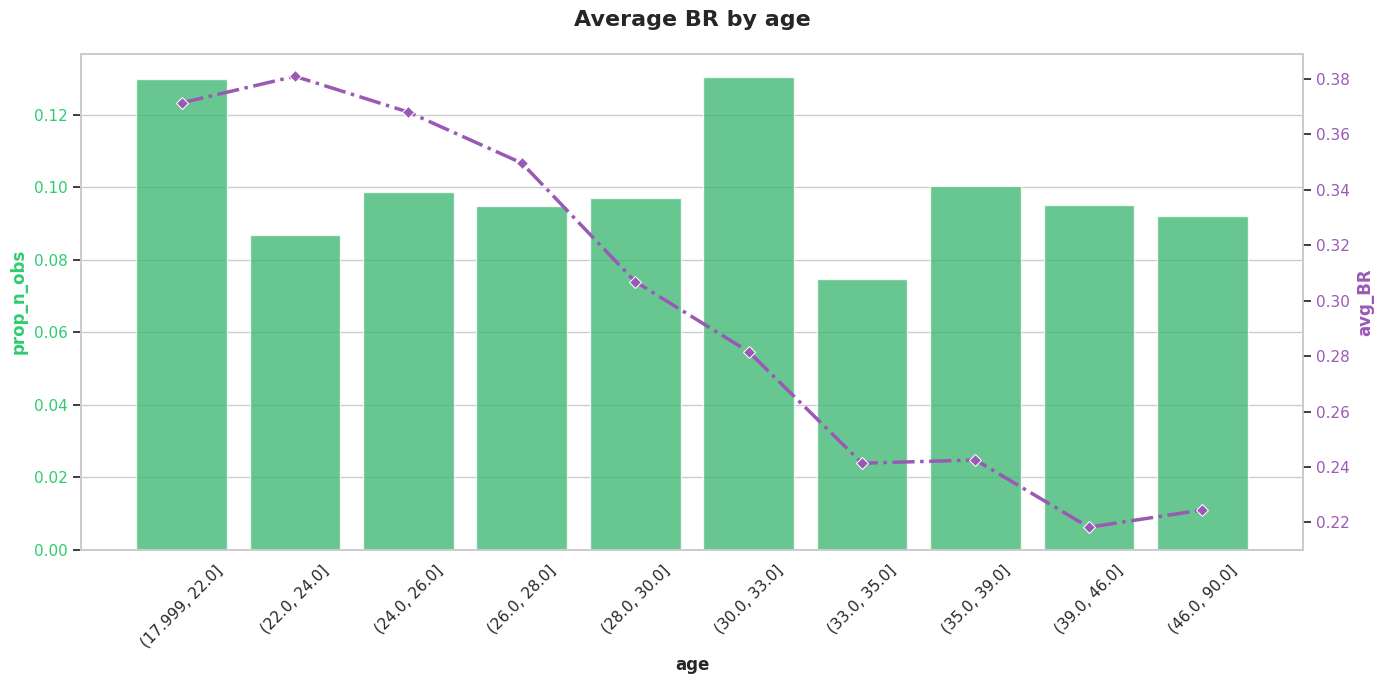

In [ ]:
df_tempn = woe_ordered_continuous(df_features_num_factors, 'age', df_scores)
print(df_tempn)
plot_by_woe(df_tempn, rotation_of_x_axis_labels=45)

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


  MEAN(balance31to60days.current_balance)  n_obs    avg_BR  prop_n_obs
0                        (-4798.707, 0.0]   4713  0.295141    0.221268
1                            (0.0, 8.337]   1677  0.435301    0.078732
2                         (8.337, 27.778]   2133  0.372714    0.100141
3                        (27.778, 53.139]   2127  0.304184    0.099859
4                        (53.139, 98.202]   2130  0.331455    0.100000
5                       (98.202, 172.385]   2130  0.278404    0.100000
6                      (172.385, 314.288]   2130  0.263380    0.100000
7                      (314.288, 726.188]   2130  0.259155    0.100000
8                    (726.188, 74929.397]   2130  0.206103    0.100000


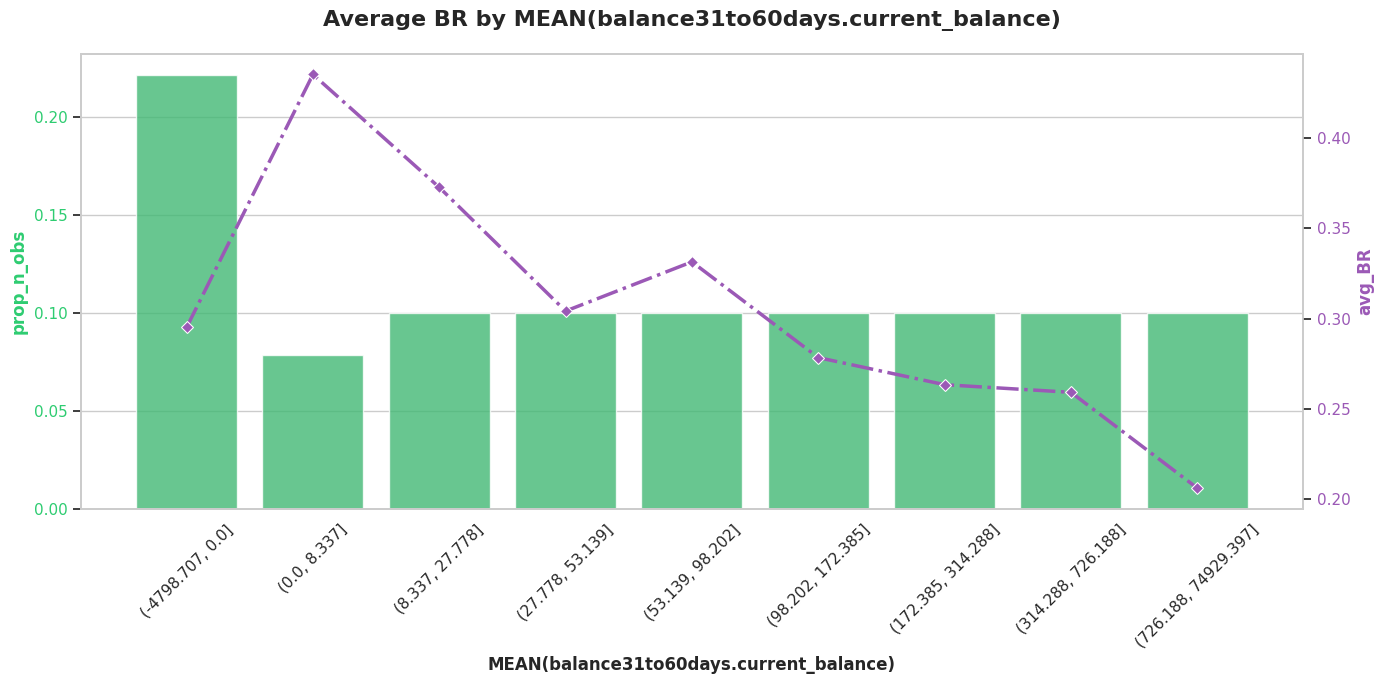

In [ ]:
df_tempn = woe_ordered_continuous(df_features_num_factors, 'MEAN(balance31to60days.current_balance)', df_scores)
print(df_tempn)
plot_by_woe(df_tempn, rotation_of_x_axis_labels=45)

In [ ]:
#Creamos la función tabla_plot en la cual para una variable deseada (var) del DF deseado (df1) llama a la función woe_ordered_continuous y almacena el resultado en el DF df_tempn y realiza la representación gráfica
def tabla_plot(df1,var,df2): #df2 es el DF que contiene la variable objetivo
  df_tempn = woe_ordered_continuous(df1, var, df2)
  print("Value Analysis for: "+var) #Imprime el encabezado que señala qué variable se analizará
  print("")
  print(df_tempn.to_markdown()) #Imprime el df_tempn en formato markdown
  print("")
  if writer is not None:
        safe_name = re.sub(r'[\\/*?:\[\]]', '', var)[:31]
        df_tempn.to_excel(writer, sheet_name=safe_name, index=False)

  df_tempn.to_excel(writer, sheet_name=safe_name, index=False) #Exporta el df_tempn a Excel con el nombre de la variable
  plot_by_woe(df_tempn, rotation_of_x_axis_labels=45)
  #Imprime la representación gráfica, e indica una rotación de 45° para la etiqueta de las x

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


Value Analysis for: age

|    | age            |   n_obs |   avg_BR |   prop_n_obs |
|---:|:---------------|--------:|---------:|-------------:|
|  0 | (17.999, 22.0] |    2768 | 0.371387 |    0.129953  |
|  1 | (22.0, 24.0]   |    1848 | 0.380952 |    0.0867606 |
|  2 | (24.0, 26.0]   |    2103 | 0.368046 |    0.0987324 |
|  3 | (26.0, 28.0]   |    2022 | 0.349654 |    0.0949296 |
|  4 | (28.0, 30.0]   |    2066 | 0.306873 |    0.0969953 |
|  5 | (30.0, 33.0]   |    2777 | 0.281599 |    0.130376  |
|  6 | (33.0, 35.0]   |    1591 | 0.241358 |    0.0746948 |
|  7 | (35.0, 39.0]   |    2140 | 0.242523 |    0.100469  |
|  8 | (39.0, 46.0]   |    2025 | 0.218272 |    0.0950704 |
|  9 | (46.0, 90.0]   |    1960 | 0.22449  |    0.0920188 |



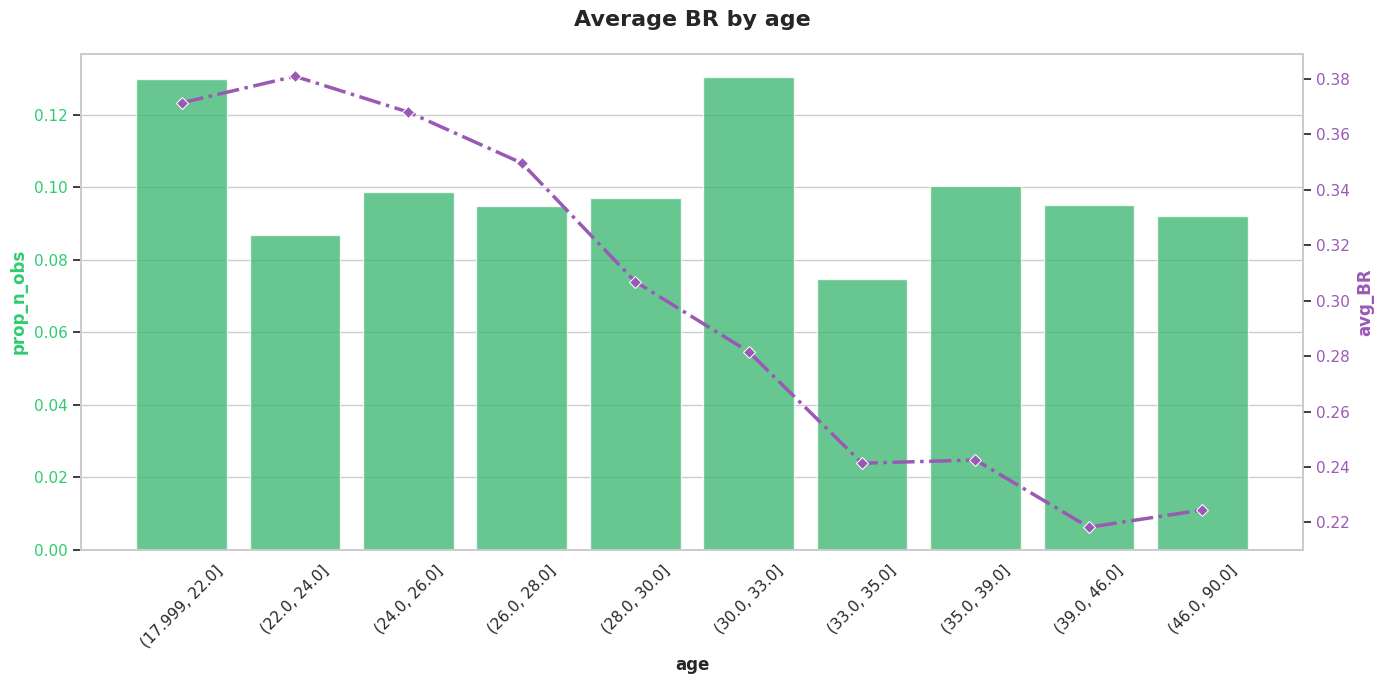

In [ ]:
#Con el uso de la función tabla_plot y del DF df_features_num_factor hemos automatizado el proceso para analizar la relación entre una variable numérica (aprupada) y una variable objetivo binaria
tabla_plot(df_features_num_factors,'age',df_scores)



Value Analysis for: age

|    | age            |   n_obs |   avg_BR |   prop_n_obs |
|---:|:---------------|--------:|---------:|-------------:|
|  0 | (17.999, 22.0] |    2768 | 0.371387 |    0.129953  |
|  1 | (22.0, 24.0]   |    1848 | 0.380952 |    0.0867606 |
|  2 | (24.0, 26.0]   |    2103 | 0.368046 |    0.0987324 |
|  3 | (26.0, 28.0]   |    2022 | 0.349654 |    0.0949296 |
|  4 | (28.0, 30.0]   |    2066 | 0.306873 |    0.0969953 |
|  5 | (30.0, 33.0]   |    2777 | 0.281599 |    0.130376  |
|  6 | (33.0, 35.0]   |    1591 | 0.241358 |    0.0746948 |
|  7 | (35.0, 39.0]   |    2140 | 0.242523 |    0.100469  |
|  8 | (39.0, 46.0]   |    2025 | 0.218272 |    0.0950704 |
|  9 | (46.0, 90.0]   |    1960 | 0.22449  |    0.0920188 |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


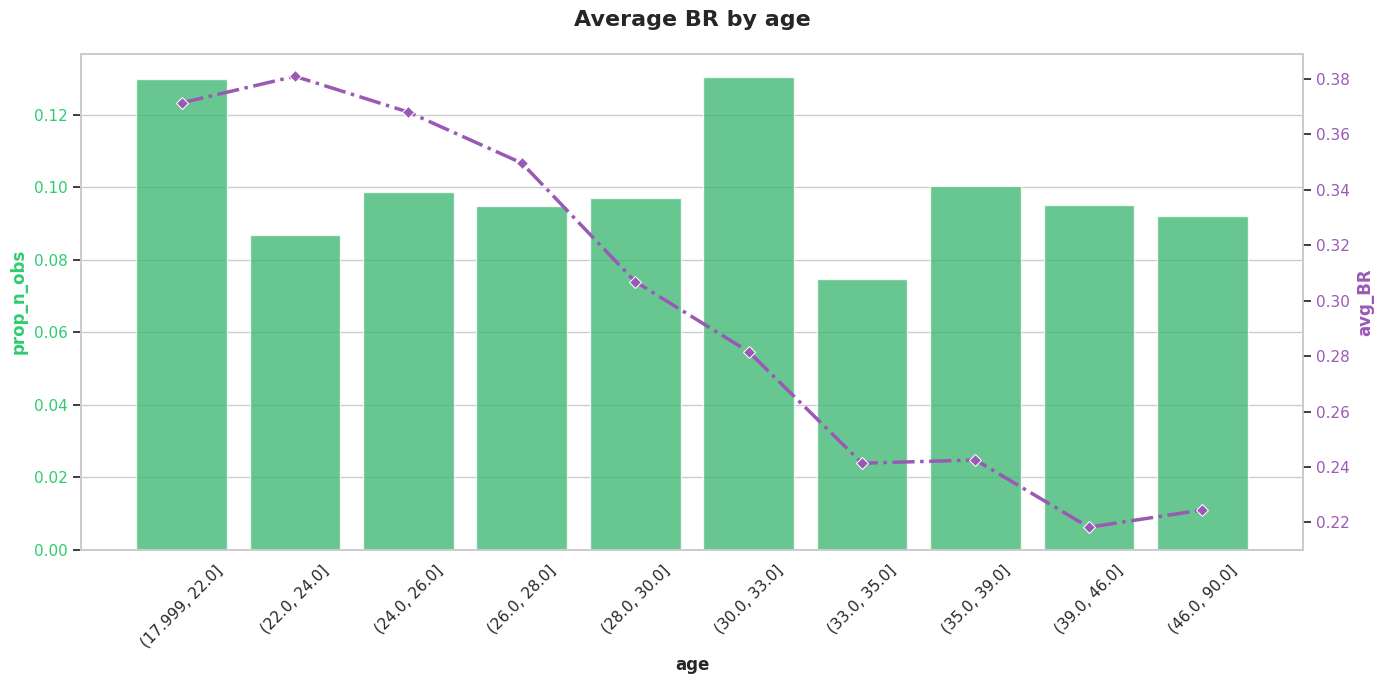

---------------------------------------------------------------------------------------------------



Value Analysis for: SUM(transactions31to60days_clabeInc.amount)

|    | SUM(transactions31to60days_clabeInc.amount)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:----------------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 200.0]                               |    8680 | 0.304724 |    0.407512  |
|  1 | (200.0, 600.0]                                |    2002 | 0.277722 |    0.0939906 |
|  2 | (600.0, 1090.988]                             |    2098 | 0.262154 |    0.0984977 |
|  3 | (1090.988, 1850.0]                            |    2137 | 0.301825 |    0.100329  |
|  4 | (1850.0, 3375.0]                              |    2124 | 0.322976 |    0.0997183 |
|  5 | (3375.0, 7014.5]                              |    2129 | 0.324096 |    0.0999531 |
|  6 | (7014.5, 287500.0]                            |    2130 | 0.301408 |    0.1       |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


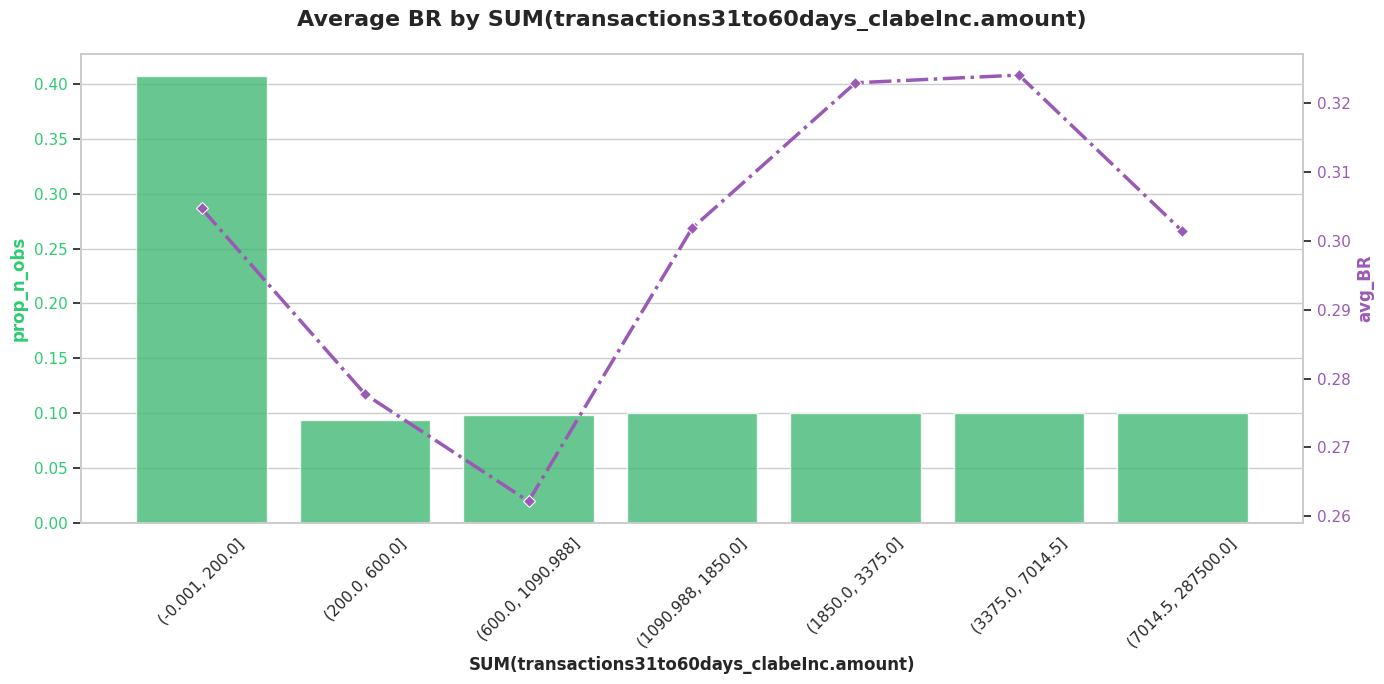

---------------------------------------------------------------------------------------------------



Value Analysis for: MEAN(balance31to60days.current_balance)

|    | MEAN(balance31to60days.current_balance)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:------------------------------------------|--------:|---------:|-------------:|
|  0 | (-4798.707, 0.0]                          |    4713 | 0.295141 |    0.221268  |
|  1 | (0.0, 8.337]                              |    1677 | 0.435301 |    0.0787324 |
|  2 | (8.337, 27.778]                           |    2133 | 0.372714 |    0.100141  |
|  3 | (27.778, 53.139]                          |    2127 | 0.304184 |    0.0998592 |
|  4 | (53.139, 98.202]                          |    2130 | 0.331455 |    0.1       |
|  5 | (98.202, 172.385]                         |    2130 | 0.278404 |    0.1       |
|  6 | (172.385, 314.288]                        |    2130 | 0.26338  |    0.1       |
|  7 | (314.288, 726.188]                        |   

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


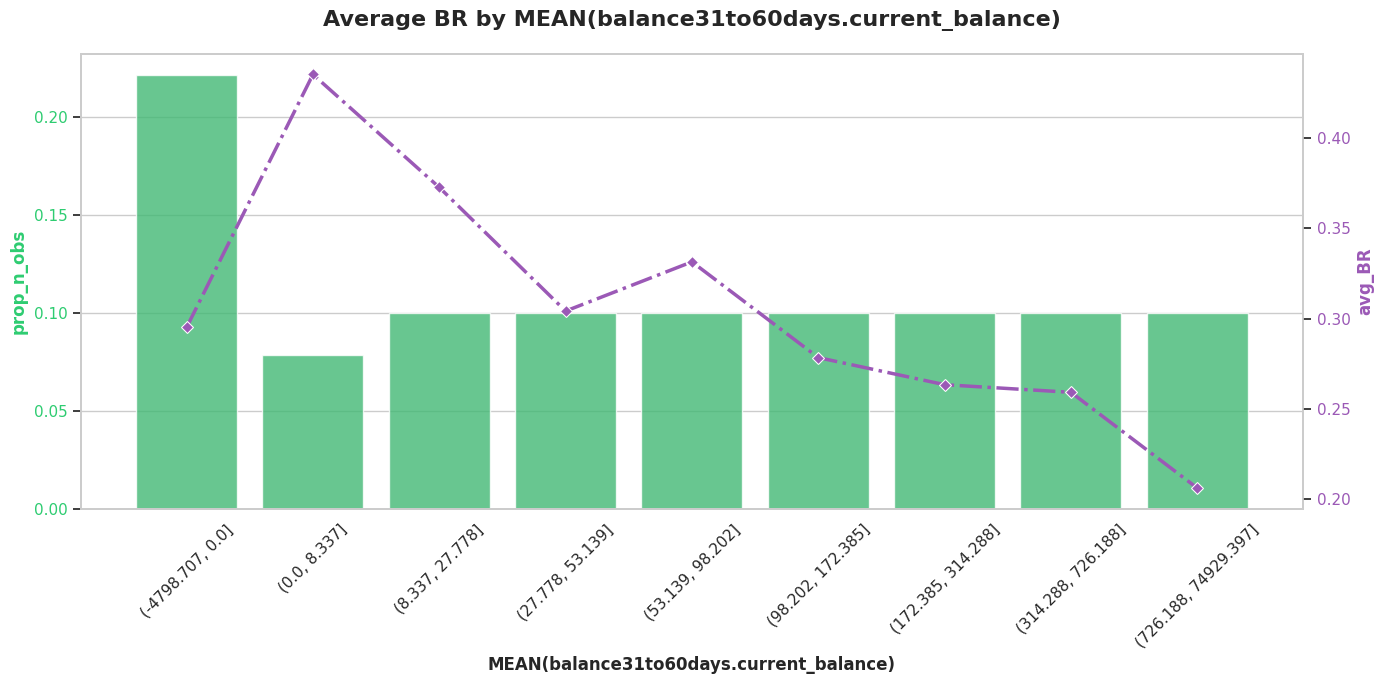

---------------------------------------------------------------------------------------------------



Value Analysis for: MEAN(transactions1to30days_clabeInc.amount)

|    | MEAN(transactions1to30days_clabeInc.amount)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:----------------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 20.0]                                |    4290 | 0.386247 |    0.201408  |
|  1 | (20.0, 131.568]                               |    2100 | 0.338095 |    0.0985915 |
|  2 | (131.568, 240.0]                              |    2133 | 0.296296 |    0.100141  |
|  3 | (240.0, 357.943]                              |    2127 | 0.267043 |    0.0998592 |
|  4 | (357.943, 503.394]                            |    2130 | 0.279812 |    0.1       |
|  5 | (503.394, 705.911]                            |    2130 | 0.278873 |    0.1       |
|  6 | (705.911, 1020.56]                            |    2130 | 0.26385  |    0.1       |
|  7 | (1020.

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


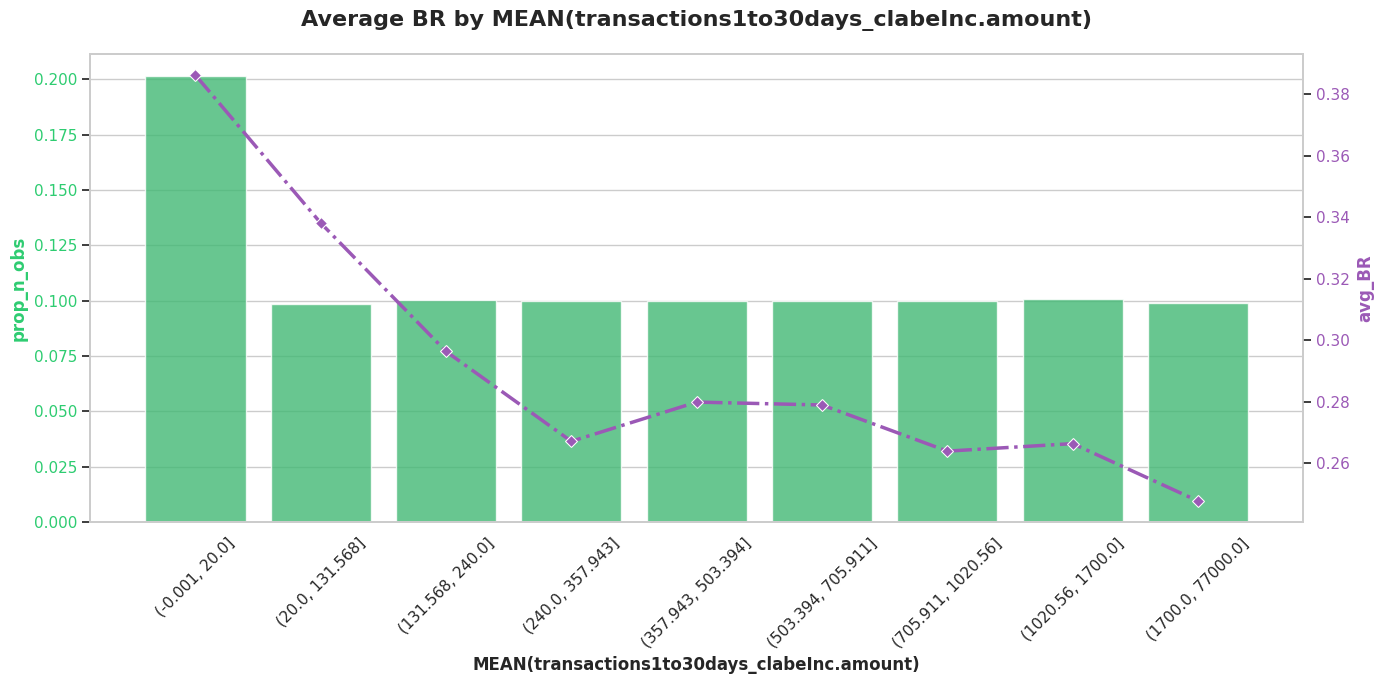

---------------------------------------------------------------------------------------------------



Value Analysis for: COUNT(transactions1to30days_atm)

|    | COUNT(transactions1to30days_atm)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:-----------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 1.0]                      |   19150 | 0.29295  |    0.899061  |
|  1 | (1.0, 2.0]                         |    1029 | 0.338192 |    0.0483099 |
|  2 | (2.0, 22.0]                        |    1121 | 0.40678  |    0.0526291 |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


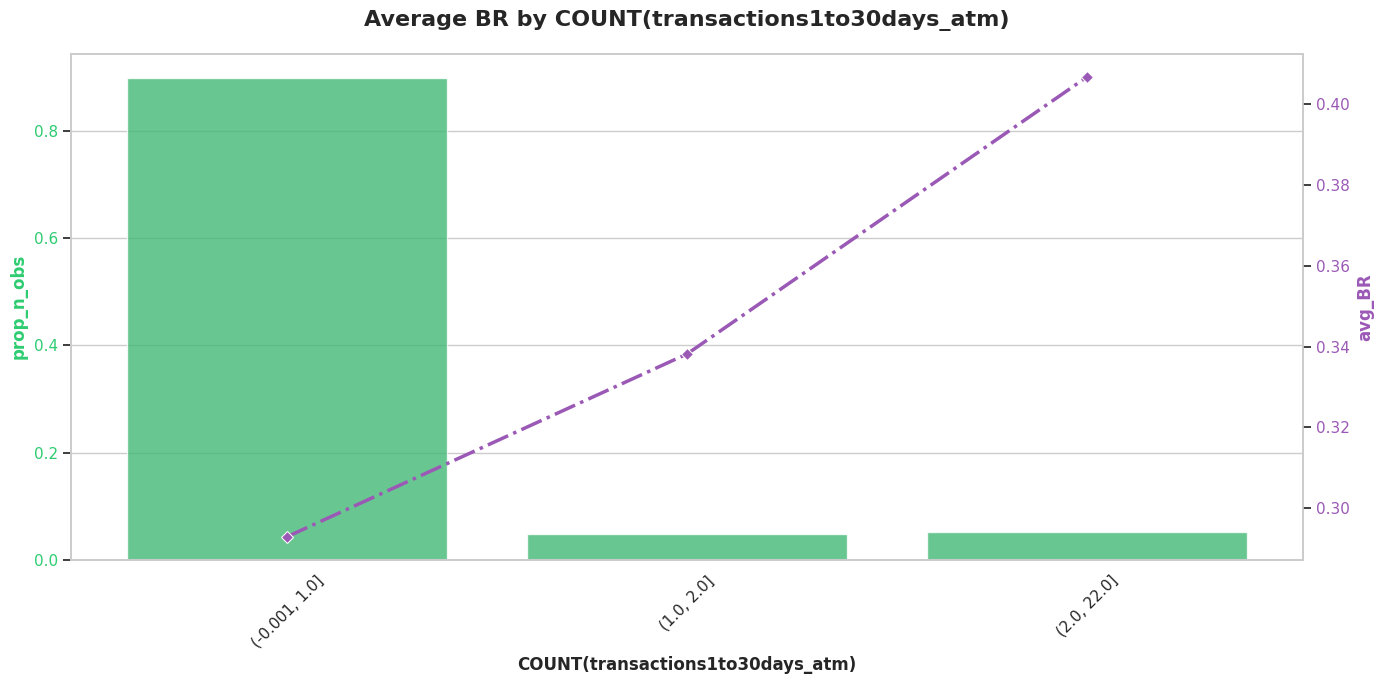

---------------------------------------------------------------------------------------------------



Value Analysis for: MEAN(transactions1to30days_atm.amount)

|    | MEAN(transactions1to30days_atm.amount)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:-----------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 230.74]                         |   17069 | 0.292109 |    0.801362  |
|  1 | (230.74, 832.826]                        |    2101 | 0.342218 |    0.0986385 |
|  2 | (832.826, 8046.28]                       |    2130 | 0.332864 |    0.1       |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


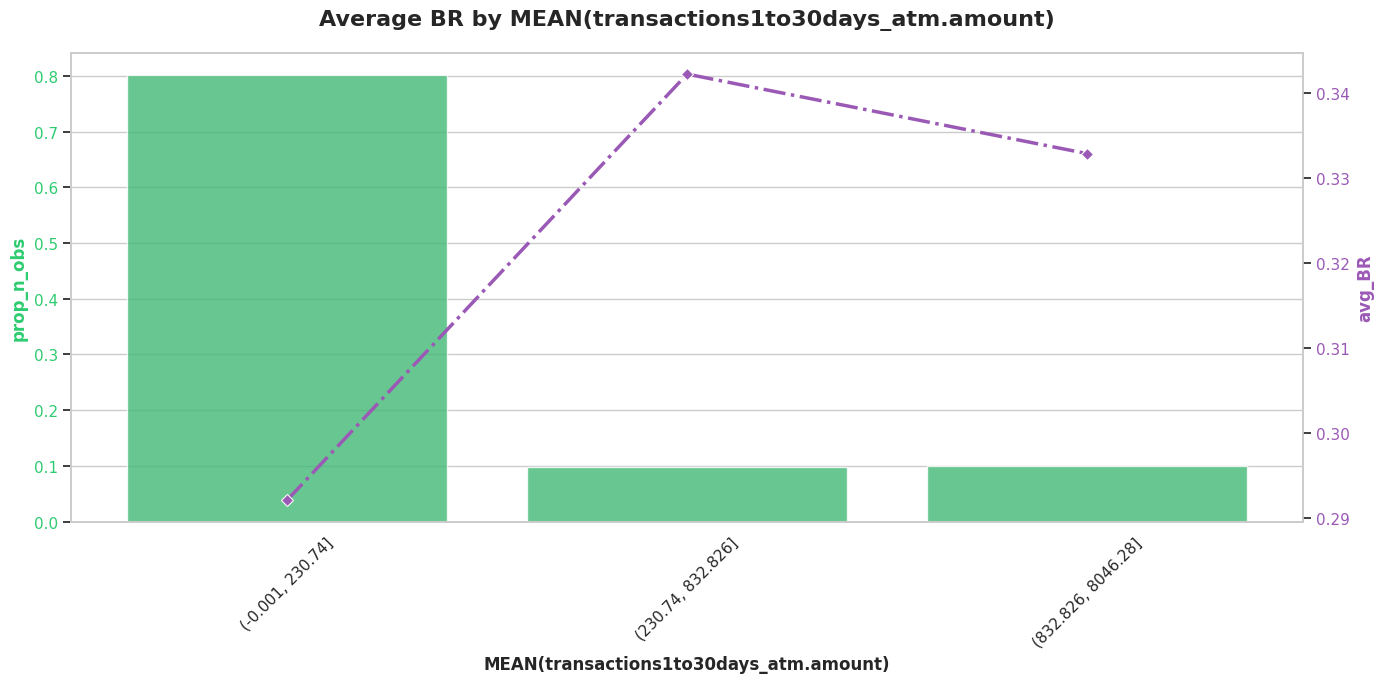

---------------------------------------------------------------------------------------------------



Value Analysis for: COUNT(transactions31to60days_atm)

|    | COUNT(transactions31to60days_atm)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 1.0]                       |   19961 | 0.29227  |    0.937136  |
|  1 | (1.0, 23.0]                         |    1339 | 0.433159 |    0.0628638 |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


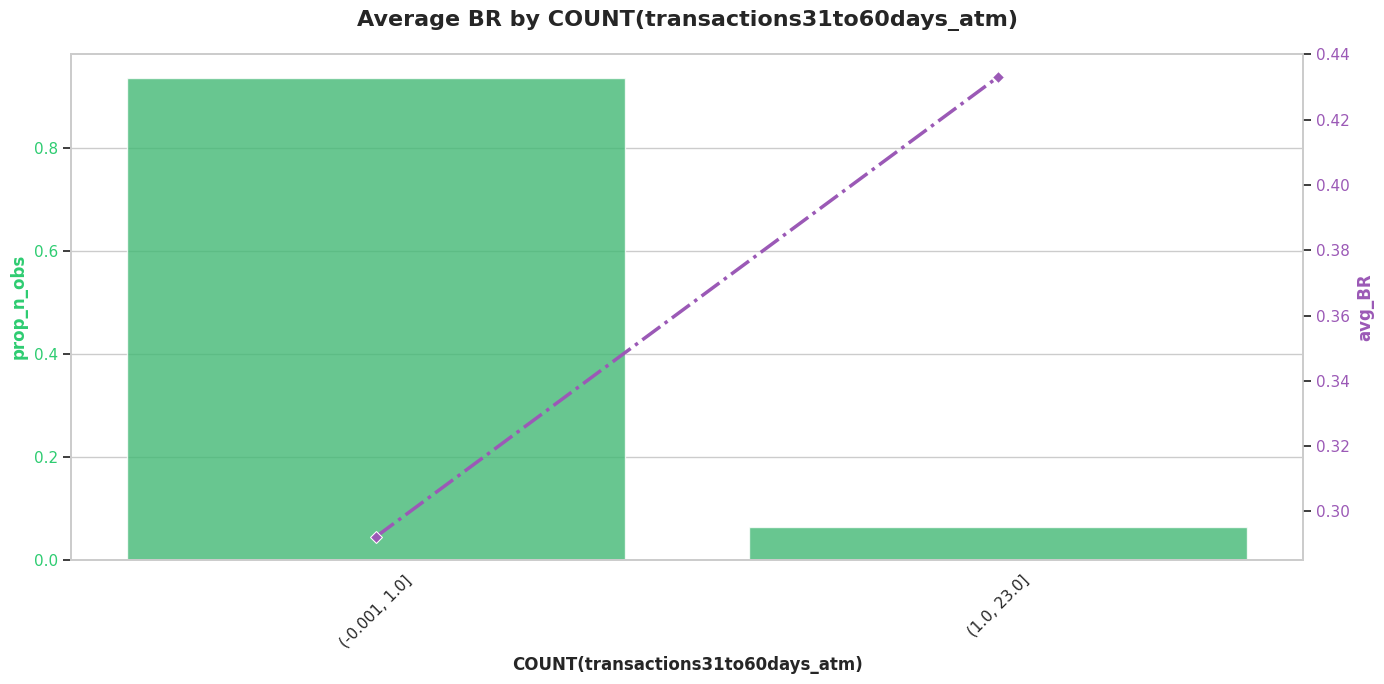

---------------------------------------------------------------------------------------------------



Value Analysis for: SUM(transactions1to30days_purchase.amount)

|    | SUM(transactions1to30days_purchase.amount)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:---------------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 74.94]                              |    6390 | 0.370736 |    0.3       |
|  1 | (74.94, 208.96]                              |    2130 | 0.334272 |    0.1       |
|  2 | (208.96, 424.92]                             |    2130 | 0.31831  |    0.1       |
|  3 | (424.92, 750.0]                              |    2133 | 0.274262 |    0.100141  |
|  4 | (750.0, 1226.515]                            |    2127 | 0.267983 |    0.0998592 |
|  5 | (1226.515, 2062.908]                         |    2130 | 0.248357 |    0.1       |
|  6 | (2062.908, 3994.871]                         |    2130 | 0.247887 |    0.1       |
|  7 | (3994.871, 10722

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


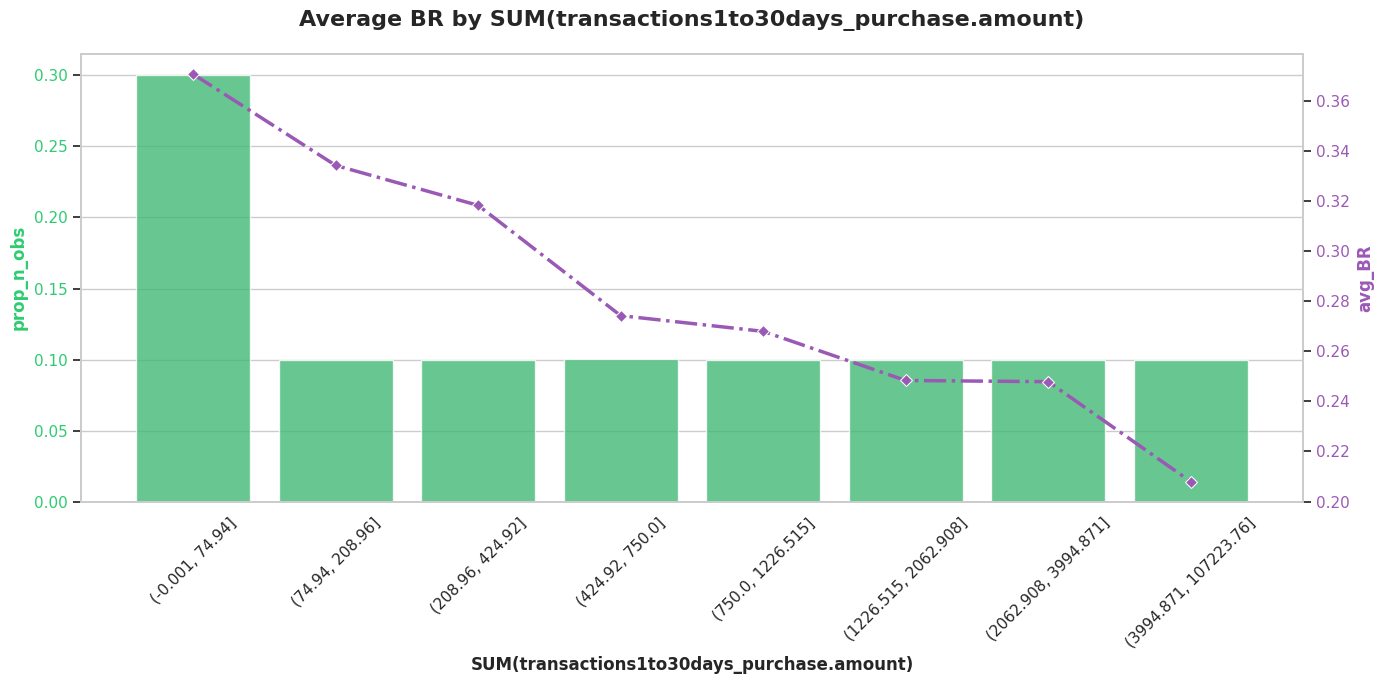

---------------------------------------------------------------------------------------------------



Value Analysis for: MEAN(transactions31to60days_purchase.amount)

|    | MEAN(transactions31to60days_purchase.amount)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:-----------------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 35.0]                                 |   10660 | 0.31576  |    0.500469  |
|  1 | (35.0, 68.137]                                 |    2120 | 0.354717 |    0.0995305 |
|  2 | (68.137, 109.083]                              |    2130 | 0.337559 |    0.1       |
|  3 | (109.083, 179.0]                               |    2142 | 0.289916 |    0.100563  |
|  4 | (179.0, 319.399]                               |    2118 | 0.238905 |    0.0994366 |
|  5 | (319.399, 39287.18]                            |    2130 | 0.211268 |    0.1       |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


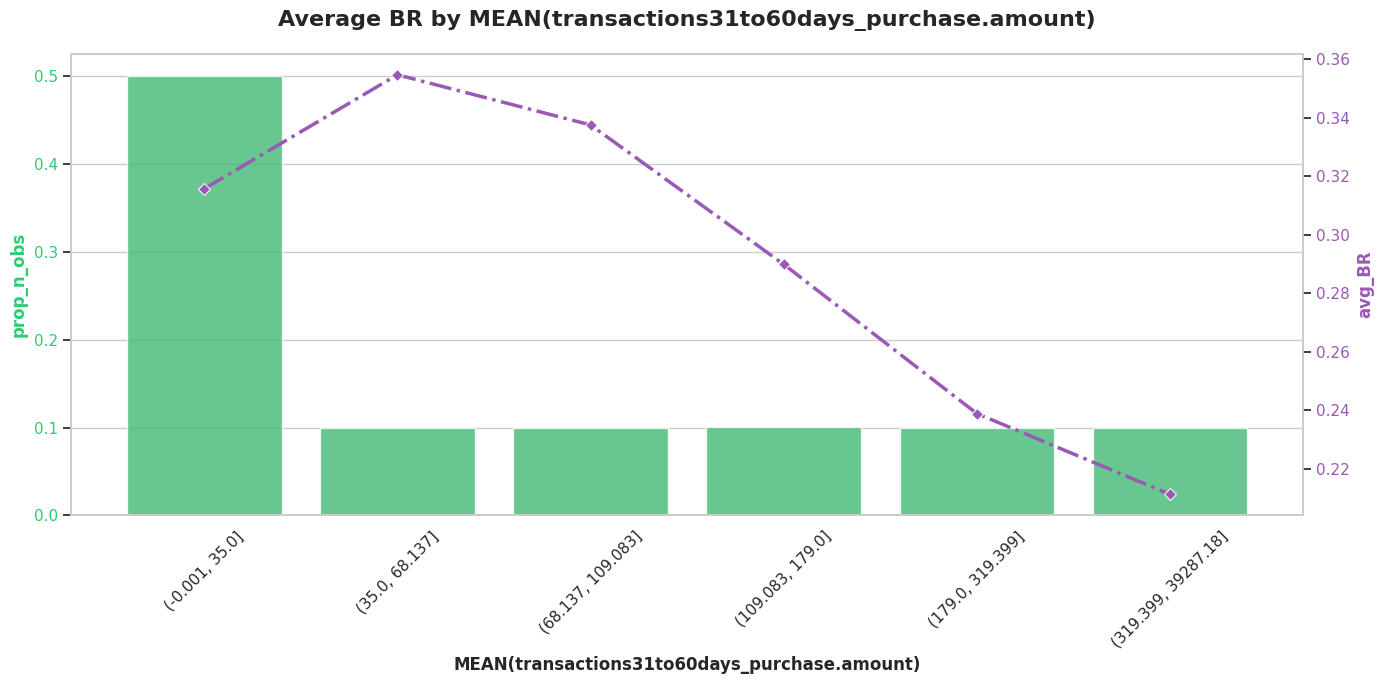

---------------------------------------------------------------------------------------------------



Value Analysis for: MEAN(transactions1to30days_purchase.amount)

|    | MEAN(transactions1to30days_purchase.amount)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:----------------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 35.097]                              |    6390 | 0.377308 |    0.3       |
|  1 | (35.097, 60.0]                                |    2136 | 0.359082 |    0.100282  |
|  2 | (60.0, 89.425]                                |    2124 | 0.326742 |    0.0997183 |
|  3 | (89.425, 120.945]                             |    2130 | 0.286385 |    0.1       |
|  4 | (120.945, 171.001]                            |    2130 | 0.258216 |    0.1       |
|  5 | (171.001, 244.611]                            |    2130 | 0.240376 |    0.1       |
|  6 | (244.611, 395.351]                            |    2130 | 0.213615 |    0.1       |
|  7 | (395.3

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


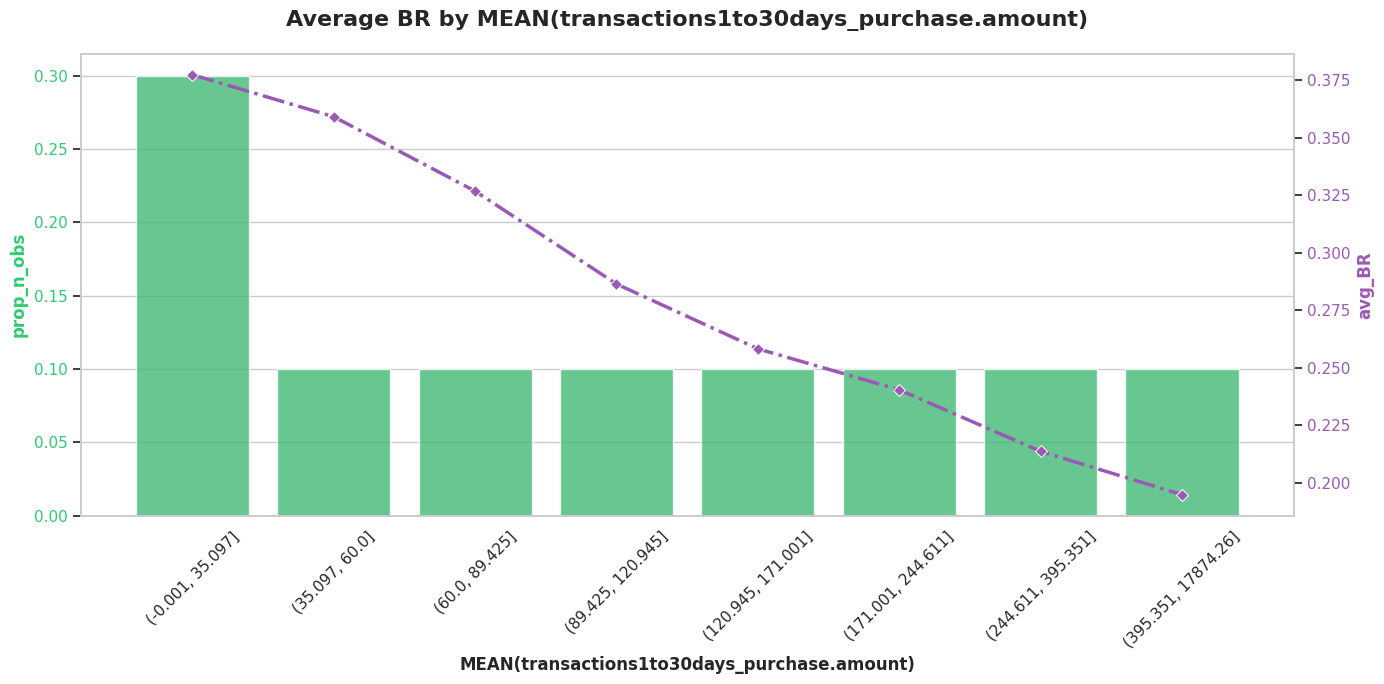

---------------------------------------------------------------------------------------------------



Value Analysis for: COUNT(transactions31to60days_purchase)

|    | COUNT(transactions31to60days_purchase)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:-----------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 1.0]                            |   11610 | 0.30801  |    0.54507   |
|  1 | (1.0, 2.0]                               |    1730 | 0.299422 |    0.0812207 |
|  2 | (2.0, 4.0]                               |    2259 | 0.276671 |    0.106056  |
|  3 | (4.0, 7.0]                               |    1900 | 0.298421 |    0.0892019 |
|  4 | (7.0, 13.0]                              |    1879 | 0.307078 |    0.088216  |
|  5 | (13.0, 142.0]                            |    1922 | 0.286681 |    0.0902347 |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


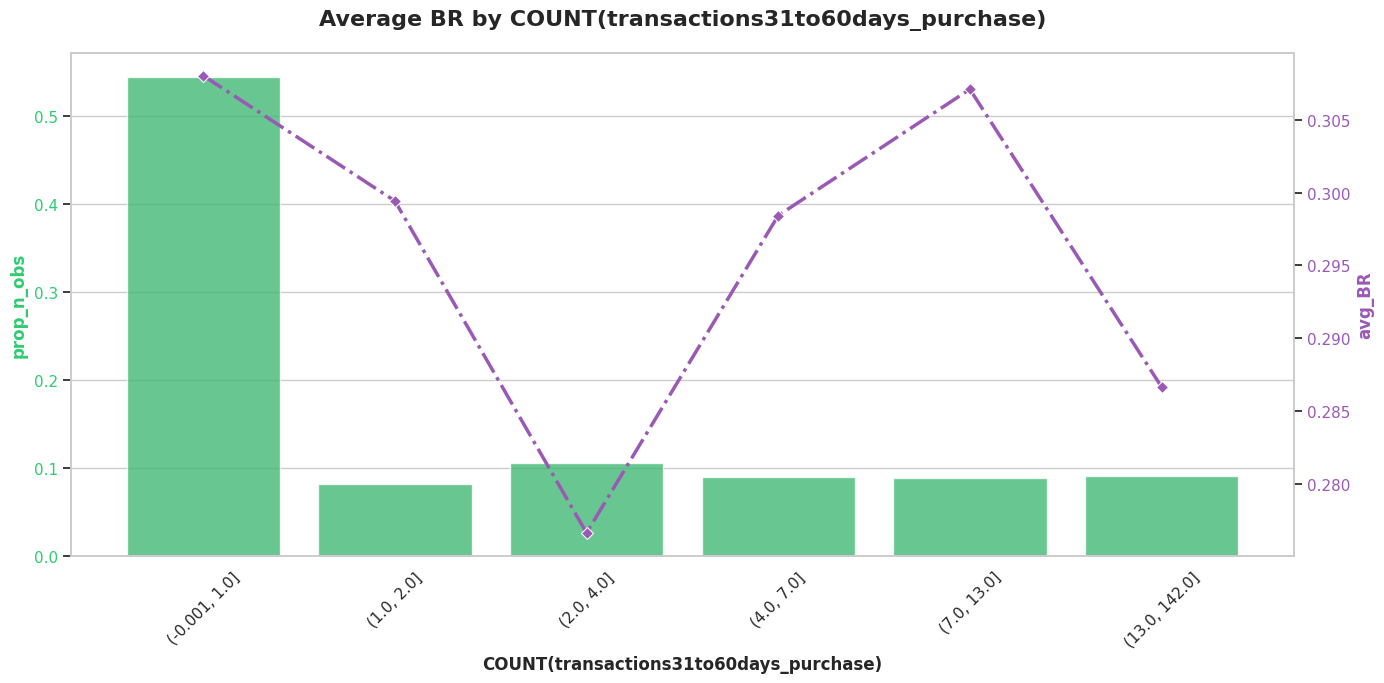

---------------------------------------------------------------------------------------------------



Value Analysis for: COUNT(transactions1to30days_clabeOut)

|    | COUNT(transactions1to30days_clabeOut)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:----------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 1.0]                           |    9748 | 0.29524  |    0.457653  |
|  1 | (1.0, 2.0]                              |    2410 | 0.266805 |    0.113146  |
|  2 | (2.0, 3.0]                              |    1855 | 0.259838 |    0.0870892 |
|  3 | (3.0, 4.0]                              |    1369 | 0.30095  |    0.0642723 |
|  4 | (4.0, 6.0]                              |    1947 | 0.312275 |    0.0914085 |
|  5 | (6.0, 10.0]                             |    1976 | 0.32085  |    0.09277   |
|  6 | (10.0, 87.0]                            |    1995 | 0.379449 |    0.093662  |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


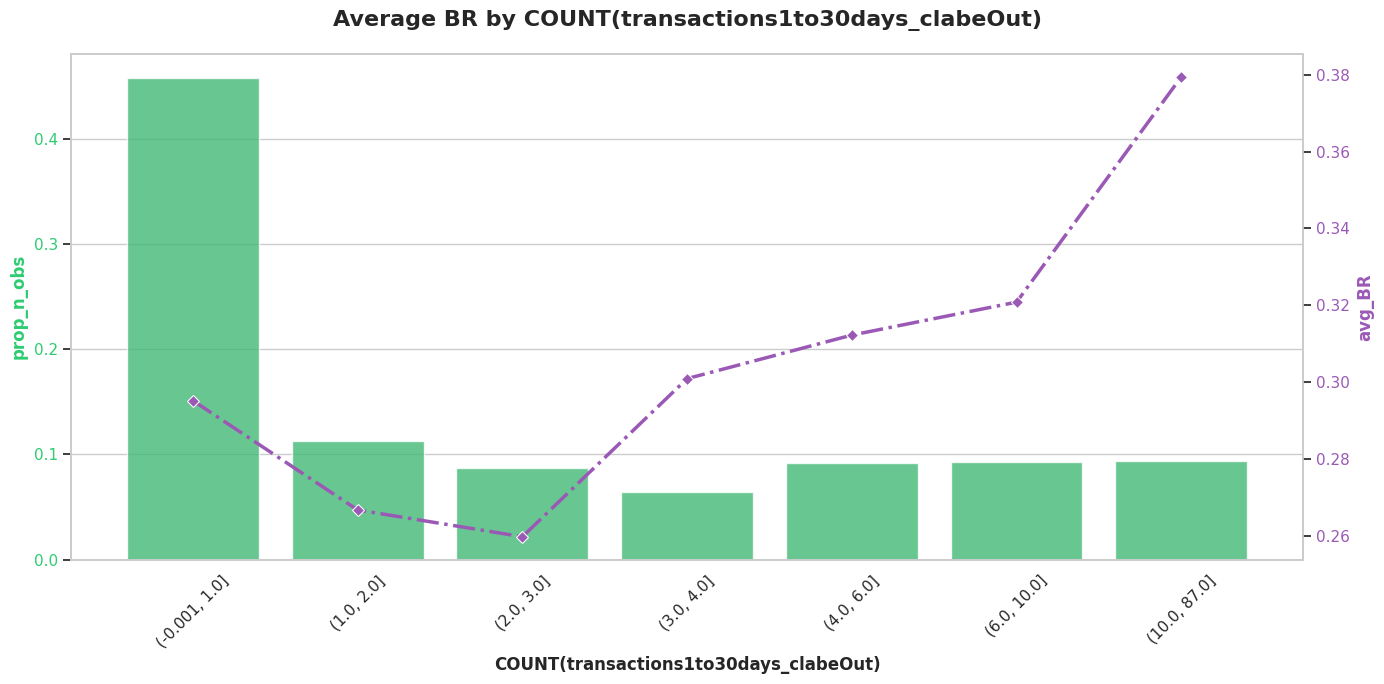

---------------------------------------------------------------------------------------------------



Value Analysis for: COUNT(transactions31to60days_clabeOut)

|    | COUNT(transactions31to60days_clabeOut)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:-----------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 1.0]                            |   13589 | 0.279712 |    0.637981  |
|  1 | (1.0, 2.0]                               |    2147 | 0.283652 |    0.100798  |
|  2 | (2.0, 3.0]                               |    1425 | 0.322105 |    0.0669014 |
|  3 | (3.0, 6.0]                               |    2263 | 0.339373 |    0.106244  |
|  4 | (6.0, 66.0]                              |    1876 | 0.414179 |    0.0880751 |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


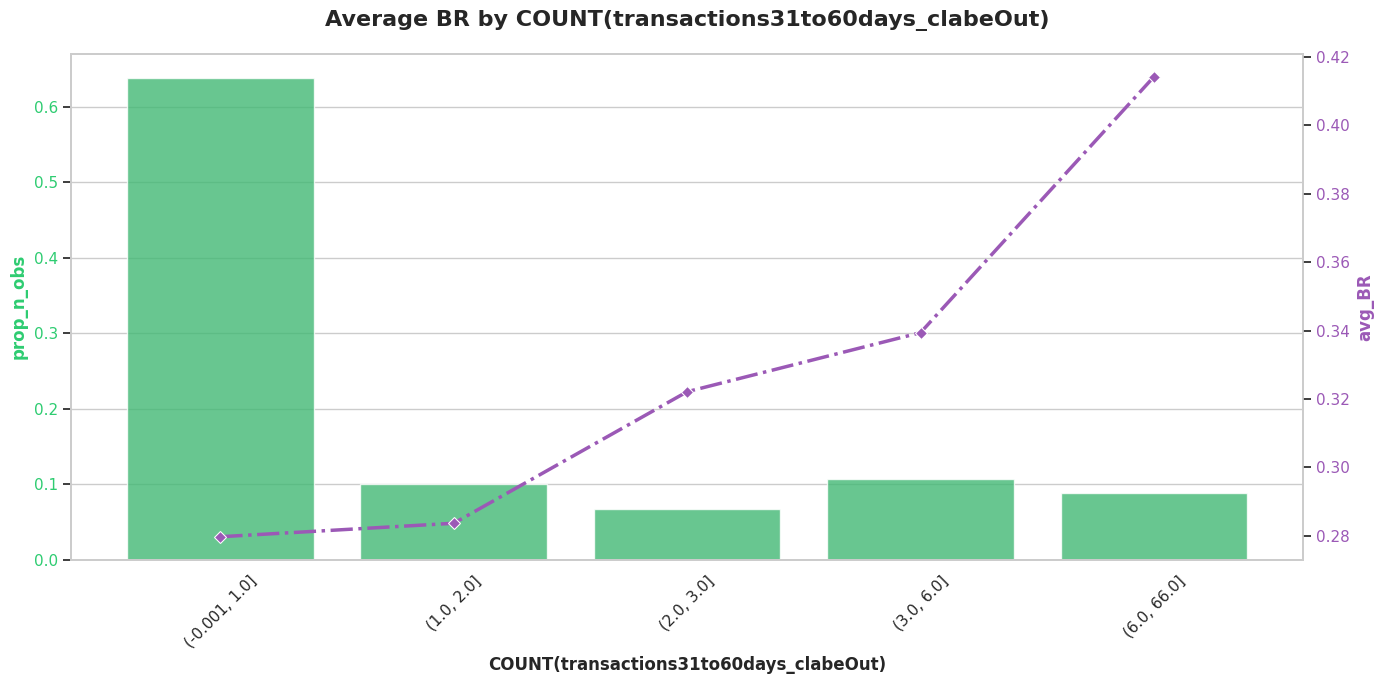

---------------------------------------------------------------------------------------------------



Value Analysis for: MEAN(transactions31to60days_clabeOut.amount)

|    | MEAN(transactions31to60days_clabeOut.amount)   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:-----------------------------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 8.902]                                |   10650 | 0.280282 |          0.5 |
|  1 | (8.902, 91.566]                                |    2130 | 0.335681 |          0.1 |
|  2 | (91.566, 206.242]                              |    2130 | 0.32723  |          0.1 |
|  3 | (206.242, 400.114]                             |    2130 | 0.341315 |          0.1 |
|  4 | (400.114, 805.505]                             |    2130 | 0.31831  |          0.1 |
|  5 | (805.505, 83525.0]                             |    2130 | 0.287324 |          0.1 |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


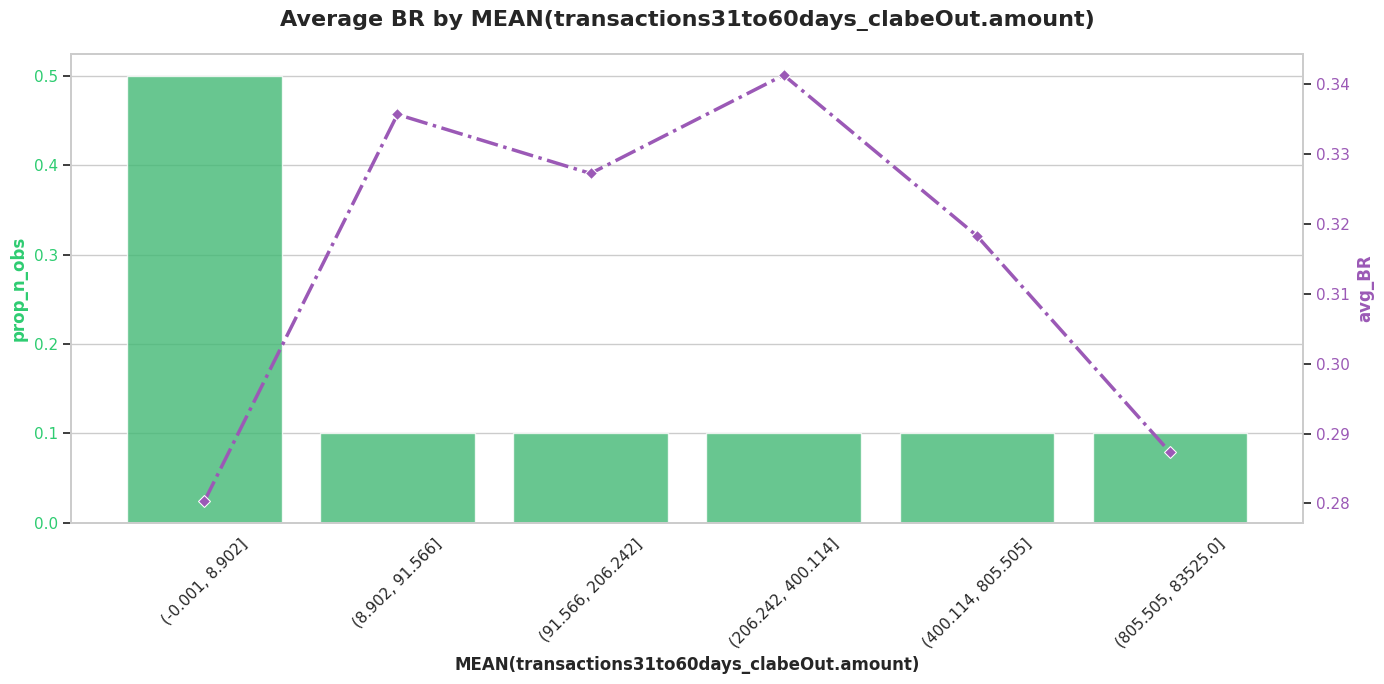

---------------------------------------------------------------------------------------------------



Value Analysis for: ratioBalanceClabeIn_1to30days

|    | ratioBalanceClabeIn_1to30days   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:--------------------------------|--------:|---------:|-------------:|
|  0 | (-10.081, 0.0]                  |    4184 | 0.383604 |   0.196432   |
|  1 | (0.0, 0.000463]                 |      76 | 0.447368 |   0.00356808 |
|  2 | (0.000463, 0.0272]              |    2130 | 0.412207 |   0.1        |
|  3 | (0.0272, 0.0436]                |    2130 | 0.38169  |   0.1        |
|  4 | (0.0436, 0.0595]                |    2130 | 0.321127 |   0.1        |
|  5 | (0.0595, 0.0791]                |    2130 | 0.27277  |   0.1        |
|  6 | (0.0791, 0.108]                 |    2130 | 0.241315 |   0.1        |
|  7 | (0.108, 0.157]                  |    2130 | 0.220188 |   0.1        |
|  8 | (0.157, 0.277]                  |    2130 | 0.188732 |   0.1        |

/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


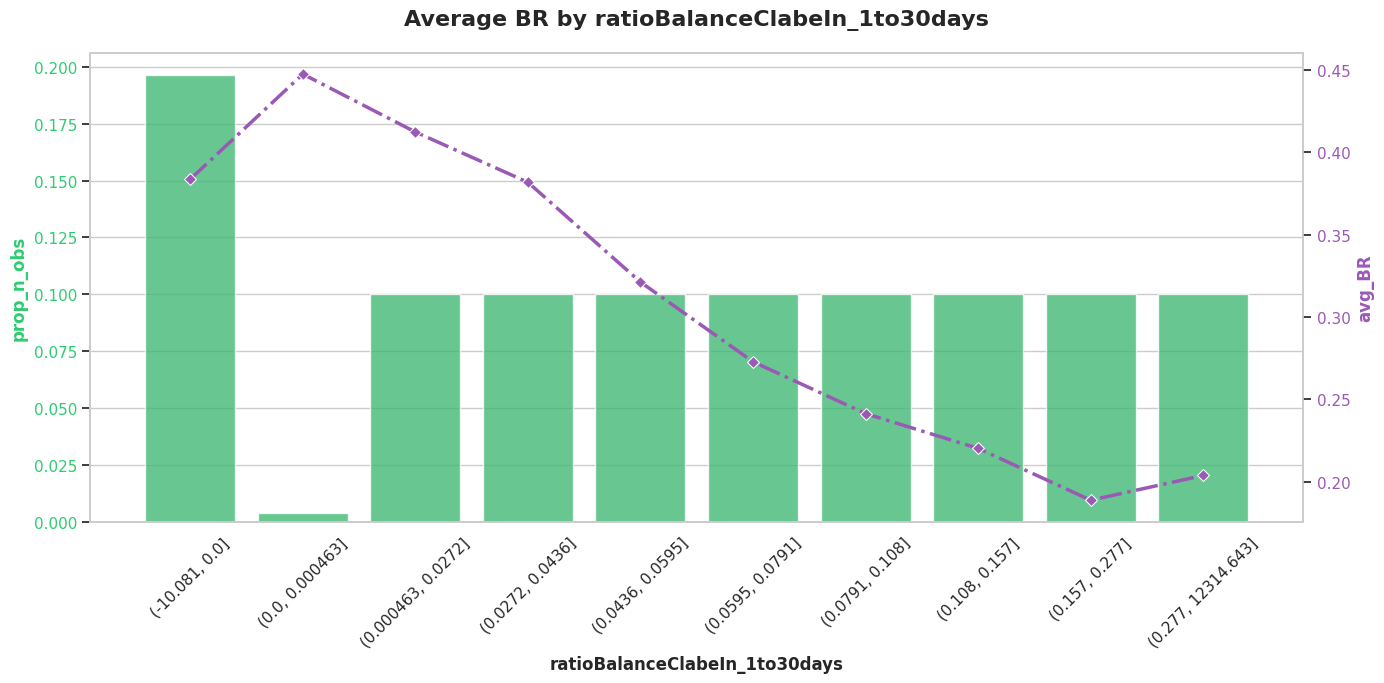

---------------------------------------------------------------------------------------------------



Value Analysis for: ratioCableInOut_1to30days

|    | ratioCableInOut_1to30days   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:----------------------------|--------:|---------:|-------------:|
|  0 | (-0.001, 0.208]             |    8520 | 0.298474 |    0.4       |
|  1 | (0.208, 0.4]                |    2168 | 0.266605 |    0.101784  |
|  2 | (0.4, 0.6]                  |    2238 | 0.274352 |    0.10507   |
|  3 | (0.6, 0.833]                |    1997 | 0.314972 |    0.0937559 |
|  4 | (0.833, 1.0]                |    2505 | 0.320559 |    0.117606  |
|  5 | (1.0, 1.5]                  |    1764 | 0.325964 |    0.0828169 |
|  6 | (1.5, 29.0]                 |    2108 | 0.318786 |    0.0989671 |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


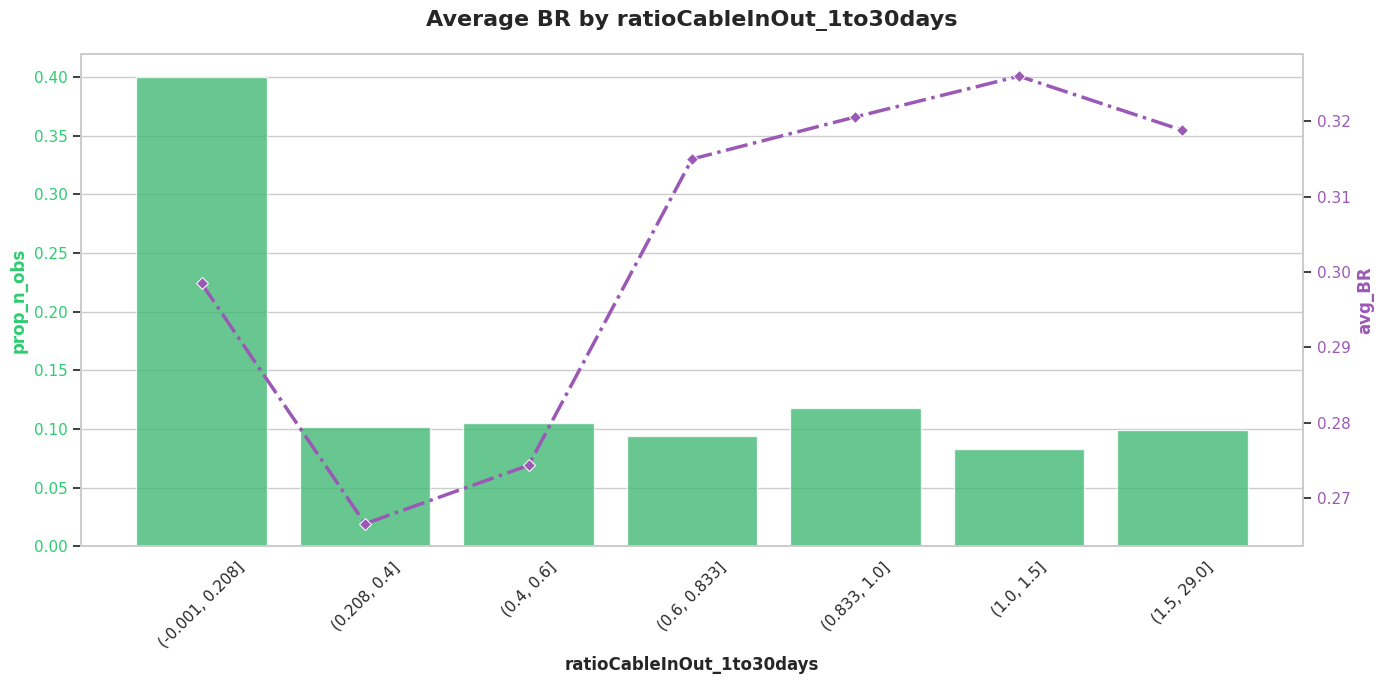

---------------------------------------------------------------------------------------------------



Value Analysis for: ratioBalanceClabeIn_31to60days

|    | ratioBalanceClabeIn_31to60days   |   n_obs |   avg_BR |   prop_n_obs |
|---:|:---------------------------------|--------:|---------:|-------------:|
|  0 | (-9.597999999999999, 0.0]        |    7202 | 0.317828 |    0.338122  |
|  1 | (0.0, 0.0208]                    |    1318 | 0.443854 |    0.0618779 |
|  2 | (0.0208, 0.0448]                 |    2130 | 0.416901 |    0.1       |
|  3 | (0.0448, 0.0698]                 |    2130 | 0.334742 |    0.1       |
|  4 | (0.0698, 0.105]                  |    2130 | 0.299061 |    0.1       |
|  5 | (0.105, 0.166]                   |    2130 | 0.237559 |    0.1       |
|  6 | (0.166, 0.312]                   |    2130 | 0.207512 |    0.1       |
|  7 | (0.312, 827.964]                 |    2130 | 0.166197 |    0.1       |



/tmp/ipython-input-361118541.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
/tmp/ipython-input-361118541.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)


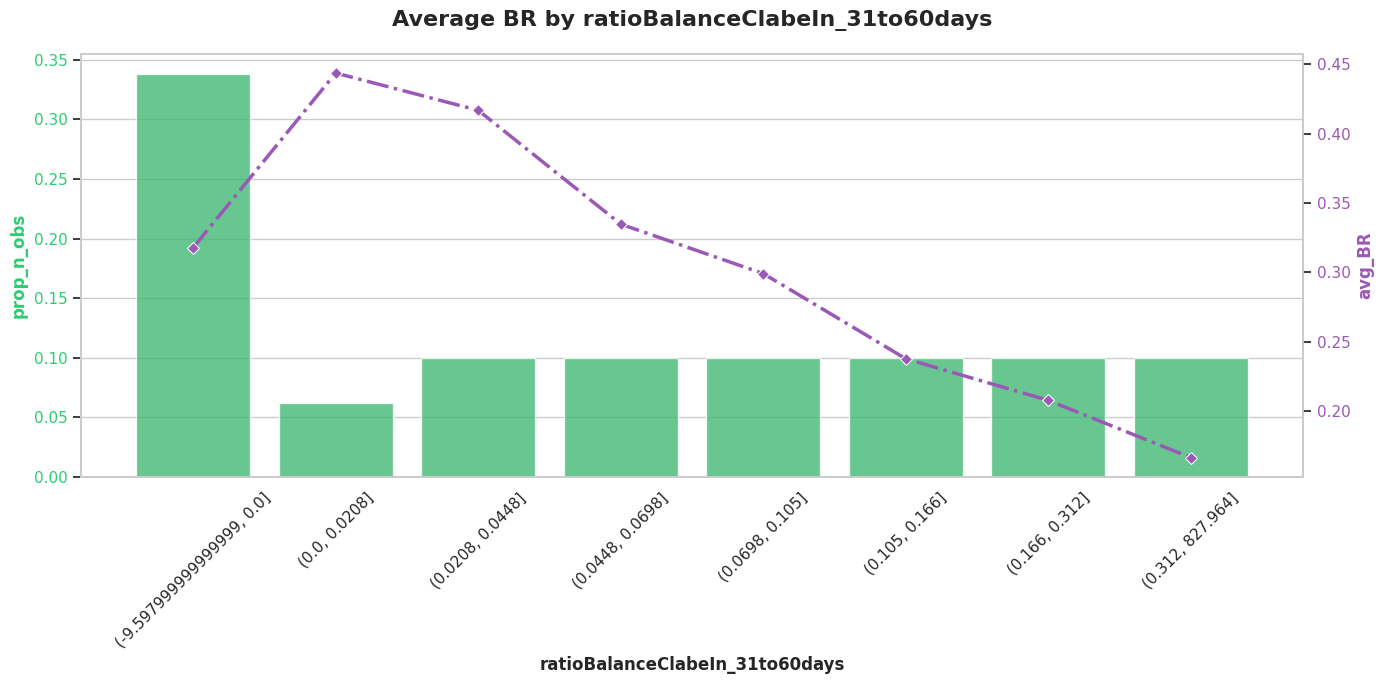

---------------------------------------------------------------------------------------------------



In [ ]:
#Ahora aplicaremos para todas la variables de num_vars la función tabla_plot
for var in num_vars:
  #df_tempn = woe_ordered_continuous(df_features_num_factors, var, df_scores)
  #print("Value Analysis for: "+var)
  print("")
  #df_tempn.columns = ['var', 'n_obs', 'avg_Score','prop_n_obs']
  #print(df_tempn)
  print("")
  tabla_plot(df_features_num_factors,var,df_scores) #llamamos a la función tabla_plot
  print("---------------------------------------------------------------------------------------------------")
  print("") #la impresión de líneas vacías y una línea de guiones es para separar visualmente las salidas de las iteraciones y mejorar la legibilidad
  df_tempn=pd.DataFrame()

Conclusión Bivariate analysis: A lo largo de este código hemos aprendido y empleado algunas librerías e integrado las diferentes herramientas que nos brindan, como Pandas para la manipulación y preparación de datos, y Matplotlib para la visualización de estos, lo que nos permitió identificar hallazgos, como patrones y relaciones entre las variables, y así elaborar un análisis relevante.

In [ ]:
worksheet = writer.book.add_worksheet('Conclusion')
worksheet = writer.sheets['Conclusion']

worksheet.write(0, 0, "Conclusión Bivariate analysis: A lo largo de este código hemos aprendido y empleado algunas librerías e integrado las diferentes herramientas que nos brindan, como Pandas para la manipulación y preparación de datos, y Matplotlib para la visualización de estos, lo que nos permitió identificar hallazgos, como patrones y relaciones entre las variables, y así elaborar un análisis relevante.")

0

## Scraping con API

In [ ]:
API_KEY  = '0W7O81SRBNQ28ZGJ' #NO TOCAR esta linea
BASE_URL = 'https://www.alphavantage.co/query'#xd
SYMBOL   = '000725.SZ' #la accion a cotizar

In [ ]:
def descarga_alpha_vantage(symbol: str) -> dict: #funcion para descargar el JSON de Alpha Vantage.
    #la consulta a la api debuelve un json y hay que convertirlo
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'outputsize': 'full',
        'apikey': API_KEY
    }#los parametros
    resp = requests.get(BASE_URL, params=params, timeout=30)#realizar la pericion get
    resp.raise_for_status()#comprobacion de error
    return resp.json()#debuelve la respuesta en json

In [ ]:
def json_a_df(raw_json: dict):#la funcio toma un diccionario y devuelve un df
    raw_ts = raw_json['Time Series (Daily)']#saca el datos relacionado a Time Series (Daily)

    df = (pd.DataFrame.from_dict(raw_ts, orient='index')#crea un df a partir de raw_ts le indica que la fecha es el nuevo indice o sea el raw_ts
            .rename(columns=lambda c: c.split('. ')[1])#con funcion lambda y lo divide cada columna por ". " y se queda con la posicion [1] (la segunda), quita prefijo numérico
            .apply(pd.to_numeric)                        # casting
            .sort_index(ascending=False)                 # fecha más reciente arriba
            .rename_axis('date'))# #le pone el nombre 'date' al índice

    df.reset_index(inplace=True)#convierte el índice (las fechas) en una columna normal del df
    df['date'] = pd.to_datetime(df['date']) #convierte a formato fecha
    return df

In [ ]:
def alpha_szse_full_history(symbol: str):#funcion que toma un str (el ticket de la accion) y la evaluacion en la funcion anterior que finalmente devuelve un df
    json_raw = descarga_alpha_vantage(symbol) #llama a la funcion de descarga y guarda el json
    return json_a_df(json_raw)#devuelve la funcion de json a df

df_full = alpha_szse_full_history(SYMBOL)#resultado final crea un df de la funcion anterior con SYMBOL   = '000725.SZ'
print(df_full.head())

        date  open  high   low  close     volume
0 2025-09-26  4.16  4.17  4.10   4.10  709105800
1 2025-09-25  4.20  4.21  4.15   4.17  654962540
2 2025-09-24  4.14  4.22  4.11   4.21  948599310
3 2025-09-23  4.15  4.18  4.05   4.16  712982490
4 2025-09-22  4.13  4.18  4.08   4.14  503754600


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4826 non-null   datetime64[ns]
 1   open    4826 non-null   float64       
 2   high    4826 non-null   float64       
 3   low     4826 non-null   float64       
 4   close   4826 non-null   float64       
 5   volume  4826 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 226.3 KB


In [ ]:
df_full['avg_price'] = (df_full['high'] + df_full['low']) / 2
df_full.head()

date  open  high   low  close     volume  avg_price
0 2025-09-26  4.16  4.17  4.10   4.10  709105800      4.135
1 2025-09-25  4.20  4.21  4.15   4.17  654962540      4.180
2 2025-09-24  4.14  4.22  4.11   4.21  948599310      4.165
3 2025-09-23  4.15  4.18  4.05   4.16  712982490      4.115
4 2025-09-22  4.13  4.18  4.08   4.14  503754600      4.130

In [ ]:
promedio_total = df_full['avg_price'].mean()
print(promedio_total)

4.054819726481558


In [ ]:
maximo_general = df_full['high'].max()
print(maximo_general)

15.74


In [ ]:
minimo_general = df_full['low'].min()
print(minimo_general)

1.61


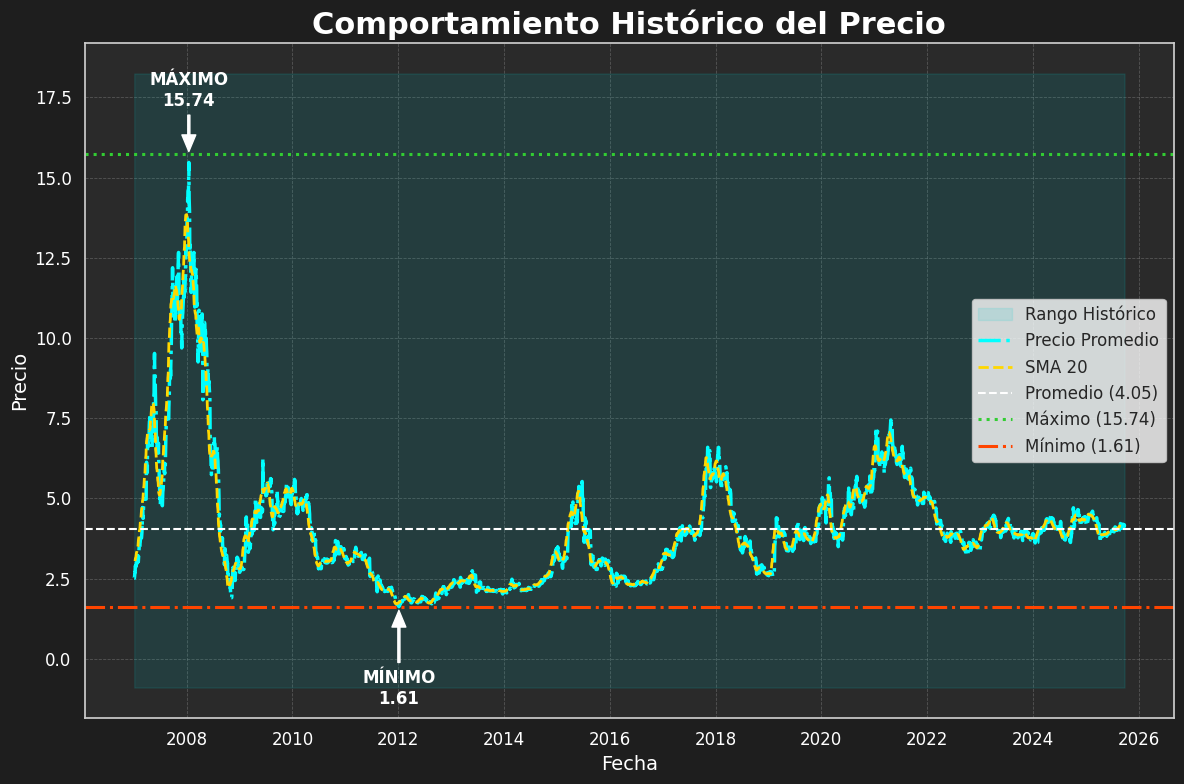

In [ ]:
# Calcular media móvil opcional de 20 periodos
df_full['SMA20'] = df_full['avg_price'].rolling(20).mean()

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor('#1E1E1E')  # Fondo de la figura oscuro
ax.set_facecolor('#2A2A2A')   # Fondo del gráfico

# Relleno del rango histórico con transparencia
ax.fill_between(df_full['date'], minimo_general-2.5, maximo_general+2.5,
                color='#00CED1', alpha=0.12, label='Rango Histórico')

# Línea principal: Precio promedio
ax.plot(df_full['date'], df_full['avg_price'], color='#00FFFF', linewidth=2.5, linestyle='-.', label='Precio Promedio')

# Media móvil SMA20
ax.plot(df_full['date'], df_full['SMA20'], color='#FFD700', linewidth=2, linestyle='--', label='SMA 20')

# Líneas de referencia con estilos diferentes
ax.axhline(promedio_total, color='white', linestyle='--', linewidth=1.5, label=f'Promedio ({promedio_total:.2f})')
ax.axhline(maximo_general, color='#32CD32', linestyle=':', linewidth=2.2, label=f'Máximo ({maximo_general:.2f})')
ax.axhline(minimo_general, color='#FF4500', linestyle='-.', linewidth=2.2, label=f'Mínimo ({minimo_general:.2f})')

# Anotaciones de máximos y mínimos
fecha_maximo = df_full.loc[df_full['high'] == maximo_general, 'date'].iloc[0]
fecha_minimo = df_full.loc[df_full['low'] == minimo_general, 'date'].iloc[0]

ax.annotate(f'MÁXIMO\n{maximo_general:.2f}', xy=(fecha_maximo, maximo_general),
            xytext=(fecha_maximo, maximo_general + 1.5),
            arrowprops=dict(facecolor='white', shrink=0.05, width=1.5, headwidth=10),
            fontsize=12, color='white', ha='center', weight='bold')

ax.annotate(f'MÍNIMO\n{minimo_general:.2f}', xy=(fecha_minimo, minimo_general),
            xytext=(fecha_minimo, minimo_general - 3),
            arrowprops=dict(facecolor='white', shrink=0.05, width=1.5, headwidth=10),
            fontsize=12, color='white', ha='center', weight='bold')

# Títulos y etiquetas
ax.set_title('Comportamiento Histórico del Precio', fontsize=22, color='white', weight='bold')
ax.set_xlabel('Fecha', fontsize=14, color='white')
ax.set_ylabel('Precio', fontsize=14, color='white')

# Leyenda y grid
ax.legend(loc=5, fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.5, color='gray')
ax.tick_params(colors='white', labelsize=12)

plt.tight_layout()
plt.show()

# Guardar la figura
nombre_grafico = 'g9.png'
fig.savefig(nombre_grafico, facecolor=fig.get_facecolor())
plt.close(fig)



In [ ]:
df_full['daily_return'] = df_full['close'].pct_change()#el daily_return es el procentaje de cambio en el precio de cierre

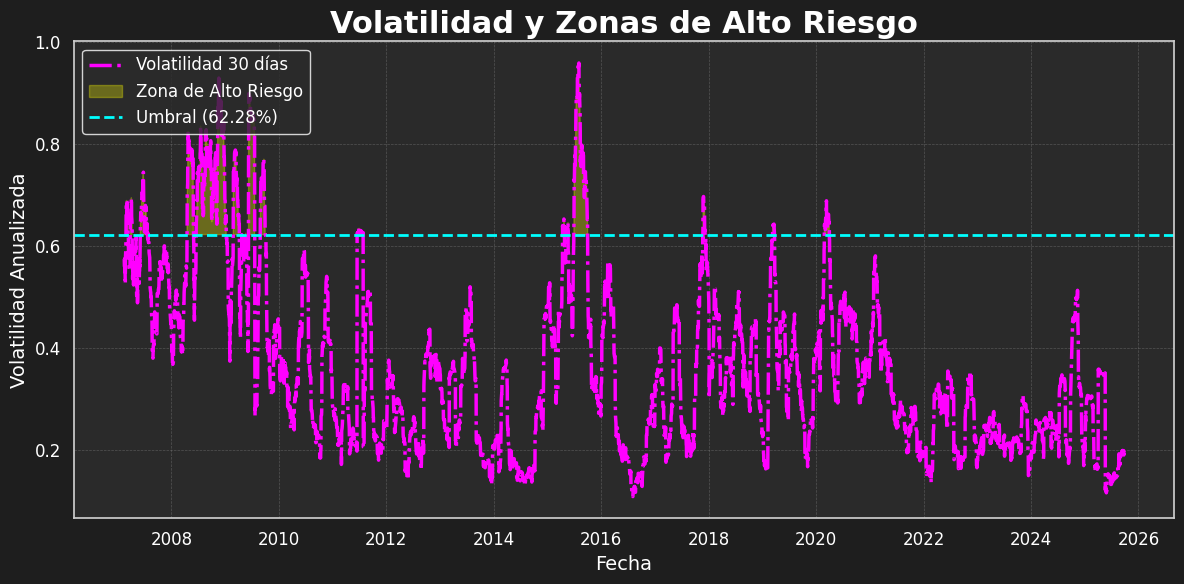

In [ ]:
#Establecemos la columna 'date' como el nuevo índice del DataFrame
df_full = df_full.set_index('date').sort_index()

# Primero, necesitamos calcular los rendimientos diarios si no existen
if 'daily_return' not in df_full.columns:
    df_full['daily_return'] = df_full['close'].pct_change()

# Luego, calculamos la volatilidad móvil de 30 días
# Es la desviación estándar de los rendimientos en una ventana de 30 días.
# Se multiplica por la raíz de 252 para anualizarla (una práctica estándar en finanzas).
ventana_volatilidad = 30
df_full['volatility'] = df_full['daily_return'].rolling(window=ventana_volatilidad).std() * np.sqrt(252)

#Eliminamos los valores NaN que se generan al principio por el cálculo de la ventana móvil
df_full.dropna(subset=['volatility'], inplace=True)


# Calculamos las estadísticas de la volatilidad ya calculada
avg_volatility = df_full['volatility'].mean()
std_volatility = df_full['volatility'].std()

# Umbral de "alto riesgo"
umbral_alto = avg_volatility + 1.5 * std_volatility

# Trazamos la volatilidad
fig, ax = plt.subplots(figsize=(12, 6))
fig.set_facecolor('#1E1E1E')  # Fondo de la figura
ax.set_facecolor('#2A2A2A')   # Fondo del gráfico

# Línea de volatilidad
# Ahora usamos df_full.index en lugar de df_full['date'] porque la fecha debe ser el índice
ax.plot(df_full.index, df_full['volatility'], color='#FF00FF', linewidth=2.5, linestyle='-.', label=f'Volatilidad {ventana_volatilidad} días')

# Sombreado zona de alto riesgo
ax.fill_between(df_full.index,
                umbral_alto,
                df_full['volatility'],
                where=(df_full['volatility'] > umbral_alto),
                color='#FFFF00', alpha=0.3, label='Zona de Alto Riesgo')

# Línea del umbral
ax.axhline(umbral_alto, color='#00FFFF', linestyle='--', linewidth=2, label=f'Umbral ({umbral_alto:.2%})')

# Título y etiquetas
ax.set_title('Volatilidad y Zonas de Alto Riesgo', fontsize=22, color='white', weight='bold')
ax.set_ylabel('Volatilidad Anualizada', fontsize=14, color='white')
ax.set_xlabel('Fecha', fontsize=14, color='white')

# Grid y Ticks
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color='gray')
ax.tick_params(colors='white', labelsize=12)

# Leyenda
ax.legend(fontsize=12, loc='upper left', facecolor='#2A2A2A', edgecolor='white', labelcolor='white')

plt.tight_layout()
plt.show()

# Guardar la figura
nombre_grafico = 'g10.png'
fig.savefig(nombre_grafico, facecolor=fig.get_facecolor())
plt.close(fig)

In [ ]:
# Calcular la correlación entre el retorno diario y el volumen
correlation_matrix = df_full[['daily_return', 'volume']].corr()

print("Matriz de Correlación:")
print(correlation_matrix.to_markdown())

Matriz de Correlación:
|              |   daily_return |    volume |
|:-------------|---------------:|----------:|
| daily_return |      1         | 0.0134707 |
| volume       |      0.0134707 | 1         |


In [ ]:
correlation_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, daily_return to volume
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   daily_return  2 non-null      float64
 1   volume        2 non-null      float64
dtypes: float64(2)
memory usage: 156.0+ bytes


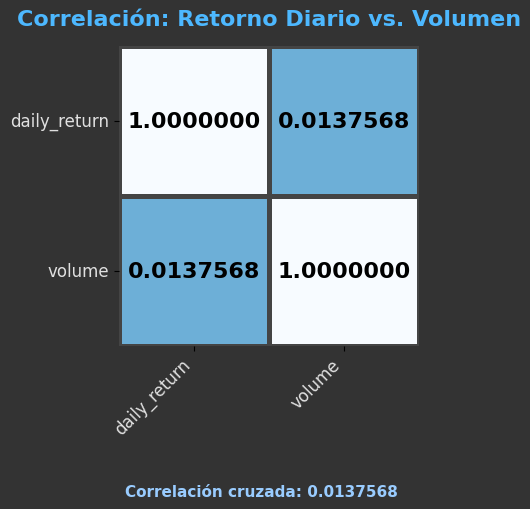

In [ ]:
#Simulación de tus datos para que el código sea ejecutable
correlation_data = [[1.0, 0.0137568], [0.0137568, 1.0]]
index = ['daily_return', 'volume']
correlation_matrix = pd.DataFrame(correlation_data, index=index, columns=index)

#Colores
COLOR_FONDO_GRIS_SUAVE = '#333333'
COLOR_FONDO_AREA_GRAFICO = '#444444'
COLOR_LINEA_SUAVE = '#666666'
COLOR_TEXTO_CLARO = '#e0e0e0'
COLOR_ACENTO_AZUL_CLARO = '#4db8ff'
COLOR_NOTA_INFO = '#99ccff'
COLOR_NUMEROS = '#000000'


plt.style.use('default')
fig, ax = plt.subplots(figsize=(6, 5))

# Establece el color de fondo para el área exterior de la figura.
fig.patch.set_facecolor(COLOR_FONDO_GRIS_SUAVE)
# Establece el color de fondo para el área INTERIOR del gráfico
ax.set_facecolor(COLOR_FONDO_AREA_GRAFICO)

# Dibujamos el mapa de calor usando la librería Seaborn.
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Blues_r',
    center=0,
    square=True,
    fmt=".7f",
    linewidths=2.5,
    linecolor=COLOR_FONDO_AREA_GRAFICO,
    cbar=False,
    annot_kws={
        "size": 16,
        "weight": "bold",
        "color": COLOR_NUMEROS,
        "family": "sans-serif"
    }
)

#Título
ax.set_title(
    'Correlación: Retorno Diario vs. Volumen',
    fontsize=16,
    fontweight='bold',
    color=COLOR_ACENTO_AZUL_CLARO,
    pad=15
)

plt.xticks(rotation=45, ha='right', fontsize=12, color=COLOR_TEXTO_CLARO)
plt.yticks(rotation=0, fontsize=12, color=COLOR_TEXTO_CLARO)
ax.set_xlabel('')
ax.set_ylabel('')

#Movemos el texto más abajo cambiando la coordenada Y
ax.text(
    0.02, -0.5, # Cambiado de -0.15 a -0.25
    f'Correlación cruzada: {correlation_matrix.loc["daily_return", "volume"]:.7f}',
    transform=ax.transAxes,
    fontsize=11,
    color=COLOR_NOTA_INFO,
    family='sans-serif',
    weight='bold'
)


for spine in ax.spines.values():
    spine.set_color(COLOR_LINEA_SUAVE)
    spine.set_linewidth(1)


plt.subplots_adjust(left=0.15, right=0.95, top=0.85, bottom=0.25) # Aumentamos el margen inferior (bottom)

plt.show()


# Guardar la figura
nombre_grafico = 'g11.png'
fig.savefig(nombre_grafico, facecolor=fig.get_facecolor())
plt.close(fig)

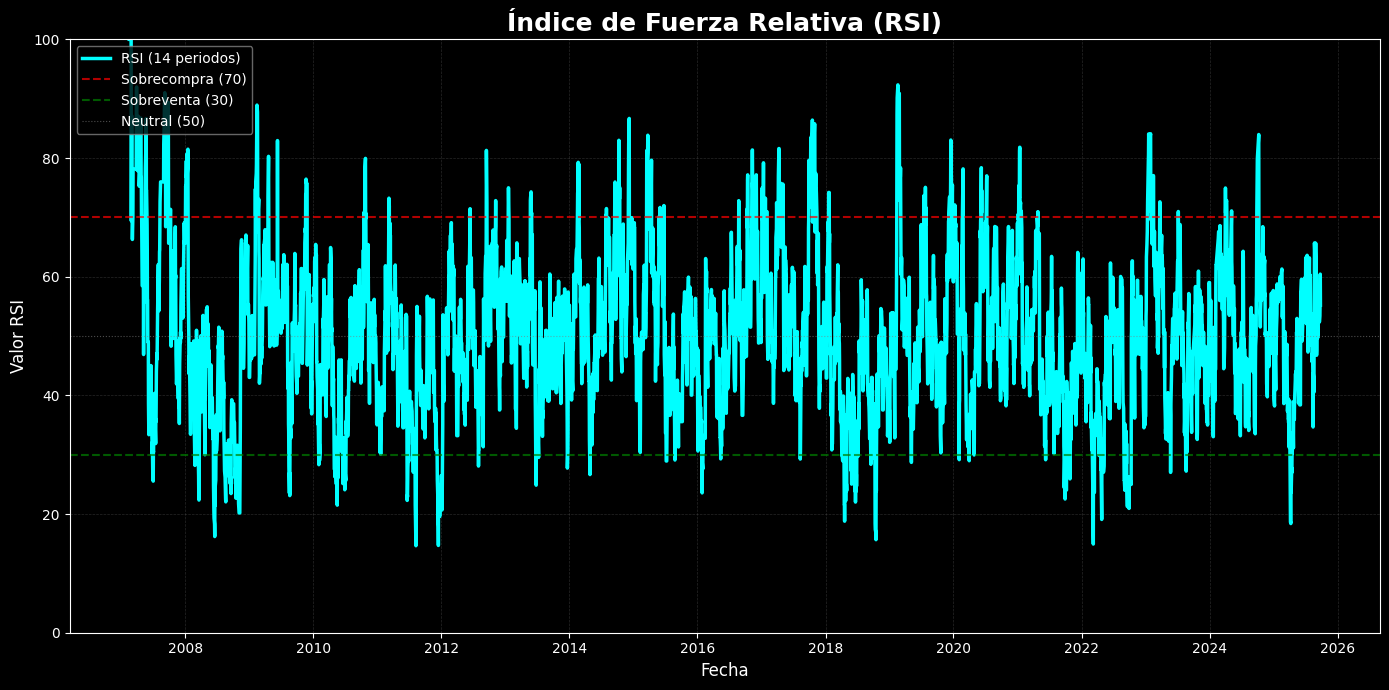

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calculamos el RSI (Índice de Fuerza Relativa)
periodo_rsi = 14 #Periodo estándar de 14 días

delta = df_full['close'].diff(1) #calculamos la diferencia entre el precio de cierre de cada día y el del día anterior.
gain = delta.where(delta > 0, 0) #aíslamos únicamente las ganancias, si un valor en delta es mayor que 0 (una ganancia), mantiene ese valor, sino lo reemplaza con 0
loss = -delta.where(delta < 0, 0) #aíslamos únicamente las pérdidas pero toma el valor absoluto

avg_gain = gain.ewm(com=periodo_rsi - 1, adjust=False).mean() #Calculamos la media móvil exponencial
avg_loss = loss.ewm(com=periodo_rsi - 1, adjust=False).mean() #Exactamente lo mismo que la línea anterior, pero aplicada a la serie de pérdidas

rs = avg_gain / avg_loss #calculamos el ratio entre la ganancia promedio y la pérdida promedio
df_full['rsi'] = 100 - (100 / (1 + rs)) # normaliza el valor rs para que siempre se mueva dentro de una escala fija y fácil de interpretar

#Creación del Gráfico
plt.style.use('dark_background') #Fondo oscuro
plt.figure(figsize=(14, 7))

# Graficar el RSI
plt.plot(df_full.index, df_full['rsi'], label=f'RSI ({periodo_rsi} periodos)', color='cyan', linewidth=2.5)

# Añadir líneas de referencia para sobrecompra y sobreventa
plt.axhline(70, linestyle='--', color='red', alpha=0.7, label='Sobrecompra (70)', linewidth=1.5)
plt.axhline(30, linestyle='--', color='green', alpha=0.7, label='Sobreventa (30)', linewidth=1.5)
plt.axhline(50, linestyle=':', color='gray', alpha=0.6, label='Neutral (50)', linewidth=0.8) # Línea neutral

#Configuración del gráfico
plt.title('Índice de Fuerza Relativa (RSI)', fontsize=18, fontweight='bold', color='white')
plt.ylabel('Valor RSI', fontsize=12, color='white')
plt.xlabel('Fecha', fontsize=12, color='white')
plt.ylim(0, 100) # El RSI siempre se mueve entre 0 y 100
plt.legend(facecolor='black', edgecolor='gray', fontsize=10, loc='upper left') # Leyenda con fondo oscuro
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3, color='gray') #Estilo de Grill
plt.xticks(color='white')
plt.yticks(color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

#Guardar y descargar (solo si estás en Google Colab)
nombre_grafico = 'g12.png'
plt.savefig(nombre_grafico, facecolor=fig.get_facecolor(), bbox_inches='tight', dpi=300)

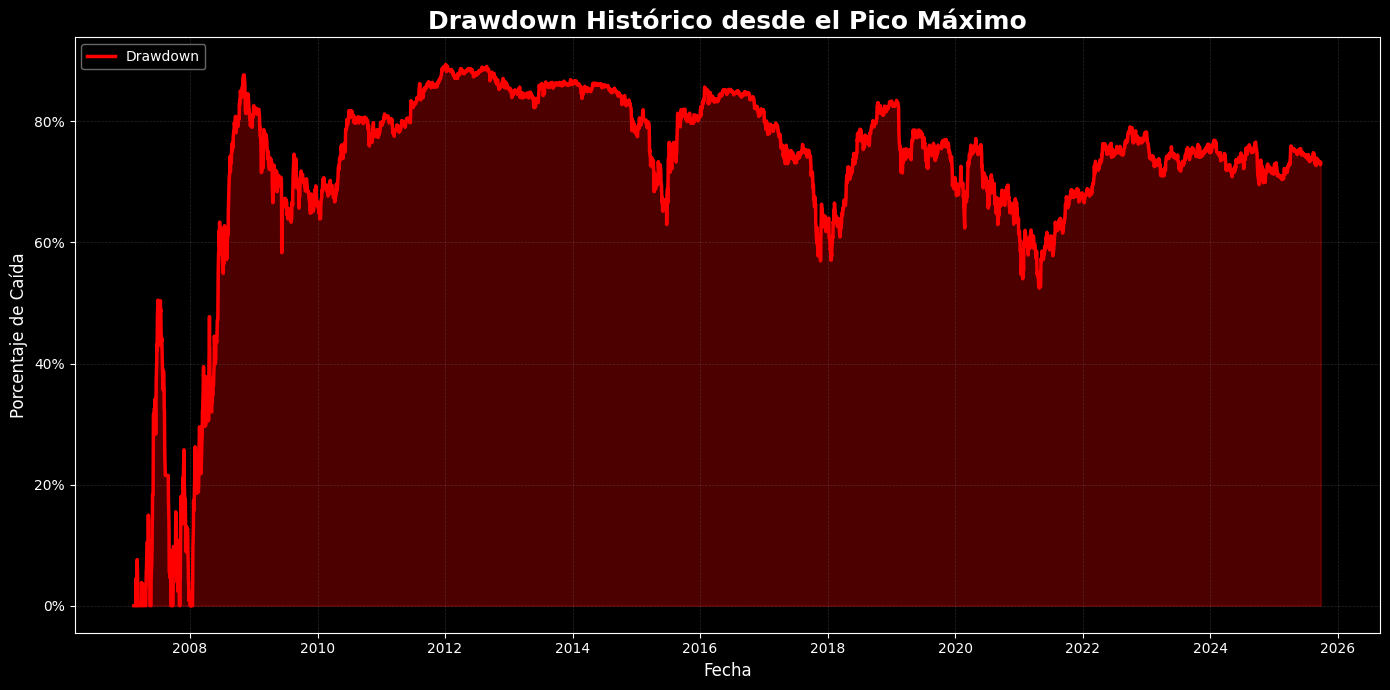

<Figure size 640x480 with 0 Axes>

In [ ]:


#Preparación de Datos
#Calculamos el máximo acumulado
df_full['cumulative_max'] = df_full['close'].cummax()

#Calculamos el drawdown como el porcentaje de caída desde el máximo
df_full['drawdown'] = ((df_full['cumulative_max'] - df_full['close']) / df_full['cumulative_max'])

#Creación del Gráfico
plt.style.use('dark_background') # Fondo oscuro
plt.figure(figsize=(14, 7))

#Graficamos el drawdown
plt.plot(df_full.index, df_full['drawdown'], color='red', label='Drawdown', linewidth=2.5) # Color rojo fuerte para resaltar la pérdida
plt.fill_between(df_full.index, df_full['drawdown'], color='red', alpha=0.3) # Área sombreada

#Configuración del gráfico
plt.title('Drawdown Histórico desde el Pico Máximo', fontsize=18, fontweight='bold', color='white')
plt.xlabel('Fecha', fontsize=12, color='white')
plt.ylabel('Porcentaje de Caída', fontsize=12, color='white')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0)) #Cambiamos el eje Y como porcentaje
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3, color='gray') #Estilo de Grill
plt.legend(facecolor='black', edgecolor='gray', fontsize=10, loc='upper left') #Leyenda con fondo oscuro
plt.xticks(color='white')
plt.yticks(color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

#Guardamos y descargamos
nombre_grafico = 'g13.png'
plt.savefig(nombre_grafico, facecolor=fig.get_facecolor(), bbox_inches='tight', dpi=300)

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4796 entries, 2007-02-14 to 2025-09-25
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open            4796 non-null   float64
 1   high            4796 non-null   float64
 2   low             4796 non-null   float64
 3   close           4796 non-null   float64
 4   volume          4796 non-null   int64  
 5   avg_price       4796 non-null   float64
 6   SMA20           4778 non-null   float64
 7   daily_return    4796 non-null   float64
 8   volatility      4796 non-null   float64
 9   rsi             4795 non-null   float64
 10  cumulative_max  4796 non-null   float64
 11  drawdown        4796 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 487.1 KB


In [ ]:
df_full.to_excel(writer, sheet_name='Scraping_con_API', index=False)


correlation_matrix.to_excel(
    writer,
    sheet_name='Scraping_con_API',
    index=True,
    startrow=2,  # Fila 3
    startcol=13  # Columna N
)

worksheet = writer.sheets['Scraping_con_API']

worksheet.write(0, 13, "Matriz de correlación")

worksheet.insert_image(1,17,'g9.png')

worksheet.insert_image(40,17,'g10.png')

worksheet.insert_image(70,17,'g11.png')

worksheet.insert_image(110,17,'g12.png')

worksheet.insert_image(150,17,'g13.png')

writer.close()

files.download('Equipo4_Tarea1.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>